## 📊 Downloading Data

The following uses kaggle command line tool to download the data. If you have already downloaded the data, you can skip this step.

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -p data

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


The following cell unzips the downloaded files. If you have already unzipped the files, you can skip this step.

In [2]:
import zipfile
import os
with zipfile.ZipFile(os.path.join('data','house-prices-advanced-regression-techniques.zip'), 'r') as zip_ref:
    zip_ref.extractall('data')

Import necessary libraries.

In [3]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations and array handling
import numpy as np
# Import matplotlib for plotting and visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization (built on top of matplotlib)
import seaborn as sns

# Set seaborn plot style to 'whitegrid' for better readability of plots
sns.set_style('whitegrid')
# Enable inline plotting in Jupyter Notebook so plots appear in the output cells
%matplotlib inline

# Import display from IPython to display DataFrames and other objects in a readable format
from IPython.display import display

# Import warnings module to control warning messages
import warnings
# Ignore all warnings to keep notebook output clean and focused
warnings.filterwarnings('ignore')

## 📊 Data loading
Load the dataset and display the first few rows to get an initial understanding of the data structure.

In [4]:
# Load training and test datasets from CSV files
train_data = pd.read_csv(os.path.join('data', 'train.csv'))
test_data = pd.read_csv(os.path.join('data', 'test.csv'))

# Print the shape (number of rows and columns) of the training data
print(train_data.shape)
# Display the first row of the training data for a quick preview
display(train_data.head(5))
# Uncomment the next line to display detailed info about training data columns and types
# display(train_data.info())

# Print the shape of the test data
print(test_data.shape)
# Display the first row of the test data for a quick preview
display(test_data.head(5))
# Uncomment the next line to display detailed info about test data columns and types
# display(test_data.info())

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Combination for Preprocessing

- 🔄 **Why Combine Datasets?**  
    Combining training and test datasets before preprocessing ensures that all transformations—such as missing value imputation, encoding, and feature engineering—are applied consistently. This unified approach prevents discrepancies and data leakage, maintaining data integrity.


In [5]:
# Combine train and test datasets for feature engineering and preprocessing.
# - The first line concatenates the training data (up to and including 'SalePrice') and the test data.
# - This is useful for applying transformations (like encoding or imputing missing values) consistently across both datasets.
combined_data = pd.concat([train_data.loc[:, : 'SalePrice'], test_data])

# Align columns to match the test_data structure.
# - This ensures that combined_data has the same columns as test_data, which is important for making predictions later.
combined_data = combined_data[test_data.columns]

# Display the first row of the combined dataset for a quick preview.
display(combined_data.head(3))

# Print the shape (number of rows and columns) of the combined dataset.
print(combined_data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


(2919, 80)


## Handle Missing Value

By addressing missing values systematically, we build a solid foundation for accurate and reliable predictive modeling.

In [6]:
# Explanation:
# - has_null_columns: List of columns in combined_data that have missing values.
# - train_null, test_null, combined_null: Series showing the count of missing values for each column in train, test, and combined datasets.
# - missed_data: DataFrame that organizes the missing value counts for easy comparison.
# - This helps to quickly identify which columns have missing data and how much is missing in each dataset.

# Get columns with missing data in the combined dataset
has_null_columns = combined_data.columns[combined_data.isnull().any()].tolist()


combined_null = combined_data[has_null_columns].isnull().sum()

combined_null

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [7]:
## handle those features that are categorical in nature but are labeled by numbers
combined_data = combined_data.replace(
    {"MSSubClass" : {
                        20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                        50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                        80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                        150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}}
)

In [8]:
print(f"{len(combined_null[combined_null>0])} features to be handled")

34 features to be handled


In [9]:
for feature, missing_count in combined_null[combined_null > 0].items():
    print(f"Feature: {feature} Missing: {missing_count}")
    col_data = combined_data[feature]
    if pd.api.types.is_numeric_dtype(col_data):
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        cv = std / mean if mean != 0 else float('nan')
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  CV: {cv}")
    else:
        categories = col_data.dropna().unique()
        print(f"  Categories: {categories}")
    print()

Feature: MSZoning Missing: 4
  Categories: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Feature: LotFrontage Missing: 486
  Mean: 69.30579531442663
  Median: 68.0
  CV: 0.3368391431195068

Feature: Alley Missing: 2721
  Categories: ['Grvl' 'Pave']

Feature: Utilities Missing: 2
  Categories: ['AllPub' 'NoSeWa']

Feature: Exterior1st Missing: 1
  Categories: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Feature: Exterior2nd Missing: 1
  Categories: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

Feature: MasVnrType Missing: 1766
  Categories: ['BrkFace' 'Stone' 'BrkCmn']

Feature: MasVnrArea Missing: 23
  Mean: 102.20131215469613
  Median: 0.0
  CV: 1.7547157590923699

Feature: BsmtQual Missing: 81
  Categories: ['Gd' 'TA' 'Ex' 'Fa']

Feature: BsmtCond Missing: 82
  Categories: ['TA' 'G

decleare a function to fill the missing values in the dataset and apply appropriate imputation strategies based on the nature of each feature.

In [10]:
# Find numeric features with missing value count less than 100
numeric_cols = combined_data.select_dtypes(include=[np.number]).columns
subset_cols = []
for col in numeric_cols:
    missing_count = combined_data[col].isnull().sum()
    if 0 < missing_count < 100 and col not in subset_cols:
        subset_cols.append(col)
    if missing_count > 0: ## show all (even above 100)
        print(f"{col}: {missing_count}")
print(f"cols we use to drop na rows: {subset_cols}")

LotFrontage: 486
MasVnrArea: 23
BsmtFinSF1: 1
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
GarageYrBlt: 159
GarageCars: 1
GarageArea: 1
cols we use to drop na rows: ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']


In [11]:
## handle LotFrontage
"""
Since there are too many missing values in LotFrontage, we use KNN to impute

We use these columns for KNN since they are related to LotFrontage: 
[LotArea, LotShape, LotConfig]
"""

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Select relevant columns for KNN imputation
knn_features = ['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']

# Prepare a copy for imputation
knn_data = combined_data[knn_features].copy()

# Encode categorical features
for col in ['LotShape', 'LotConfig']:
    le = LabelEncoder()
    knn_data[col] = le.fit_transform(knn_data[col].astype(str))

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(knn_data)

# Impute only missing values in combined_data['LotFrontage']
lotfrontage_missing = combined_data['LotFrontage'].isnull()
combined_data.loc[lotfrontage_missing, 'LotFrontage'] = knn_imputed[lotfrontage_missing, 0] ## 0 for LotFrontage


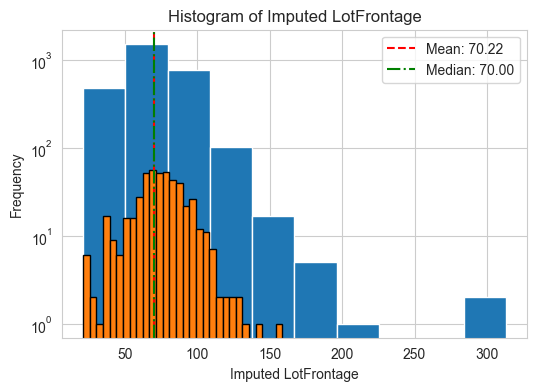

In [12]:
# Plot histogram of imputed LotFrontage values
plt.figure(figsize=(6, 4))
plt.hist(combined_data['LotFrontage'])
plt.hist(knn_imputed[lotfrontage_missing, 0], bins=30, edgecolor='black')
mean_lotfrontage = combined_data['LotFrontage'].mean()
median_lotfrontage = combined_data['LotFrontage'].median()
plt.axvline(mean_lotfrontage, color='red', linestyle='--', label=f'Mean: {mean_lotfrontage:.2f}')
plt.axvline(median_lotfrontage, color='green', linestyle='-.', label=f'Median: {median_lotfrontage:.2f}')
plt.yscale("log")
plt.legend()
plt.xlabel('Imputed LotFrontage')
plt.ylabel('Frequency')
plt.title('Histogram of Imputed LotFrontage')
plt.show()


In [13]:
## handle GarageYrBlt
"""
Since there are too many missing values in GarageYrBlt, we use KNN to impute

We use these columns for KNN since they are related to GarageYrBlt: 
["GarageType", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

These features describe characteristics that usually co-vary with when the garage was built 
(e.g., newer homes have attached garages with higher finish/quality).
"""

# Select relevant columns for KNN imputation
knn_features = ["GarageYrBlt", "GarageType", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

# Prepare a copy for imputation
knn_data = combined_data[knn_features].copy()

# Encode categorical features
for col in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    le = LabelEncoder()
    knn_data[col] = le.fit_transform(knn_data[col].astype(str))

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(knn_data)

# Impute only missing values in combined_data['GarageYrBlt']
GarageYrBlt_missing = combined_data['GarageYrBlt'].isnull()
combined_data.loc[GarageYrBlt_missing, 'GarageYrBlt'] = knn_imputed[GarageYrBlt_missing, 0]


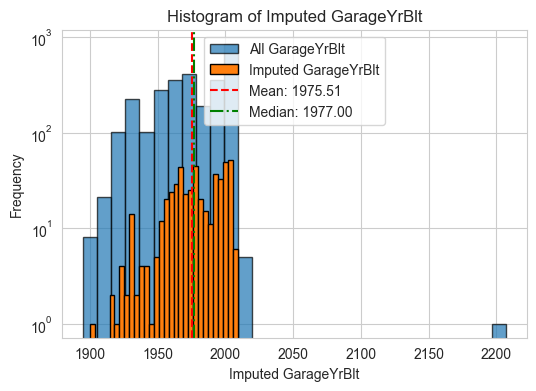

In [14]:
# Plot histogram of imputed GarageYrBlt values
plt.figure(figsize=(6, 4))
plt.hist(combined_data['GarageYrBlt'], bins=30, edgecolor='black', alpha=0.7, label='All GarageYrBlt')
plt.hist(knn_imputed[lotfrontage_missing, 0], bins=30, edgecolor='black', label='Imputed GarageYrBlt')
mean_garageyrblt = combined_data['GarageYrBlt'].mean()
median_garageyrblt = combined_data['GarageYrBlt'].median()
plt.axvline(mean_garageyrblt, color='red', linestyle='--', label=f'Mean: {mean_garageyrblt:.2f}')
plt.axvline(median_garageyrblt, color='green', linestyle='-.', label=f'Median: {median_garageyrblt:.2f}')
plt.yscale("log")
plt.legend(loc='upper center')
plt.xlabel('Imputed GarageYrBlt')
plt.ylabel('Frequency')
plt.title('Histogram of Imputed GarageYrBlt')
plt.show()


In [15]:
"""
Handle the rest of missing values. These are 
MasVnrArea: 23
BsmtFinSF1: 1
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
GarageCars: 1
GarageArea: 1
"""

# Remove 'GarageYrBlt' and 'logtfrontage' from subset_cols since they no longer have missing values
subset_cols = [col for col in subset_cols if col not in ['GarageYrBlt', 'logtfrontage']]

## method 1

# Since number of missing values is few comparing to ~3000 rows in the combined data, we simply drop them
# Drop rows with missing values in these columns
combined_data.dropna(subset=subset_cols, inplace=True)



# ## method 2
# # for features in subset_cols, if cv is low, replace missing values with mean otherwise replace missing values with median
# for col in subset_cols:
#     col_data = combined_data[col]
#     mean = col_data.mean()
#     median = col_data.median()
#     std = col_data.std()
#     cv = std / mean if mean != 0 else float('nan')
#     if cv < 0.5:
#         combined_data[col].fillna(mean, inplace=True)
#         print(f"{col}: mean={mean:.2f}, median={median:.2f}, cv={cv:.2f} -> replaced with mean")
#     else:
#         combined_data[col].fillna(median, inplace=True)
#         print(f"{col}: mean={mean:.2f}, median={median:.2f}, cv={cv:.2f} -> replaced with median")


# ## method 3 
# (best when computational power allows)
# use KNN again

### Encode categorical variables

Handling missing values in categorical variables depend on their nature. 
Are they ordered? 
What missing value actually means? 

In [16]:
## Define categorical columns 
categorical_cols = [col for col in combined_data.columns if col not in numeric_cols]
print(f"# of categorical: {len(categorical_cols)}")
print(categorical_cols)

# of categorical: 44
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [17]:
## read the description of data
with open('data/data_description.txt', 'r') as f:
    data_description_txt = f.read()


In [18]:
## make a dictionary with keys being categorical columns and values being their descriptions

feature_descriptions = {}
lines = data_description_txt.split('\n')
current_feature = None
current_description = []

for line in lines:
    line = line.strip()
    if not line:
        continue
    # Check if line starts with a feature name followed by ':'
    if ':' in line:
        feature_name = line.split(':')[0].strip()
        if feature_name in categorical_cols:
            # Save previous feature description
            if current_feature and current_description:
                feature_descriptions[current_feature] = '\n'.join(current_description)
            # Start new feature
            current_feature = feature_name
            current_description = [line]
        # elif current_feature:
        #     current_description.append(line)
    # elif current_feature:
    else:
        current_description.append(line)

# Save last feature description
if current_feature and current_description:
    feature_descriptions[current_feature] = '\n'.join(current_description)

In [19]:
# !pip install langchain-openai langchain-ollama python-dotenv

from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv(".env")
warnings.filterwarnings("ignore")

llm = ChatOpenAI(
    temperature=1, model="gpt-4o-mini", 
    api_key=os.getenv("openai_api_key")
)

In [20]:
## for a given categorical feature and its description, determine if it is ordered or unordered by nature
schema = {
    "title": "Categorical_Feature_Ordering",
    "description": "Determine if the given categorical feature is ordered or unordered based on its description.",
    "type": "object",
    "properties": {
        "is_ordered": {"type": "boolean", "description": "True if the feature is ordered (ordinal), False if unordered (nominal)."},
    },
    "required": ["is_ordered"]
}

## Structured output
structure_llm = llm.with_structured_output(schema)


## make a dictionary that gives the categorical type for each feature
import json
categorical_type_file = 'extra_data/categorical_type.json'
if os.path.exists(categorical_type_file):
    print('reading from stored file')
    with open(categorical_type_file, 'r') as f:
        categorical_type = json.load(f)
else: 
    categorical_type = {}
    for feature in categorical_cols:
        result = structure_llm.invoke(f"feature:\n{feature}\n\ndescription:\n{feature_descriptions[feature]}")

        categorical_type[feature] = result['is_ordered']
    with open(categorical_type_file, 'w') as f:
        json.dump(categorical_type, f, indent=2)

reading from stored file


### Category to numeric methods that we can use

| Method                          | Description                                                         | Best use case                                                      |
| ------------------------------- | ------------------------------------------------------------------- | ------------------------------------------------------------------ |
| Label encoding                  | Map each category to an arbitrary integer ID.                       | Tree-based models; low/medium cardinality without ordinal meaning. |
| Ordinal encoding                | Map categories to integers reflecting a true order.                 | When domain has a natural rank (e.g., XS < S < M < L < XL).        |
| One-hot encoding                | Create a binary column per category.                                | Linear models and neural nets with low cardinality.                |
| Dummy (drop-first) encoding     | One-hot but omit one level to avoid collinearity.                   | Linear/GLM models with an intercept.                               |
| Base-N/Binary encoding          | Represent category IDs in base-N digits across few columns.         | Medium/high cardinality when one-hot is too wide.                  |
| Hashing (feature hashing)       | Hash categories into a fixed number of columns; collisions allowed. | Very high cardinality or streaming with memory limits.             |
| Frequency/Count encoding        | Replace category with its frequency or count in data.               | High cardinality; simple and leakage-safe for tree models.         |
| Target (mean) encoding          | Replace category with mean of the target using CV/smoothing.        | High cardinality with strong signal; careful anti-leakage needed.  |
| Leave-one-out target encoding   | Target mean computed excluding the current row.                     | Small/medium datasets to reduce target leakage bias.               |
| M-estimate/James–Stein encoding | Target mean shrunk toward global mean with a prior.                 | Noisy or rare categories needing robust shrinkage.                 |
| CatBoost (ordered) encoding     | Target stats computed in an online, order-aware manner.             | Gradient boosting style pipelines; minimizes leakage.              |
| Weight of Evidence (WOE)        | Log odds of event vs. non-event per category.                       | Binary classification, especially credit risk scorecards.          |
| Probability ratio/log-odds      | Encode by `P(y=1\|cat)/P(y=0\|cat)` or its log.                     | Binary tasks to give linear models a monotonic signal.             |
| GLMM encoding                   | Use mixed-effects model random effects as numeric codes.            | Many categories with varying support; principled shrinkage.        |
| Contrast codings                | Encode with contrast matrices (Sum, Helmert, Treatment, etc.).      | Interpretable linear/ANOVA designs and hypothesis tests.           |
| Learned embeddings              | Train dense vectors via a neural embedding layer.                   | Neural nets with very high cardinality capturing similarity.       |
| Multi-hot encoding              | One-hot for set-valued features where rows have multiple tags.      | Multi-label attributes like genres or skills.                      |
| Rare-category grouping          | Collapse infrequent levels into an “Other” level before encoding.   | Any model facing long-tail categories for stability.               |
| Missing/unknown level           | Add explicit “Unknown/NA” category before encoding.                 | Any pipeline to handle unseen or missing categories at inference.  |


In [21]:
## for unordered features use one hot encoder, i.e. we will have one distribution of dataset for each category
ordinal_categories = []
for ifeature, feature in enumerate(categorical_cols):
    print("===="*15)
    print("feature: ", feature)
    print("----\ndescription:\n",feature_descriptions[feature],"\n----\n")
    print("is_ordered", categorical_type[feature])
    print("===="*15)

    if not categorical_type[feature]:
        # One-hot encode the MSSubClass feature and concatenate to combined_data
        ms_subclass_dummies = pd.get_dummies(combined_data[feature], prefix=feature)
        combined_data = pd.concat([combined_data.drop(columns=[feature]), ms_subclass_dummies], axis=1)
        print(f"Add this number of columns: {len(ms_subclass_dummies.columns) - 1 }")
    else:
        ordinal_categories.append(feature)


feature:  MSSubClass
----
description:
 MSSubClass: Identifies the type of dwelling involved in the sale.
20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES 
----

is_ordered False
Add this number of columns: 15
feature:  MSZoning
----
description:
 MSZoning: Identifies the general zoning classification of the sale.
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density 
----

is_ordered False
A

In [22]:
print(f"ordinal categorical variables to be addressed now:\n{ordinal_categories}")

ordinal categorical variables to be addressed now:
['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']


In [23]:
def fill_missing_combined_data(column, value):
    # Fill missing values in the specified column of combined_data with the provided value.
    # This function locates all rows in combined_data where the given column is null (missing),
    # and sets those entries to the specified value.
    # Useful for handling missing data during preprocessing and feature engineering.
    combined_data.loc[combined_data[column].isnull(),column] = value

In [24]:
# Ordinal/nominal maps derived from your descriptions
enc_maps = {

    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},

    # Higher is "better"/more regular
    'LotShape':    {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},

    # Flatter is "better"
    'LandContour': {'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3},

    # Gentler is "better"
    'LandSlope':   {'Sev': 0, 'Mod': 1, 'Gtl': 2},

    # Quality scales: Ex > Gd > TA > Fa > Po
    'ExterQual':   {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond':   {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC':   {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},

    # Basement qualities (+ NA=0 = no basement)
    'BsmtQual':    {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond':    {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},

    # Exposure: Gd > Av > Mn > No > NA
    'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},

    # Finished types: GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA
    'BsmtFinType1': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},

    # Functional: Typ best → Salvage worst
    'Functional':  {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},

    # Fireplace quality (+ NA=0 = no fireplace)
    'FireplaceQu': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},

    # Garage finish (+ NA=0 = no garage)
    'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},

    # Garage quality/condition (+ NA=0 = no garage)
    'GarageQual':  {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond':  {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},

    # Pool quality (+ NA=0 = no pool)
    'PoolQC':      {'NA': 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
}


## "NA" in features above is set to null. return them back to "NA"
columns_with_NA = [col for col in enc_maps if 'NA' in enc_maps[col]]
for feature in columns_with_NA:
    fill_missing_combined_data(feature, "NA")

In [25]:
# Apply replacements in one shot
combined_data = combined_data.replace(enc_maps)

In [26]:
for feature in combined_data.columns:
    missing_count = combined_data[feature].isnull().sum()
    if 0 < missing_count:
        if missing_count < 10:
            ## since a few missing points, we drop them
            combined_data.dropna(subset=[feature], inplace=True)
            print(f"{missing_count} missing values in {feature}: dropped the rows")
        else:
            print(f"{missing_count} missing values in {feature}: to be handled later")
    

1 missing values in KitchenQual: dropped the rows
2 missing values in Functional: dropped the rows


### Feature engineering

**Driving factors of sales price according to references below**

Note: these are also stored in **extra_data/driving_features.json**

| Feature name                 | Feature description                                                                         |
| ---------------------------- | ------------------------------------------------------------------------------------------- |
| Living area (sq ft)          | Above-grade finished square footage; typically the strongest driver of price.               |
| Lot size                     | Total land area; larger lots often command premiums, especially in low-density areas.       |
| Bedrooms                     | Count and size of bedrooms; optimal count depends on local buyer norms.                     |
| Bathrooms                    | Number of full/half baths; “total baths” and presence of ensuite primary bath matter.       |
| Age / Year built             | Newer homes usually price higher; vintage premiums possible if well-maintained.             |
| Renovation year              | Recent remodels (kitchen, baths, major systems) reduce buyer perceived future costs.        |
| Overall quality/condition    | Appraiser-style ratings of materials, workmanship, and upkeep.                              |
| Floor plan/layout            | Functional flow, open plan, dedicated office, primary suite configuration.                  |
| Finished basement area       | Additional livable space (where customary); egress and ceiling height influence value.      |
| Garage spaces                | Enclosed parking count and quality (attached > detached in many markets).                   |
| Parking type                 | Driveway, covered carport, on-street availability affects utility and appeal.               |
| Kitchen quality              | Cabinetry, counters, appliances; modern, neutral finishes boost perceived value.            |
| Bathroom quality             | Tile, fixtures, double vanities, walk-in shower/tub; primary bath upgrades are high impact. |
| Flooring                     | Durable, cohesive surfaces (hardwood/LVP/tile) vs. worn carpet.                             |
| Roof age/material            | Remaining life and material (e.g., architectural shingles, metal) factor into buyer risk.   |
| HVAC                         | Age/efficiency of heating/cooling; central A/C is a must-have in many regions.              |
| Windows/insulation           | Double-pane, low-E, good insulation reduce energy bills and noise.                          |
| Energy rating                | Certifications/scores (ENERGY STAR, HERS/Home Energy Score) tied to lower operating costs.  |
| Solar panels                 | Owned systems add value more reliably than leased PPAs.                                     |
| Smart home features          | Thermostats, security, lighting that improve convenience/efficiency.                        |
| Curb appeal                  | Exterior condition, landscaping, entryway; drives first impressions and foot traffic.       |
| Staging/presentation         | Decluttered, well-staged homes sell faster and can secure higher offers.                    |
| Outdoor spaces               | Usable yards, decks/patios, outdoor kitchens, shade structures.                             |
| Natural light/orientation    | Bright interiors, good aspect, window placement.                                            |
| Views/waterfront             | Sightlines to mountains, water, greenbelt; private outlook premiums.                        |
| Noise/exposure               | Proximity to busy roads, flight paths, industrial uses can discount price.                  |
| School quality               | Assigned school ratings and boundaries materially affect demand in family-oriented areas.   |
| Walkability/transit          | Walk Score, proximity to transit, shops, parks; convenience premiums.                       |
| Neighborhood amenities       | Community pools, trails, gyms, retail nodes nearby.                                         |
| Street setting               | Cul-de-sac vs. arterial, traffic volume, sidewalk presence.                                 |
| HOA fees/rules               | Monthly cost and restrictions (rent caps, exterior rules) influence buyer pool.             |
| Insurance costs/availability | Market reality in high-risk zones (wind/hail, wildfire, coastal).                           |
| Flood risk                   | FEMA zone, elevation, prior claims; impacts insurance and lender requirements.              |
| Wildfire risk                | Defensible space, materials, local hazard scores affect pricing in fire-prone regions.      |
| Wind/hurricane risk          | Building codes (roof tie-downs, impact windows) and claim history matter.                   |
| Property taxes               | Effective tax rate and recent reassessments influence affordability.                        |
| Zoning/expandability         | Ability to add ADU, finish attic, or expand footprint adds option value.                    |
| Internet/fiber               | High-speed connectivity increasingly a must-have for remote work.                           |
| Market comps & supply        | Recent comparable sales, days on market, and inventory set pricing context.                 |




References: 
* [0] https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset
* [1] [https://www.zillow.com/research/home-features-that-sell-34972/](https://www.zillow.com/research/home-features-that-sell-34972/)
* [2] [https://www.redfin.com/news/how-much-does-walkability-increase-home-values/](https://www.redfin.com/news/how-much-does-walkability-increase-home-values/)
* [3] [https://www.redfin.com/news/how-much-is-a-point-of-walk-score-worth/](https://www.redfin.com/news/how-much-is-a-point-of-walk-score-worth/)
* [4] [https://www.homelight.com/blog/what-upgrades-increase-home-value/](https://www.homelight.com/blog/what-upgrades-increase-home-value/)
* [5] [https://www.remodeling.hw.net/cost-vs-value/2024/](https://www.remodeling.hw.net/cost-vs-value/2024/)
* [6] [https://www.remodeling.hw.net/cost-vs-value/2024/key-trends-in-the-2024-cost-vs-value-report](https://www.remodeling.hw.net/cost-vs-value/2024/key-trends-in-the-2024-cost-vs-value-report)
* [7] [https://www.fhfa.gov/document/wp1803.pdf](https://www.fhfa.gov/document/wp1803.pdf)
* [8] [https://www.fhfa.gov/document/wp1703.pdf](https://www.fhfa.gov/document/wp1703.pdf)
* [9] [https://www.energystar.gov/newhomes/features-benefits/better-resale-value](https://www.energystar.gov/newhomes/features-benefits/better-resale-value)
* [10] [https://www.energy.gov/sites/default/files/2024-11/bto-peer-2024-15130-Home-Energy-Score-Modeling-Merket.pdf](https://www.energy.gov/sites/default/files/2024-11/bto-peer-2024-15130-Home-Energy-Score-Modeling-Merket.pdf)
* [11] [https://emp.lbl.gov/publications/how-does-home-energy-score-affect](https://emp.lbl.gov/publications/how-does-home-energy-score-affect)
* [12] [https://sf.freddiemac.com/docs/pdf/fact-sheet/energy_efficiency_white_paper.pdf](https://sf.freddiemac.com/docs/pdf/fact-sheet/energy_efficiency_white_paper.pdf)
* [13] [https://www.nar.realtor/research-and-statistics/research-reports/profile-of-home-staging](https://www.nar.realtor/research-and-statistics/research-reports/profile-of-home-staging)
* [14] [https://www.nar.realtor/newsroom/nar-report-reveals-home-staging-boosts-sale-prices-and-reduces-time-on-market](https://www.nar.realtor/newsroom/nar-report-reveals-home-staging-boosts-sale-prices-and-reduces-time-on-market)
* [15] [https://assets.firststreet.org/media/Article_NCC-Flood-Risk-2-16-23.pdf](https://assets.firststreet.org/media/Article_NCC-Flood-Risk-2-16-23.pdf)
* [16] [https://firststreet.org/press/us-housing-market-overvalued-by-200-billion-due-to-unpriced-climate-risks](https://firststreet.org/press/us-housing-market-overvalued-by-200-billion-due-to-unpriced-climate-risks)
* [17] [https://www.resources.org/common-resources/disclosing-wildfire-risks-in-home-sales/](https://www.resources.org/common-resources/disclosing-wildfire-risks-in-home-sales/)
* [18] [https://investors.zillowgroup.com/investors/news-and-events/news/news-details/2024/Zillow-introduces-First-Streets-comprehensive-climate-risk-data-on-for-sale-listings-across-the-US/default.aspx](https://investors.zillowgroup.com/investors/news-and-events/news/news-details/2024/Zillow-introduces-First-Streets-comprehensive-climate-risk-data-on-for-sale-listings-across-the-US/default.aspx)
* [19] [https://www.nber.org/system/files/working_papers/w22668/w22668.pdf](https://www.nber.org/system/files/working_papers/w22668/w22668.pdf)
* [20] [https://www.mdpi.com/2073-445X/11/11/1894](https://www.mdpi.com/2073-445X/11/11/1894)
* [21] [https://cep.lse.ac.uk/pubs/download/occasional/op029.pdf](https://cep.lse.ac.uk/pubs/download/occasional/op029.pdf)
* [22] [https://www.public.asu.edu/~nkuminof/best_practice_hedonic_REEP.pdf](https://www.public.asu.edu/~nkuminof/best_practice_hedonic_REEP.pdf)
* [23] [https://link.springer.com/article/10.1007/s11146-006-9983-5](https://link.springer.com/article/10.1007/s11146-006-9983-5)
* [24] [https://www.strongtowns.org/journal/2020/1/22/walkable-places-are-growing-in-value](https://www.strongtowns.org/journal/2020/1/22/walkable-places-are-growing-in-value)
* [25] [https://www.realtor.com/research/climaterisk-2022/](https://www.realtor.com/research/climaterisk-2022/)


In [27]:
with open('extra_data/driving_features.json', 'r') as f:
    driving_features = json.load(f)

print(driving_features)

{'Living area (sq ft)': 'Above-grade finished square footage; typically the strongest driver of price.', 'Lot size': 'Total land area; larger lots often command premiums, especially in low-density areas.', 'Bedrooms': 'Count and size of bedrooms; optimal count depends on local buyer norms.', 'Bathrooms': 'Number of full/half baths; “total baths” and presence of ensuite primary bath matter.', 'Age / Year built': 'Newer homes usually price higher; vintage premiums possible if well-maintained.', 'Renovation year': 'Recent remodels (kitchen, baths, major systems) reduce buyer perceived future costs.', 'Overall quality/condition': 'Appraiser-style ratings of materials, workmanship, and upkeep.', 'Floor plan/layout': 'Functional flow, open plan, dedicated office, primary suite configuration.', 'Finished basement area': 'Additional livable space (where customary); egress and ceiling height influence value.', 'Garage spaces': 'Enclosed parking count and quality (attached > detached in many mar

In [28]:
## Features that engineered in [0]
combined_data["OverallGrade"] = combined_data["OverallQual"] * combined_data["OverallCond"]
combined_data["GarageGrade"] = combined_data["GarageQual"] * combined_data["GarageCond"]
combined_data["ExterGrade"] = combined_data["ExterQual"] * combined_data["ExterCond"]
combined_data["KitchenScore"] = combined_data["KitchenAbvGr"] * combined_data["KitchenQual"]
combined_data["FireplaceScore"] = combined_data["Fireplaces"] * combined_data["FireplaceQu"]
combined_data["GarageScore"] = combined_data["GarageArea"] * combined_data["GarageQual"]
combined_data["PoolScore"] = combined_data["PoolArea"] * combined_data["PoolQC"]
combined_data["TotalBath"] = combined_data["BsmtFullBath"] + (0.5 * combined_data["BsmtHalfBath"]) + combined_data["FullBath"] + (0.5 * combined_data["HalfBath"])
combined_data["AllSF"] = combined_data["GrLivArea"] + combined_data["TotalBsmtSF"]
combined_data["AllFlrsSF"] = combined_data["1stFlrSF"] + combined_data["2ndFlrSF"]
combined_data["AllPorchSF"] = combined_data["OpenPorchSF"] + combined_data["EnclosedPorch"] + combined_data["3SsnPorch"] + combined_data["ScreenPorch"]


In [29]:
"""
data_description_txt provides information about some of the existing variables in combined_data.columns
ues data_description_txt and also column names (which are representative) to check if they match a given description of a variable
"""

schema = {
    "title": "Feature_Mapping",
    "description": "Find the most equivalent feature in the dataset that matches the given driving feature description",
    "type": "object",
    "properties": {
        "equivalent_feature": {"type": "string", "description": f"The name of the feature in {combined_data.columns} that best matches the driving feature description, or 'None' if no good match exists"},
    },
    "required": ["equivalent_feature"]
}

## Structured output
structure_llm = llm.with_structured_output(schema)

import pickle

pickle_file = 'extra_data/to_be_added.pkl'
if os.path.exists(pickle_file):
    with open(pickle_file, 'rb') as f:
        cols_to_be_added = pickle.load(f)
        print("importing from file")
else:
    cols_to_be_added = []
    for key, val in driving_features.items():
        print(key)
        result = structure_llm.invoke(f"Potential feature:{key}\nDescription:{val}")
        print(result)
        if result["equivalent_feature"].lower() == "none":
            cols_to_be_added.append(key)
        print("-"*30)

    with open(pickle_file, 'wb') as f:
        pickle.dump(cols_to_be_added, f)



importing from file


In [30]:
import pyperclip

ifeature = 26

print(cols_to_be_added[ifeature])

## create a prompt to be passed to ChatGPT
prompt = f"""Existing features and their descriptions:
<div>
{data_description_txt}
</div>

Feature to be created:
<div>
{driving_features[cols_to_be_added[ifeature]]}
</div>

combine the features whose names and descriptions are given in "Existing features and their descriptions" to create a new feature as described in "Feature to be created". 

Assume all missing values in combined_data are handled. 
Assume all categorical data are properly converted to numbers (using one-hot-encoding for unordered otherwise replaced by proper numbers)
Your output must be a minimal python code. 
"""

## copy the prompt to clipboard
pyperclip.copy(prompt)

Market comps & supply


In [31]:
# Create a feature representing the local bedroom count and size adjustment:
# It multiplies above-ground living area by the number of bedrooms, then divides by total rooms (clipped to at least 1 to avoid division by zero).
combined_data["BedCntSize_Local"] = (
    combined_data["GrLivArea"] * combined_data["BedroomAbvGr"] / combined_data["TotRmsAbvGrd"].clip(lower=1)
)


In [32]:
# Create a feature representing finished basement livable area adjustment:
# It combines finished basement area (Type 1 only since Type 2 was dropped) with basement exposure and quality
combined_data["BsmtLivableAdj"] = combined_data["BsmtFinSF1"] * combined_data["BsmtExposure"] * combined_data["BsmtQual"]

In [33]:
combined_data["ParkingUtilityAppeal"] = (0.3*combined_data.get("PavedDrive_Y",0)+0.15*combined_data.get("PavedDrive_P",0)-0.1*combined_data.get("PavedDrive_N",0)+0.4*combined_data.get("GarageType_CarPort",0)+0.25*combined_data["GarageCars"].clip(0,3)/3+0.2*(combined_data["LotFrontage"]/combined_data["LotFrontage"].median())+0.15*(combined_data.get("LotConfig_Corner",0)+1.2*combined_data.get("LotConfig_FR2",0)+1.4*combined_data.get("LotConfig_FR3",0)+0.5*combined_data.get("LotConfig_CulDSac",0)))

In [34]:
combined_data["FloorSurfaceQuality"] = combined_data["OverallQual"] + combined_data["KitchenQual"] - (combined_data["LowQualFinSF"]/combined_data["GrLivArea"].clip(lower=1)) - 0.02*(combined_data["YrSold"]-combined_data["YearRemodAdd"])

In [35]:
den = (combined_data.get("RoofMatl_ClyTile",0)+combined_data.get("RoofMatl_Metal",0)+combined_data.get("RoofMatl_WdShake",0)+combined_data.get("RoofMatl_WdShngl",0)+combined_data.get("RoofMatl_Membran",0)+combined_data.get("RoofMatl_CompShg",0)+combined_data.get("RoofMatl_Tar&Grv",0)+combined_data.get("RoofMatl_Roll",0))
exp_life = (50*combined_data.get("RoofMatl_ClyTile",0)+40*combined_data.get("RoofMatl_Metal",0)+30*combined_data.get("RoofMatl_WdShake",0)+25*combined_data.get("RoofMatl_WdShngl",0)+25*combined_data.get("RoofMatl_Membran",0)+20*combined_data.get("RoofMatl_CompShg",0)+18*combined_data.get("RoofMatl_Tar&Grv",0)+12*combined_data.get("RoofMatl_Roll",0)+25*(den==0)) / den.clip(lower=1)
roof_age = (combined_data["YrSold"] - combined_data[["YearRemodAdd","YearBuilt"]].max(axis=1)).clip(lower=0)
combined_data["RoofBuyerRisk"] = 1 - ((exp_life - roof_age).clip(lower=0) / exp_life.clip(lower=1))

In [36]:
age = (combined_data["YrSold"] - combined_data[["YearRemodAdd","YearBuilt"]].max(axis=1)).clip(lower=0)
type_w = (1.0*combined_data.get("Heating_GasA",0)+0.9*combined_data.get("Heating_GasW",0)+0.85*combined_data.get("Heating_OthW",0)+0.8*combined_data.get("Heating_Floor",0)+0.7*combined_data.get("Heating_Wall",0)+0.6*combined_data.get("Heating_Grav",0)) + 0.85*((combined_data.get("Heating_GasA",0)+combined_data.get("Heating_GasW",0)+combined_data.get("Heating_OthW",0)+combined_data.get("Heating_Floor",0)+combined_data.get("Heating_Wall",0)+combined_data.get("Heating_Grav",0))==0)
qc_w = (1.2*combined_data.get("HeatingQC_Ex",0)+1.1*combined_data.get("HeatingQC_Gd",0)+1.0*combined_data.get("HeatingQC_TA",0)+0.9*combined_data.get("HeatingQC_Fa",0)+0.8*combined_data.get("HeatingQC_Po",0)) + 1.0*((combined_data.get("HeatingQC_Ex",0)+combined_data.get("HeatingQC_Gd",0)+combined_data.get("HeatingQC_TA",0)+combined_data.get("HeatingQC_Fa",0)+combined_data.get("HeatingQC_Po",0))==0)
combined_data["HVAC_AgeEff"] = type_w * qc_w * (1 + 0.2*combined_data.get("CentralAir_Y", combined_data.get("CentralAir",0)).clip(0,1)) / (1 + age/20.0)

In [37]:
age = (combined_data["YrSold"] - combined_data[["YearRemodAdd","YearBuilt"]].max(axis=1)).clip(lower=0)
ca = combined_data.get("CentralAir_Y", combined_data.get("CentralAir", 0)).clip(0,1)
combined_data["EnvelopeEfficiency"] = ((combined_data["ExterQual"] + combined_data["ExterCond"] + combined_data["HeatingQC"]) / 3) * (1 + 0.2*ca) / (1 + age/20.0)

In [38]:
age = (combined_data["YrSold"] - combined_data[["YearRemodAdd","YearBuilt"]].max(axis=1)).clip(lower=0)
ca = combined_data.get("CentralAir_Y", combined_data.get("CentralAir",0)).clip(0,1)
em = combined_data.get("Electrical_SBrkr",0).clip(0,1)
combined_data["EnergyCertProxy"] = ((combined_data["HeatingQC"] + (combined_data["ExterQual"]+combined_data["ExterCond"])/2 + 0.5*combined_data["OverallQual"]) * (1 + 0.2*ca + 0.05*em)) / (1 + age/20.0)

In [39]:
owned = combined_data.get("SaleType_WD",0)+combined_data.get("SaleType_CWD",0)+combined_data.get("SaleType_VWD",0)+combined_data.get("SaleType_New",0)
leased = combined_data.get("SaleType_Con",0)+combined_data.get("SaleType_ConLw",0)+combined_data.get("SaleType_ConLI",0)+combined_data.get("SaleType_ConLD",0)
impr = (combined_data.get("CentralAir_Y", combined_data.get("CentralAir",0)).clip(0,1)+combined_data.get("Electrical_SBrkr",0).clip(0,1))/2
agefac = 1/(1 + (combined_data["YrSold"]-combined_data["YearRemodAdd"]).clip(lower=0)/10.0)
combined_data["OwnedVsLeasedSystems"] = (owned - 0.8*leased) * (1 + 0.3*impr) * agefac

In [40]:
z = pd.Series(0, index=combined_data.index)
age = (combined_data["YrSold"] - combined_data[["YearRemodAdd","YearBuilt"]].max(axis=1)).clip(lower=0)
elec = combined_data.get("Electrical_SBrkr", z)
ca = combined_data.get("CentralAir_Y", combined_data.get("CentralAir", z))
gfin = combined_data.get("GarageFinish_Fin", z)
grfn = combined_data.get("GarageFinish_RFn", z)
hw = 0.5*elec.clip(0,1) + 0.4*ca.clip(0,1) + 0.1*(gfin + 0.5*grfn).clip(0,1)
combined_data["SmartConvenienceEff"] = hw * (0.5 + 0.5*((combined_data["HeatingQC"]+combined_data["OverallQual"]+combined_data["Functional"])/3.0)) / (1 + age/15.0)


In [41]:
z = pd.Series(0, index=combined_data.index)
avg_room = combined_data["GrLivArea"]/combined_data["TotRmsAbvGrd"].clip(lower=1)
storage = combined_data["GarageCars"].clip(lower=0)/2 + (combined_data["BsmtUnfSF"]/combined_data["TotalBsmtSF"].replace(0,1)).clip(0,1)
curb = (combined_data["OpenPorchSF"]+combined_data["WoodDeckSF"]) / combined_data["GrLivArea"].clip(lower=1)
combined_data["StagingDeclutterScore"] = (0.35*((combined_data["OverallQual"]+combined_data["OverallCond"]+combined_data["KitchenQual"])/3) + 0.15*((combined_data["ExterQual"]+combined_data["ExterCond"])/2) + 0.15*(avg_room/avg_room.median()) + 0.1*storage + 0.1*curb + 0.1*(combined_data.get("PavedDrive_Y",z)-0.5*combined_data.get("PavedDrive_N",z)) + 0.05*combined_data.get("SaleCondition_Normal",z)) - 0.2*(combined_data["LowQualFinSF"]/combined_data["GrLivArea"].clip(lower=1))

In [42]:
z = pd.Series(0, index=combined_data.index)
amen = (combined_data["WoodDeckSF"]+combined_data["OpenPorchSF"]+0.6*combined_data["EnclosedPorch"]+0.8*combined_data["ScreenPorch"]+0.9*combined_data["3SsnPorch"]+0.2*combined_data["PoolArea"]) / combined_data["GrLivArea"].clip(lower=1)
terrain = (combined_data.get("LandSlope_Gtl",z)+0.5*combined_data.get("LandSlope_Mod",z)+combined_data.get("LandContour_Lvl",z)+combined_data.get("LotShape_Reg",z)+0.5*combined_data.get("LotShape_IR1",z))/3.0
privacy = (0.6*combined_data.get("Fence_GdPrv",z)+0.4*combined_data.get("Fence_MnPrv",z)+0.3*combined_data.get("Fence_GdWo",z)+0.1*combined_data.get("Fence_MnWw",z))
context = (0.5*(combined_data.get("Condition1_PosA",z)+combined_data.get("Condition1_PosN",z)+combined_data.get("Condition2_PosA",z)+combined_data.get("Condition2_PosN",z)) - 0.3*(combined_data.get("Condition1_Artery",z)+combined_data.get("Condition1_Feedr",z)+combined_data.get("Condition1_RRAn",z)+combined_data.get("Condition1_RRAe",z)+combined_data.get("Condition1_RRNn",z)+combined_data.get("Condition1_RRNe",z)+combined_data.get("Condition2_Artery",z)+combined_data.get("Condition2_Feedr",z)+combined_data.get("Condition2_RRAn",z)+combined_data.get("Condition2_RRAe",z)+combined_data.get("Condition2_RRNn",z)+combined_data.get("Condition2_RRNe",z)))
combined_data["OutdoorUsableAmenityScore"] = (0.45*amen + 0.25*terrain + 0.15*privacy + 0.1*(combined_data["LotArea"]/combined_data["GrLivArea"].clip(lower=1)) + 0.05*context).clip(lower=0)

In [43]:
z = pd.Series(0, index=combined_data.index)
area = combined_data["GrLivArea"].clip(lower=1)
windowy = (0.5*combined_data["3SsnPorch"] + 0.4*combined_data["ScreenPorch"] + 0.2*combined_data["OpenPorchSF"]) / area
exposure = (1.0*combined_data.get("BsmtExposure_Gd",z) + 0.6*combined_data.get("BsmtExposure_Av",z) + 0.3*combined_data.get("BsmtExposure_Mn",z))
stories = (combined_data.get("HouseStyle_2Story",z) + combined_data.get("HouseStyle_2.5Fin",z) + 0.6*combined_data.get("HouseStyle_1.5Fin",z) + 0.5*combined_data.get("HouseStyle_SLvl",z) + 0.4*combined_data.get("HouseStyle_SFoyer",z))
corner = (0.6*combined_data.get("LotConfig_Corner",z) + 0.8*combined_data.get("LotConfig_FR2",z) + 1.0*combined_data.get("LotConfig_FR3",z))
aspect_env = (0.3*(combined_data.get("Condition1_PosA",z)+combined_data.get("Condition1_PosN",z)+combined_data.get("Condition2_PosA",z)+combined_data.get("Condition2_PosN",z)) - 0.2*(combined_data.get("Condition1_Artery",z)+combined_data.get("Condition1_Feedr",z)+combined_data.get("Condition2_Artery",z)+combined_data.get("Condition2_Feedr",z)))
topo = (0.3*combined_data.get("LandContour_Lvl",z) + 0.1*combined_data.get("LotShape_Reg",z) - 0.1*combined_data.get("LandContour_Low",z))
quality = ((combined_data["KitchenQual"] + combined_data["OverallQual"]) / 20.0).clip(upper=1)
age = (combined_data["YrSold"] - combined_data[["YearRemodAdd","YearBuilt"]].max(axis=1)).clip(lower=0)
age_factor = 1/(1 + age/25.0)
combined_data["InteriorDaylightScore"] = (0.35*windowy + 0.20*exposure + 0.15*stories + 0.10*corner + 0.10*aspect_env + 0.05*topo + 0.05*quality).clip(lower=0) * age_factor

In [44]:
size = (combined_data['GrLivArea']/combined_data['GrLivArea'].median()
       +0.5*combined_data['TotalBsmtSF']/combined_data['TotalBsmtSF'].median()
       +0.25*combined_data['GarageArea']/combined_data['GarageArea'].median())
monthly = (size
          +0.5*(combined_data.get('Utilities_ELO',0)+combined_data.get('Utilities_NoSeWa',0)+combined_data.get('Utilities_NoSewr',0))
          +combined_data.filter(regex=r'^Heating_(Floor|Grav|Wall|OthW)$').sum(axis=1)
          -(combined_data.get('Heating_GasA',0)+0.5*combined_data.get('Heating_GasW',0))
          -0.25*combined_data.get('CentralAir_Y',0)).clip(lower=0)
hoa = (combined_data.get('MSSubClass_120',0)+combined_data.get('MSSubClass_150',0)+combined_data.get('MSSubClass_160',0)+combined_data.get('MSSubClass_180',0)
      +combined_data.get('BldgType_TwnhsE',0)+combined_data.get('BldgType_TwnhsI',0))
restrict = (hoa+combined_data.get('MSZoning_RL',0)+combined_data.get('MSZoning_RP',0)+combined_data.get('BldgType_1Fam',0)
           -(combined_data.get('MSZoning_RM',0)+combined_data.get('MSZoning_RH',0)+combined_data.get('BldgType_Duplx',0)+combined_data.get('BldgType_2FmCon',0))).clip(lower=0)
combined_data['MonthlyCostRestrictions'] = monthly*(1+0.5*restrict)

In [45]:
rail = combined_data.filter(regex=r'^Condition[12]_RR').sum(axis=1) + combined_data.get('Neighborhood_IDOTRR',0)
wind = (combined_data.get('LandSlope_Sev',0)+combined_data.get('LandContour_HLS',0)+combined_data.get('LandContour_Bnk',0)
        + combined_data.filter(regex=r'^RoofStyle_(Gable|Gambrel|Shed|Flat)$').sum(axis=1) - combined_data.get('RoofStyle_Hip',0))
hail = combined_data.filter(regex=r'^RoofMatl_(WdShake|WdShngl|CompShg)$').sum(axis=1) - combined_data.filter(regex=r'^RoofMatl_(Metal|ClyTile|Membran|Tar&Grv)$').sum(axis=1)
wildfire = combined_data.filter(regex=r'^Exterior(1st|2nd)_(Wd.?Sdng|WdShing)$').sum(axis=1) + combined_data.get('Neighborhood_Timber',0)
flood = (combined_data.get('LandContour_Low',0)+combined_data.get('Neighborhood_BrkSide',0)+combined_data.get('Neighborhood_ClearCr',0)
         + combined_data.get('Neighborhood_Sawyer',0)+combined_data.get('Neighborhood_SawyerW',0))
combined_data['HighRiskMarket'] = (rail + wind + hail + wildfire + flood).clip(lower=0)

In [46]:
water_nb = (combined_data.get('Neighborhood_BrkSide',0)+combined_data.get('Neighborhood_ClearCr',0)
           +combined_data.get('Neighborhood_Sawyer',0)+combined_data.get('Neighborhood_SawyerW',0))
elev = (combined_data.get('LandContour_Low',0)+combined_data.get('LandSlope_Sev',0)+0.5*combined_data.get('LandSlope_Mod',0)
       -(combined_data.get('LandContour_HLS',0)+combined_data.get('LandContour_Bnk',0)))
bsmt = (2*combined_data.get('BsmtCond_Po',0)+combined_data.get('BsmtCond_Fa',0)+0.5*combined_data.get('BsmtCond_TA',0)
       +combined_data.get('BsmtExposure_No',0)-0.5*combined_data.get('BsmtExposure_Gd',0))
combined_data['FEMAZoneElevationClaims'] = (2*water_nb + elev + bsmt - combined_data.get('Foundation_Slab',0) - 0.5*combined_data.get('Foundation_PConc',0)).clip(lower=0)

In [47]:
assessed = (
    (combined_data['GrLivArea']/combined_data['GrLivArea'].median()
     + 0.5*combined_data['TotalBsmtSF']/combined_data['TotalBsmtSF'].median()
     + 0.25*combined_data['GarageArea']/combined_data['GarageArea'].median())
    * (combined_data['OverallQual']/combined_data['OverallQual'].median())
)
zfac = (0.75*combined_data.get('MSZoning_RH',0) + 0.5*combined_data.get('MSZoning_RM',0) + 0.5*combined_data.get('MSZoning_C',0))
reassess = ((combined_data['YrSold'] - combined_data['YearRemodAdd']) <= 3).astype(int) + ((combined_data['YrSold'] - combined_data['YearBuilt']) <= 5).astype(int)
combined_data['TaxRate_Reassessment_Afford'] = assessed * (1 + zfac) * (1 + 0.5*reassess)

In [48]:
# Option value from ADU potential, finishable attic/basement, and footprint expansion
lot = (combined_data['LotArea']/combined_data['LotArea'].median()
       + 0.5*(combined_data.get('LotConfig_Corner',0)+combined_data.get('LotConfig_FR2',0)+combined_data.get('LotConfig_FR3',0))
       + 0.25*combined_data.get('LotShape_Reg',0)
       + 0.25*combined_data.get('LandContour_Lvl',0)
       - 0.5*(combined_data.get('LandSlope_Mod',0)+combined_data.get('LandSlope_Sev',0)+combined_data.get('LandContour_Low',0)+combined_data.get('LandContour_HLS',0)+combined_data.get('LandContour_Bnk',0)))
attic = (combined_data.get('HouseStyle_1.5Unf',0)+combined_data.get('HouseStyle_2.5Unf',0)+combined_data.get('MSSubClass_45',0)) - (combined_data.get('HouseStyle_1.5Fin',0)+combined_data.get('HouseStyle_2.5Fin',0)+combined_data.get('MSSubClass_40',0))
bsmt = combined_data['BsmtUnfSF']/combined_data['BsmtUnfSF'].median()
z = (combined_data.get('MSZoning_RM',0)+combined_data.get('MSZoning_RH',0)+0.5*combined_data.get('MSZoning_C',0)) - (combined_data.get('MSZoning_RL',0)+combined_data.get('MSZoning_RP',0)+combined_data.get('MSZoning_A',0)+combined_data.get('MSZoning_I',0))
pud_pen = combined_data.get('MSSubClass_120',0)+combined_data.get('MSSubClass_150',0)+combined_data.get('MSSubClass_160',0)+combined_data.get('MSSubClass_180',0)
gar = combined_data.get('GarageType_Detchd',0)+combined_data.get('GarageType_2Types',0)+0.5*combined_data.get('GarageType_CarPort',0) - 0.5*(combined_data.get('GarageType_BuiltIn',0)+combined_data.get('GarageType_Basment',0))
util = combined_data.get('Utilities_AllPub',0) - (combined_data.get('Utilities_ELO',0)+combined_data.get('Utilities_NoSeWa',0)+combined_data.get('Utilities_NoSewr',0))
combined_data['OptionValue_ADU_Attic_Expand'] = (1.0*lot + 0.8*attic + 0.7*bsmt + 1.2*z + 0.8*gar + 0.5*util - 0.8*pud_pen).clip(lower=0)

In [49]:
front = combined_data['LotFrontage']/combined_data['LotFrontage'].median()
utils = combined_data.get('Utilities_AllPub',0) - (combined_data.get('Utilities_ELO',0)+combined_data.get('Utilities_NoSeWa',0)+combined_data.get('Utilities_NoSewr',0))
access = combined_data.get('Street_Pave',0) + 0.5*combined_data.get('Alley_Pave',0) - 0.25*combined_data.get('Street_Grvl',0) - 0.25*combined_data.get('Alley_Grvl',0) + 0.25*combined_data.get('PavedDrive_Y',0)
wiring = combined_data.get('Electrical_SBrkr',0) - 0.5*(combined_data.get('Electrical_FuseA',0)+combined_data.get('Electrical_FuseF',0)+combined_data.get('Electrical_FuseP',0)+combined_data.get('Electrical_Mix',0))
recency = (combined_data['YearBuilt'].rank(pct=True) + combined_data['YearRemodAdd'].rank(pct=True))/2
density = (combined_data.get('MSZoning_C',0)+combined_data.get('MSZoning_RM',0)+combined_data.get('MSZoning_RH',0)) - 0.5*(combined_data.get('MSZoning_RL',0)+combined_data.get('MSZoning_RP',0))
arterial = 0.25*combined_data.filter(regex=r'^Condition[12]_(Artery|Feedr)$').sum(axis=1)
campus = combined_data.get('Neighborhood_SWISU',0) + 0.5*combined_data.get('Neighborhood_CollgCr',0)
combined_data['RemoteWorkConnectivity'] = (1.2*utils + 0.8*access + 0.8*wiring + recency + 0.6*density + arterial + 0.4*front + 0.5*campus).clip(lower=0)

In [50]:
# recent comps (time rank), DOM proxy (slow months = fewer sales), and inventory/density proxy
t = combined_data['YrSold'] + combined_data['MoSold']/12.0
recent = t.rank(pct=True)

month_sales = combined_data.groupby('MoSold')['MoSold'].transform('size')
dom = month_sales.max()/month_sales  # higher => slower month

gl_med = combined_data['GrLivArea'].median()
oq_med = combined_data['OverallQual'].median()
typicality = 1.0/(1.0 + (combined_data['GrLivArea']/gl_med - 1.0).abs() + 0.5*(combined_data['OverallQual']/oq_med - 1.0).abs())

inv = (combined_data.get('MSZoning_RH',0)+combined_data.get('MSZoning_RM',0)+0.5*combined_data.get('MSZoning_C',0)
       +0.3*(combined_data.get('Neighborhood_SWISU',0)+combined_data.get('Neighborhood_CollgCr',0))
       -0.4*combined_data.get('LotConfig_CulDSac',0) + 0.2*combined_data.filter(regex=r'^Condition[12]_(Artery|Feedr)$').sum(axis=1))

combined_data['PricingContext_Comps_DOM_Inventory'] = (0.6*typicality + 0.5*recent + 0.6*inv - 0.7*dom).clip(lower=0)

In [51]:
print("Total number of columns in combined_data:", combined_data.shape[1])

Total number of columns in combined_data: 269


### Scale data 

only scale numerical columns

In [52]:
print(combined_data.dtypes.tolist())

[dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'), dty

In [53]:
## normalize float-type columns
for col in combined_data.columns:
    if col == "Id": continue
    s = combined_data[col]
    if s.dtype == 'float' or (s.nunique() > 10) or (not s.isin([0,1]).all()):
        mean = s.mean()
        std = s.std()
        combined_data[col] = (s - mean) / std
    elif s.max() > 5:
        combined_data[col] = s / s.max()
    else:
        print(f"{col}: {s.unique()}")

MSSubClass_SC120: [False  True]
MSSubClass_SC150: [False  True]
MSSubClass_SC160: [False  True]
MSSubClass_SC180: [False  True]
MSSubClass_SC190: [False  True]
MSSubClass_SC20: [False  True]
MSSubClass_SC30: [False  True]
MSSubClass_SC40: [False  True]
MSSubClass_SC45: [False  True]
MSSubClass_SC50: [False  True]
MSSubClass_SC60: [ True False]
MSSubClass_SC70: [False  True]
MSSubClass_SC75: [False  True]
MSSubClass_SC80: [False  True]
MSSubClass_SC85: [False  True]
MSSubClass_SC90: [False  True]
MSZoning_C (all): [False  True]
MSZoning_FV: [False  True]
MSZoning_RH: [False  True]
MSZoning_RL: [ True False]
MSZoning_RM: [False  True]
Street_Grvl: [False  True]
Street_Pave: [ True False]
Alley_Grvl: [False  True]
Alley_Pave: [False  True]
Utilities_AllPub: [ True False]
Utilities_NoSeWa: [False  True]
LotConfig_Corner: [False  True]
LotConfig_CulDSac: [False  True]
LotConfig_FR2: [False  True]
LotConfig_FR3: [False  True]
LotConfig_Inside: [ True False]
Neighborhood_Blmngtn: [False  True

## Find Outliers in numeric variables and handle them

feature: Id


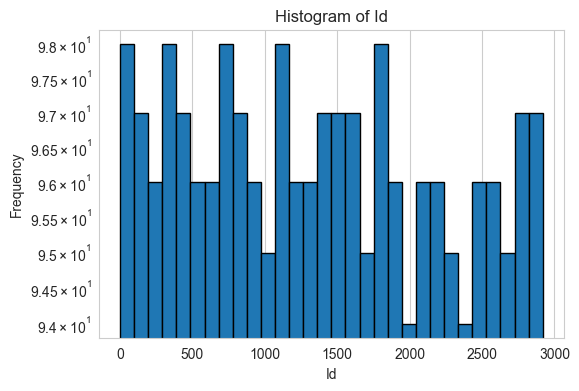

feature: LotFrontage


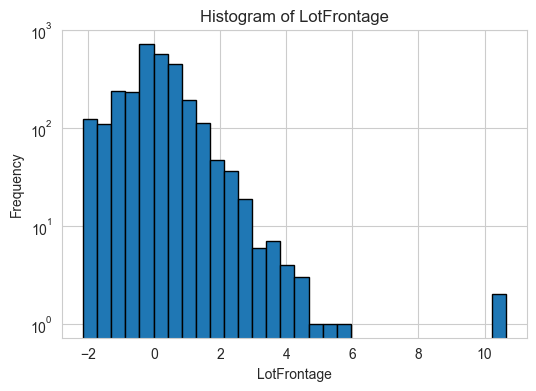

feature: LotArea


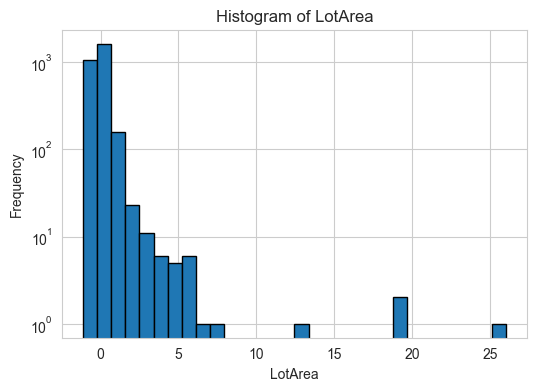

feature: LotShape


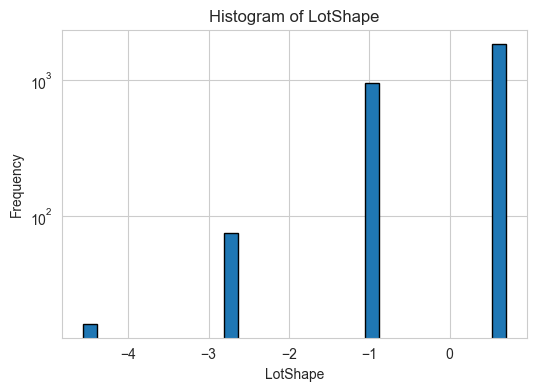

feature: LandContour


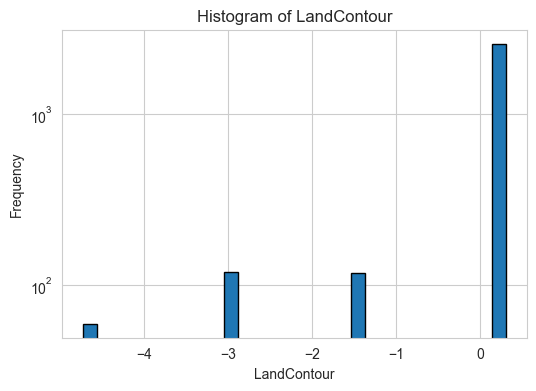

feature: LandSlope


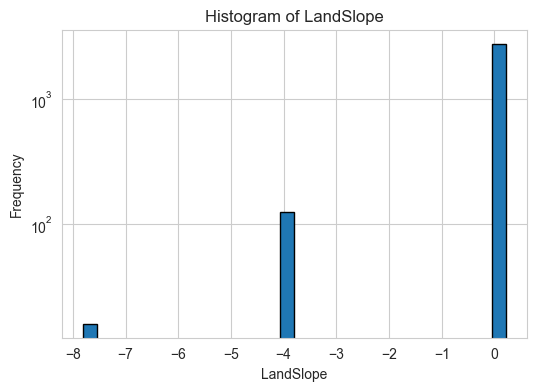

feature: OverallQual


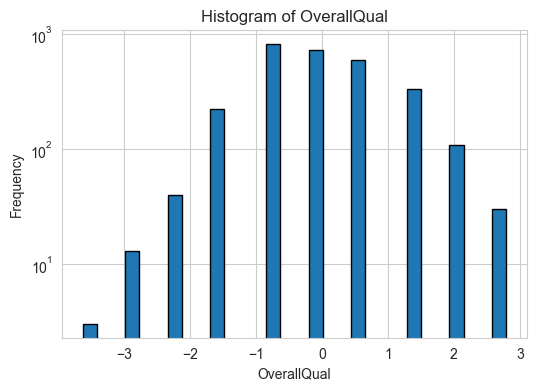

feature: OverallCond


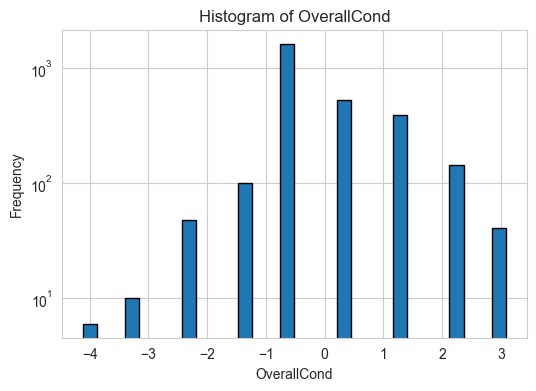

feature: YearBuilt


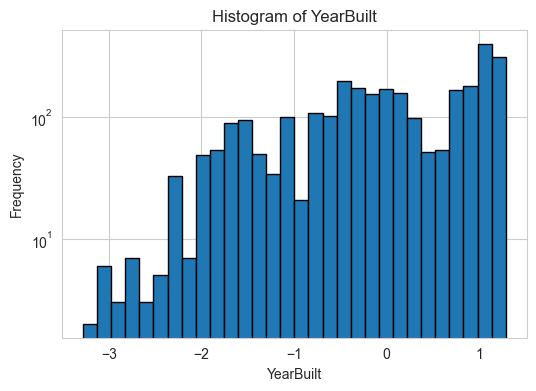

feature: YearRemodAdd


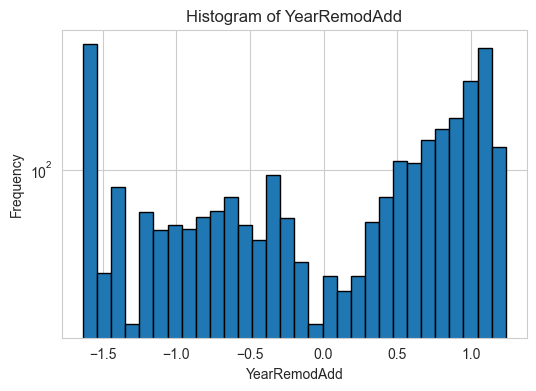

feature: MasVnrArea


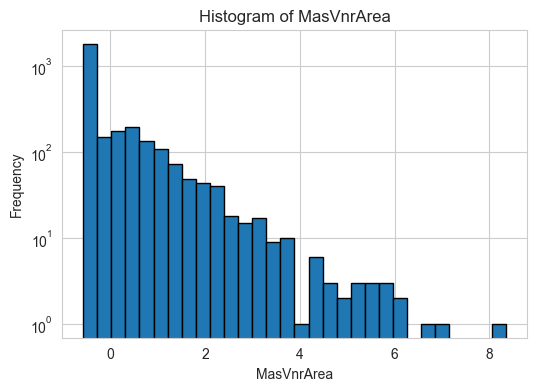

feature: ExterQual


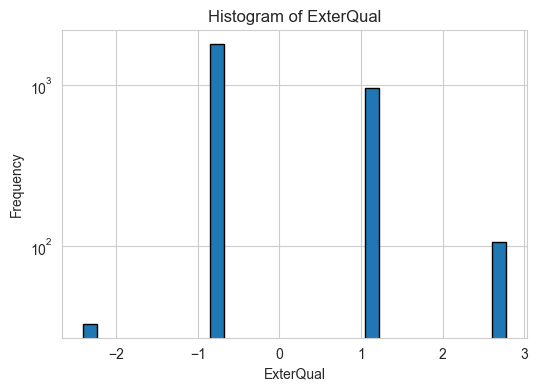

feature: ExterCond


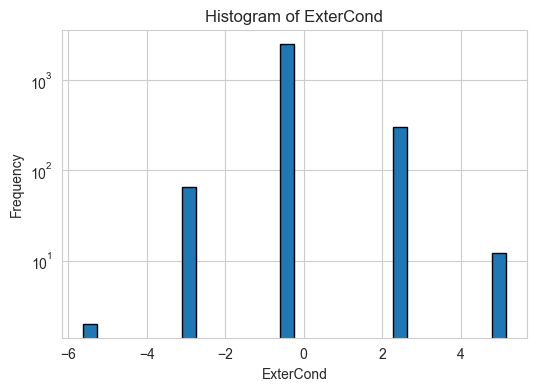

feature: BsmtQual


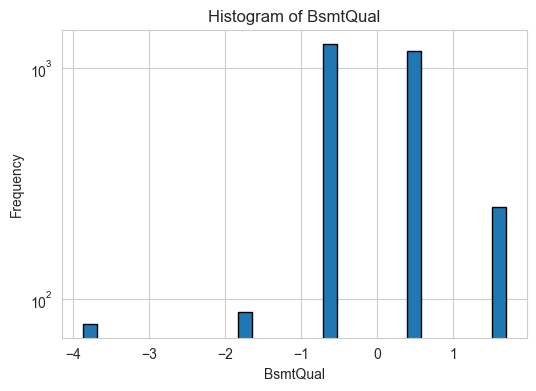

feature: BsmtCond


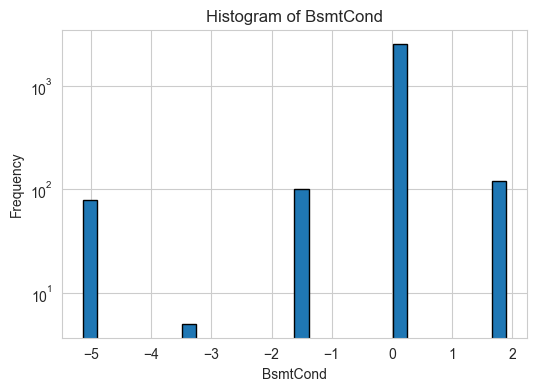

feature: BsmtExposure


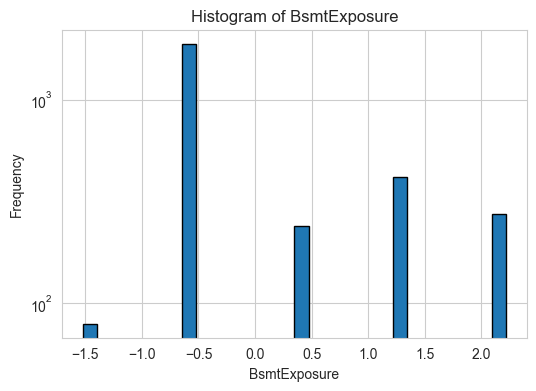

feature: BsmtFinType1


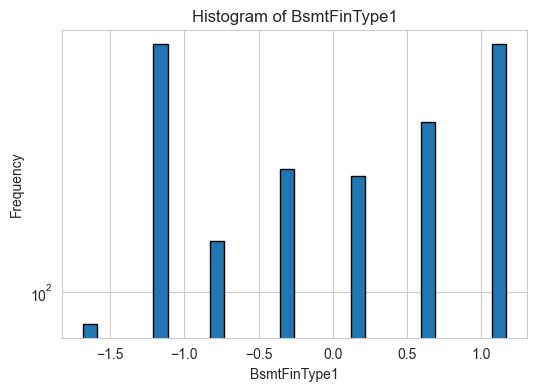

feature: BsmtFinSF1


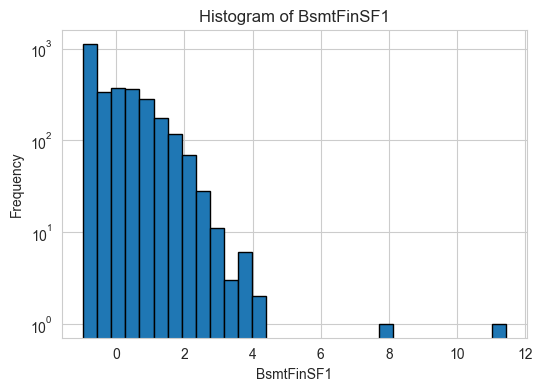

feature: BsmtFinType2


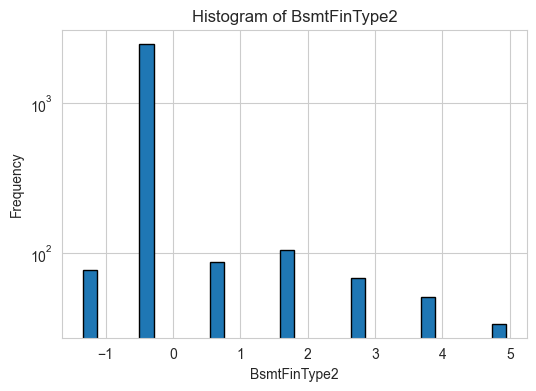

feature: BsmtFinSF2


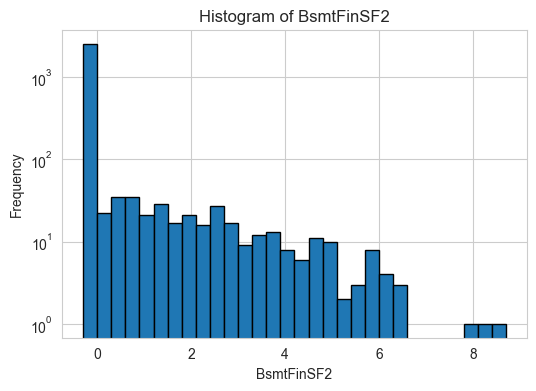

feature: BsmtUnfSF


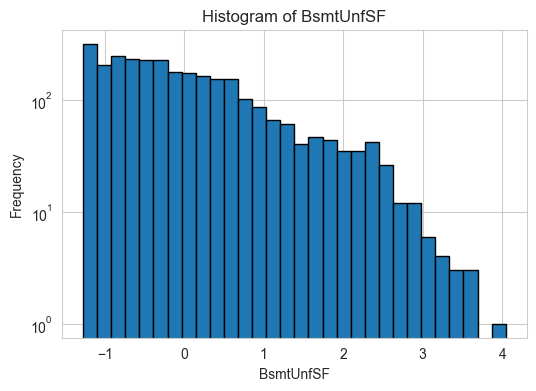

feature: TotalBsmtSF


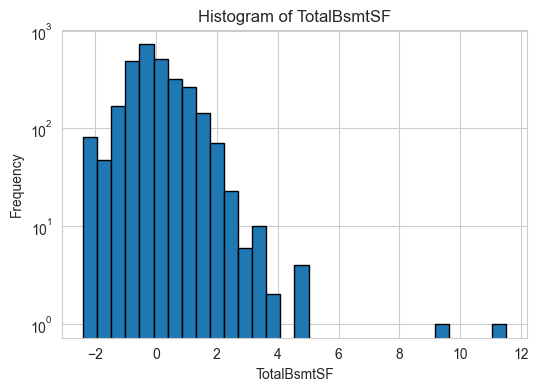

feature: HeatingQC


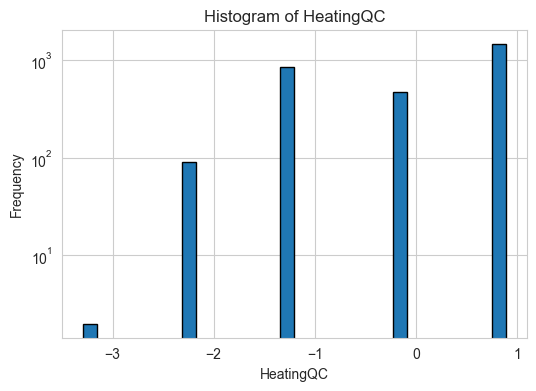

feature: 1stFlrSF


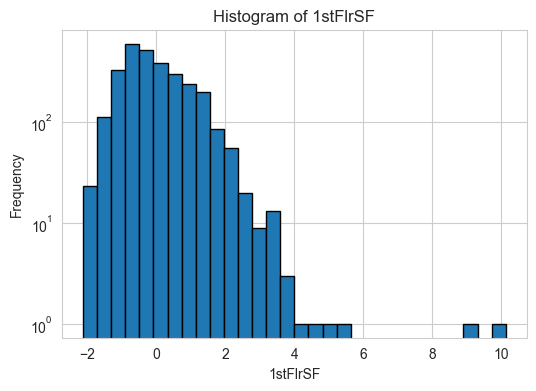

feature: 2ndFlrSF


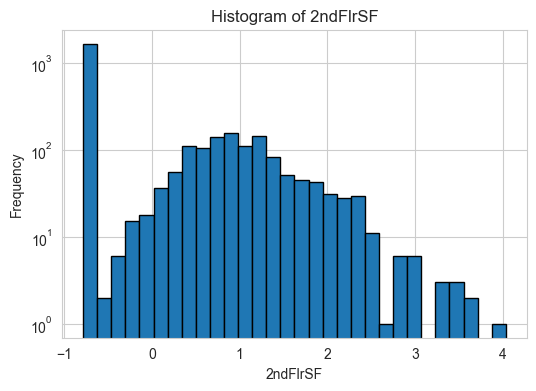

feature: LowQualFinSF


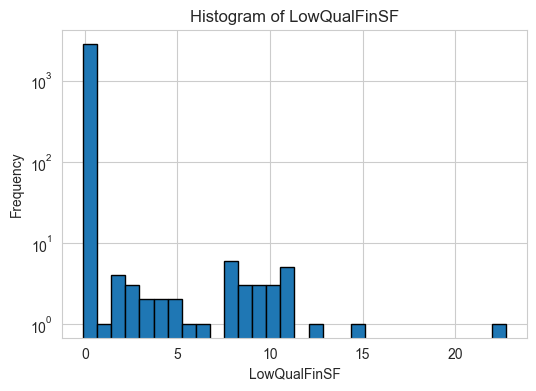

feature: GrLivArea


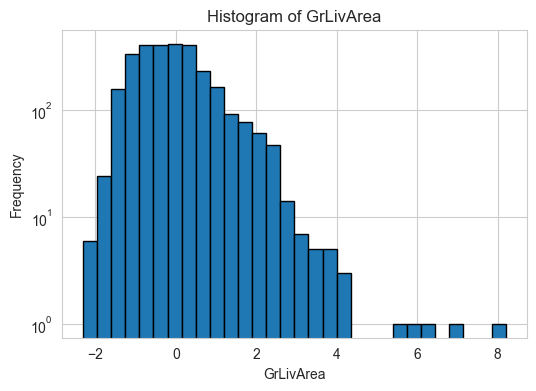

feature: BsmtFullBath


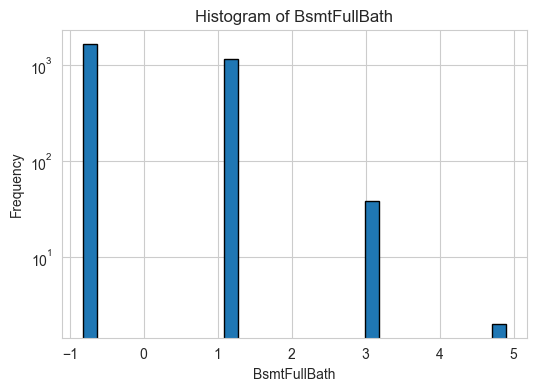

feature: BsmtHalfBath


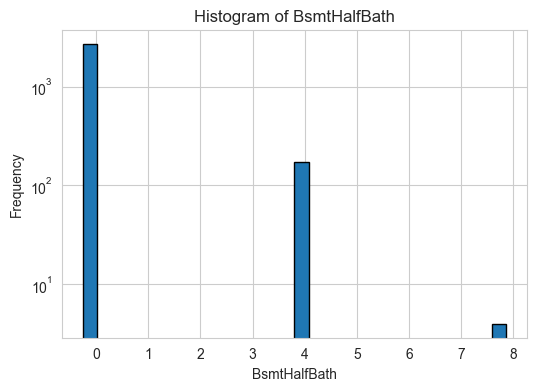

feature: FullBath


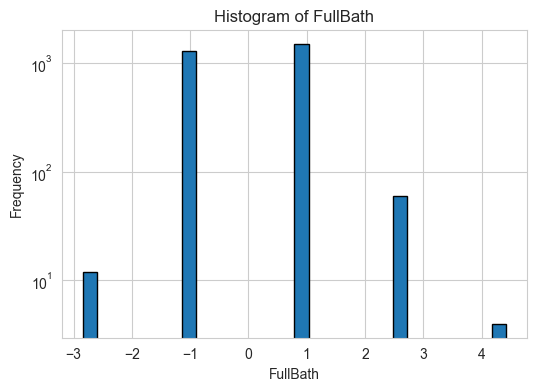

feature: HalfBath


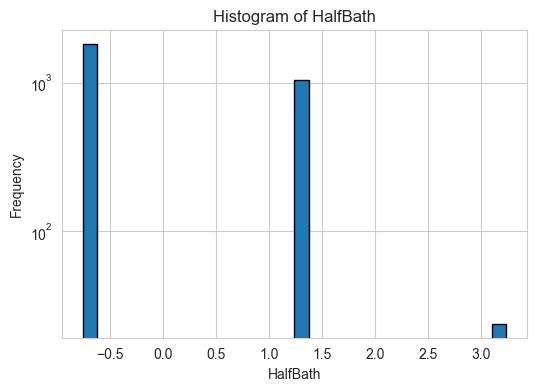

feature: BedroomAbvGr


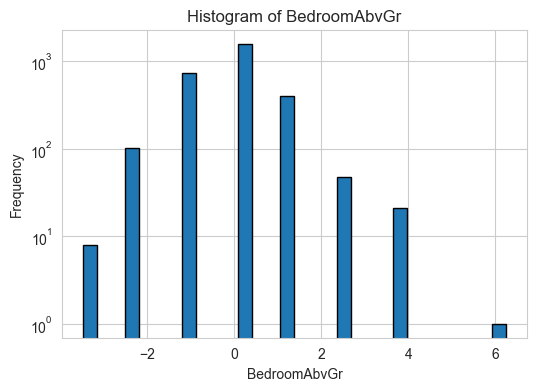

feature: KitchenAbvGr


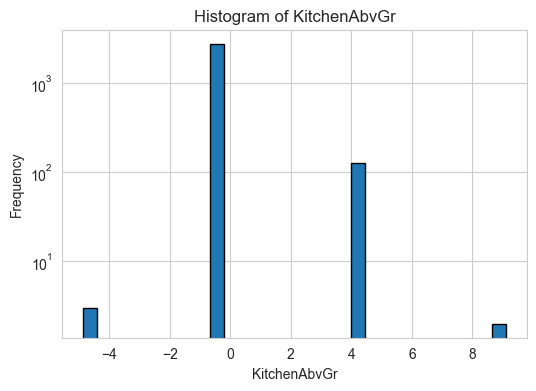

feature: KitchenQual


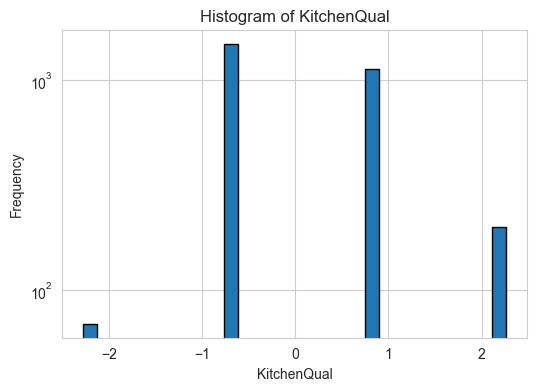

feature: TotRmsAbvGrd


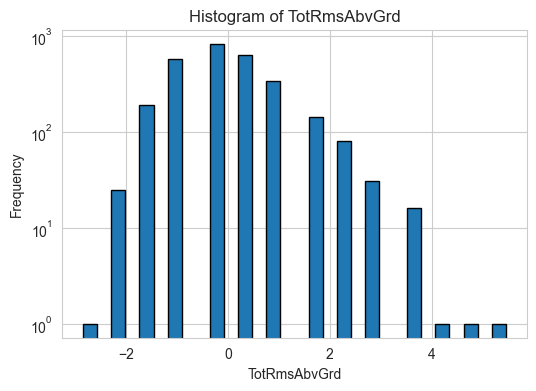

feature: Functional


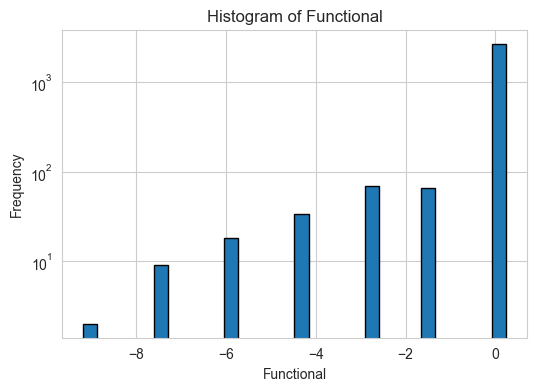

feature: Fireplaces


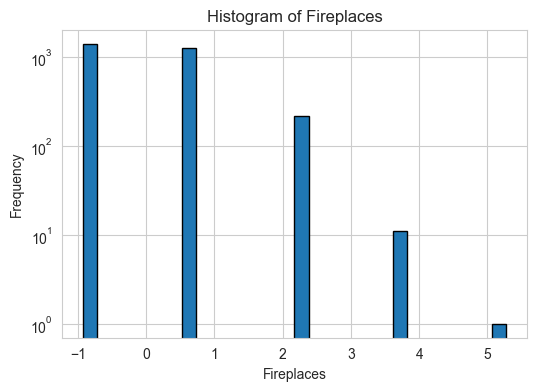

feature: FireplaceQu


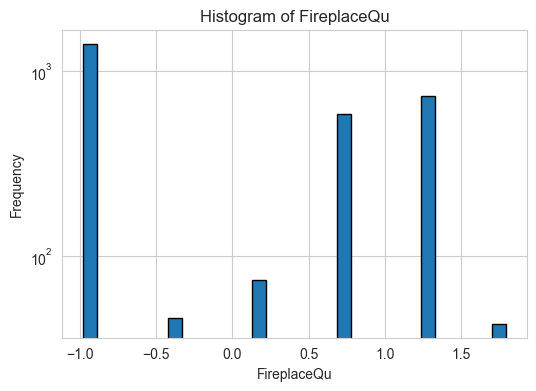

feature: GarageYrBlt


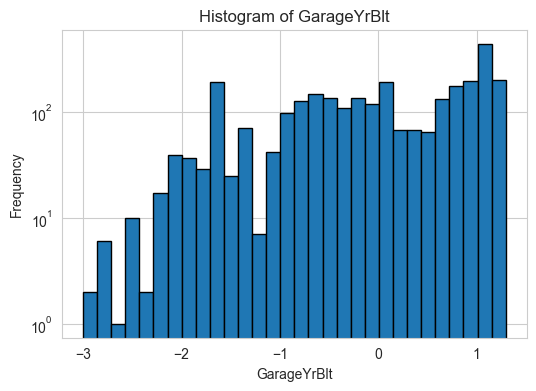

feature: GarageFinish


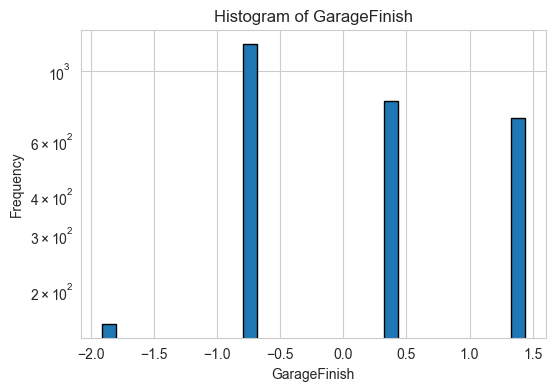

feature: GarageCars


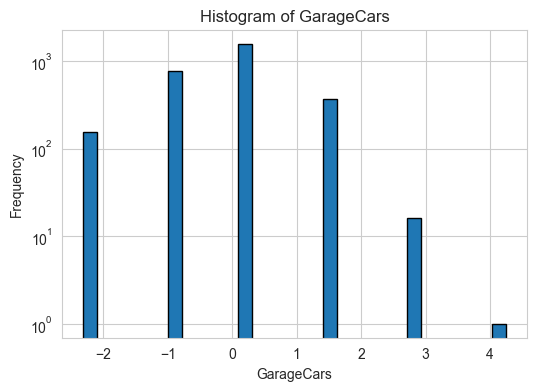

feature: GarageArea


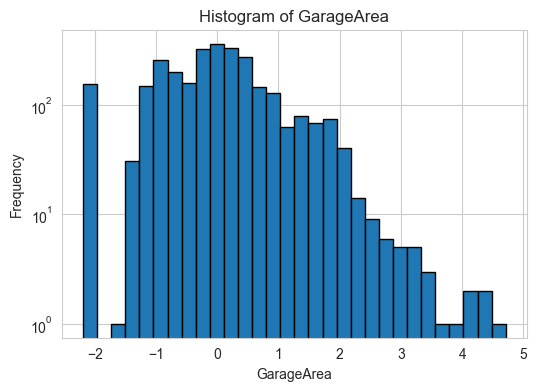

feature: GarageQual


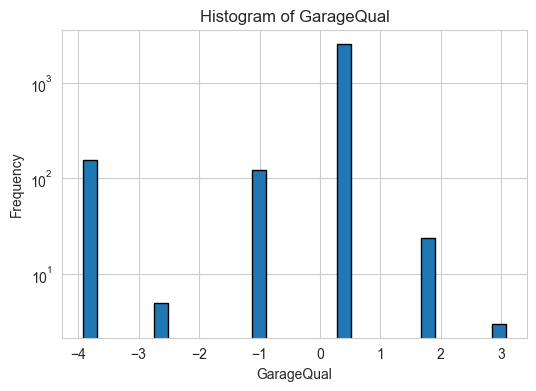

feature: GarageCond


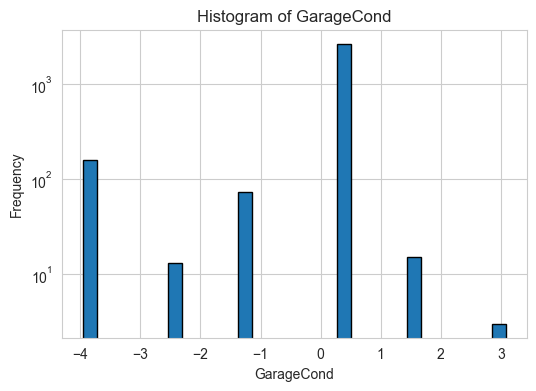

feature: PavedDrive


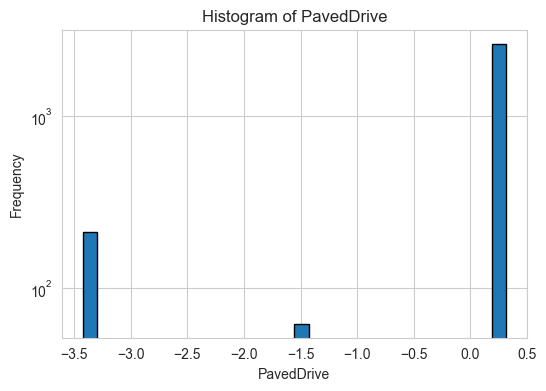

feature: WoodDeckSF


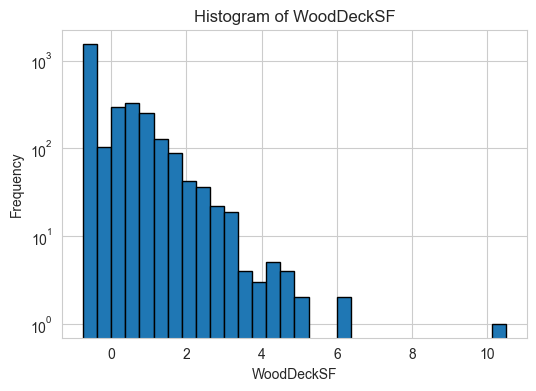

feature: OpenPorchSF


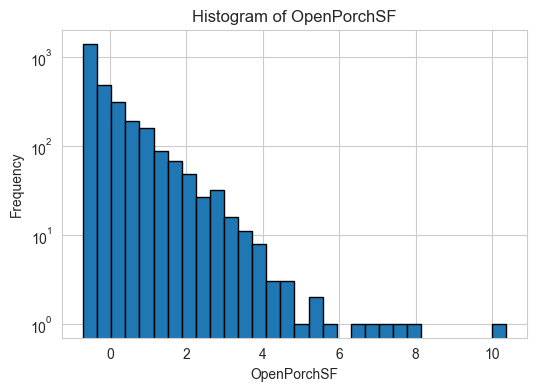

feature: EnclosedPorch


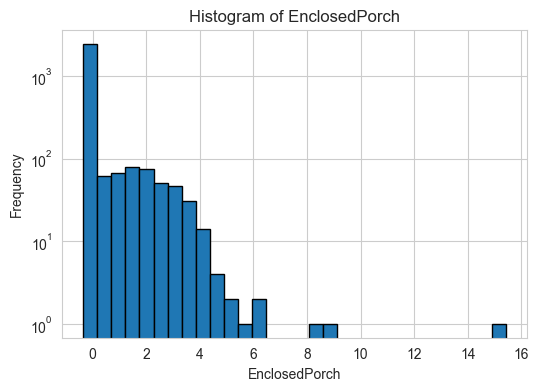

feature: 3SsnPorch


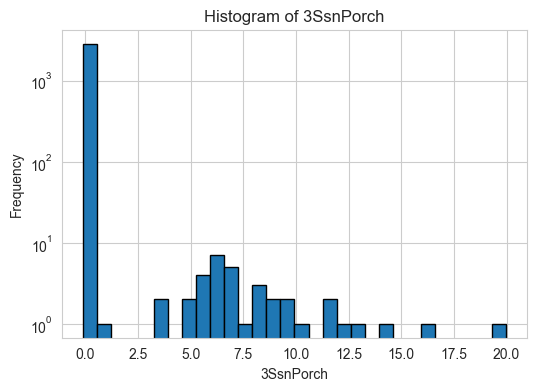

feature: ScreenPorch


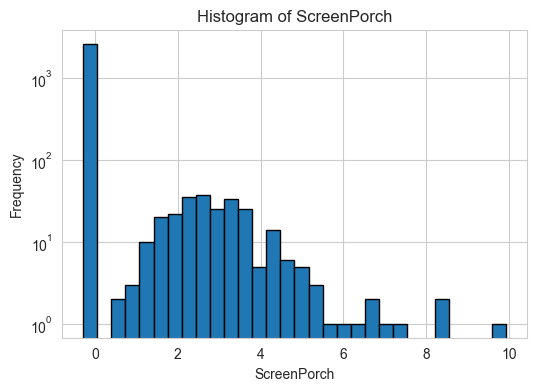

feature: PoolArea


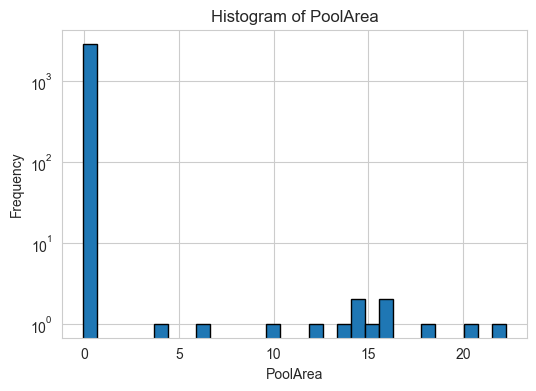

feature: PoolQC


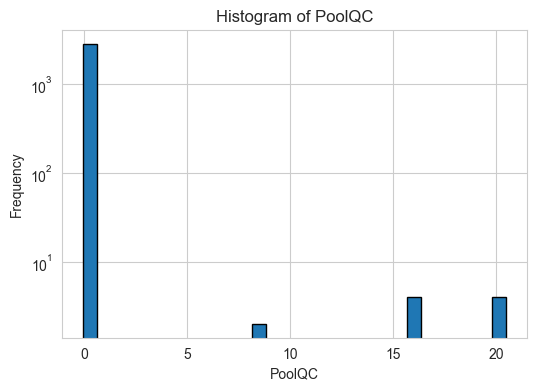

feature: MiscVal


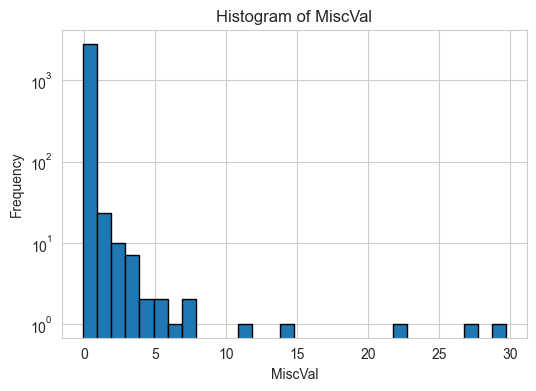

feature: MoSold


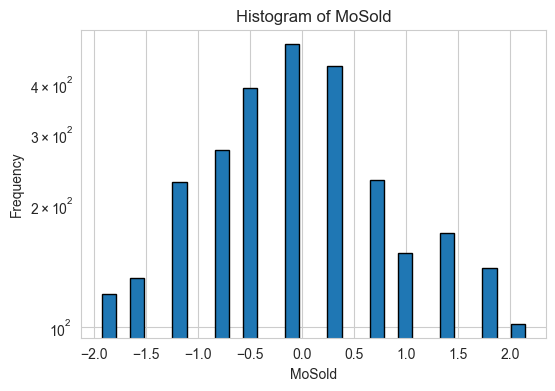

feature: YrSold


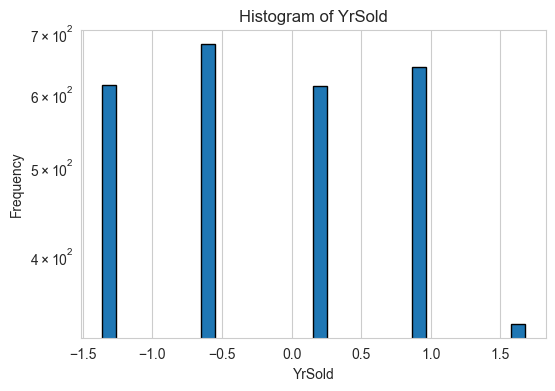

feature: MSSubClass_SC120
feature: MSSubClass_SC150
feature: MSSubClass_SC160
feature: MSSubClass_SC180
feature: MSSubClass_SC190
feature: MSSubClass_SC20
feature: MSSubClass_SC30
feature: MSSubClass_SC40
feature: MSSubClass_SC45
feature: MSSubClass_SC50
feature: MSSubClass_SC60
feature: MSSubClass_SC70
feature: MSSubClass_SC75
feature: MSSubClass_SC80
feature: MSSubClass_SC85
feature: MSSubClass_SC90
feature: MSZoning_C (all)
feature: MSZoning_FV
feature: MSZoning_RH
feature: MSZoning_RL
feature: MSZoning_RM
feature: Street_Grvl
feature: Street_Pave
feature: Alley_Grvl
feature: Alley_Pave
feature: Utilities_AllPub
feature: Utilities_NoSeWa
feature: LotConfig_Corner
feature: LotConfig_CulDSac
feature: LotConfig_FR2
feature: LotConfig_FR3
feature: LotConfig_Inside
feature: Neighborhood_Blmngtn
feature: Neighborhood_Blueste
feature: Neighborhood_BrDale
feature: Neighborhood_BrkSide
feature: Neighborhood_ClearCr
feature: Neighborhood_CollgCr
feature: Neighborhood_Crawfor
feature: Neighbor

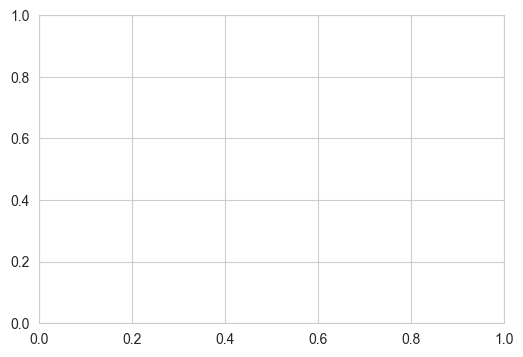

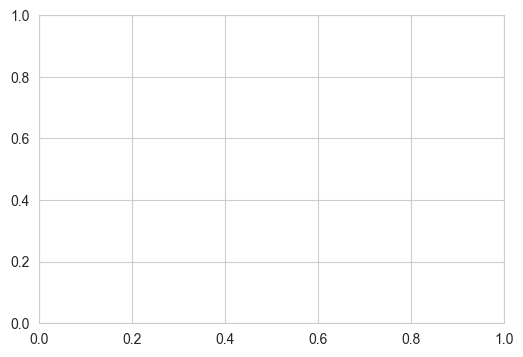

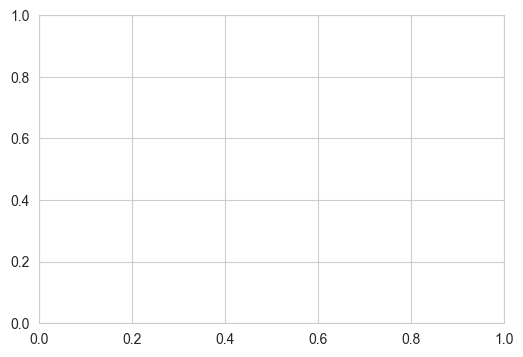

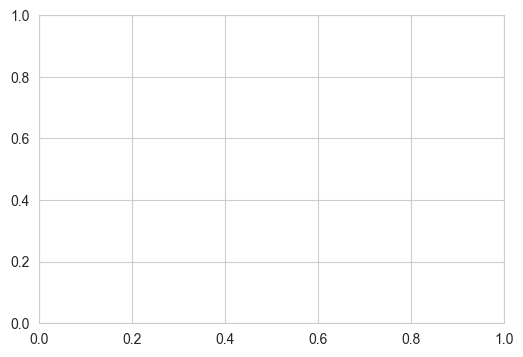

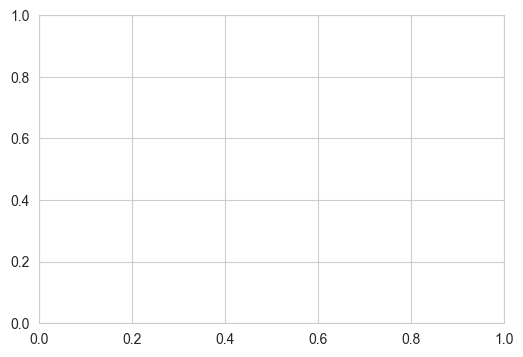

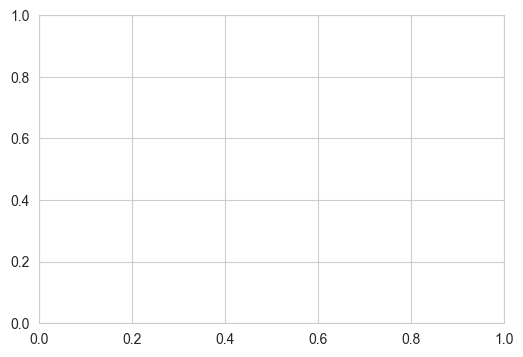

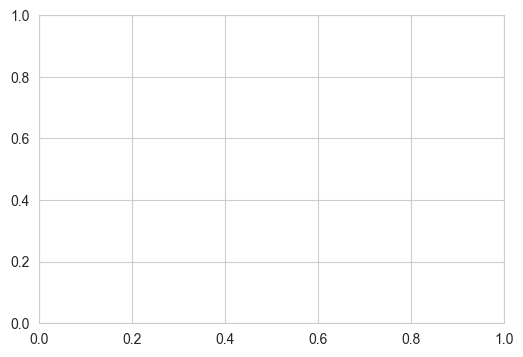

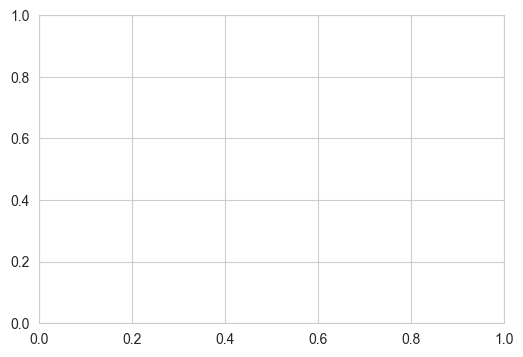

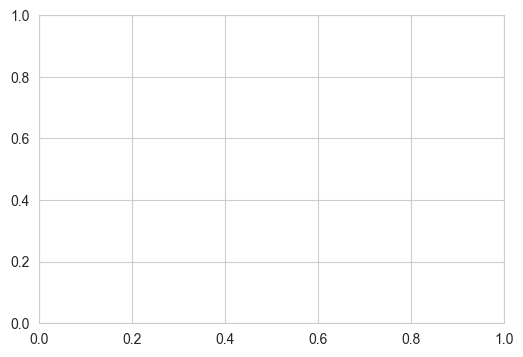

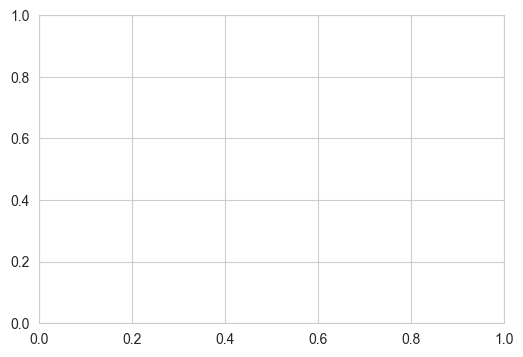

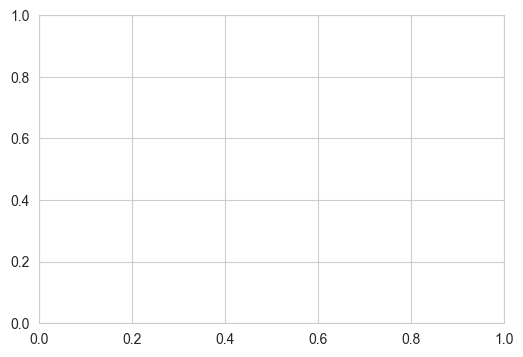

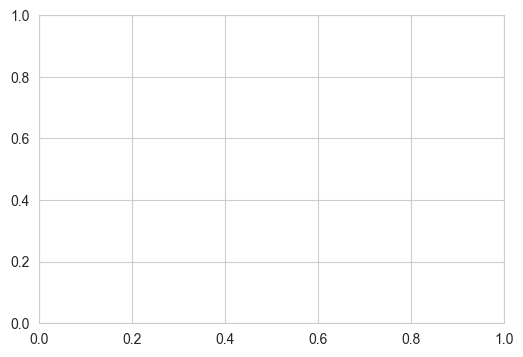

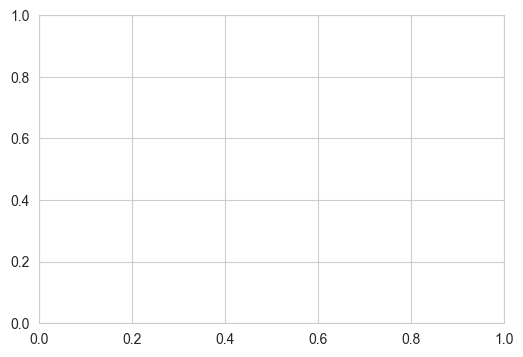

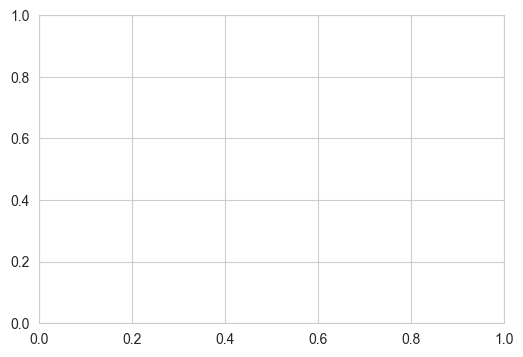

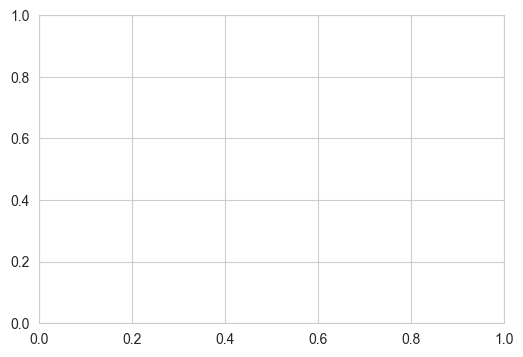

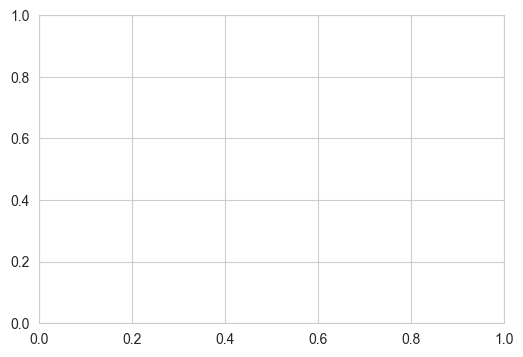

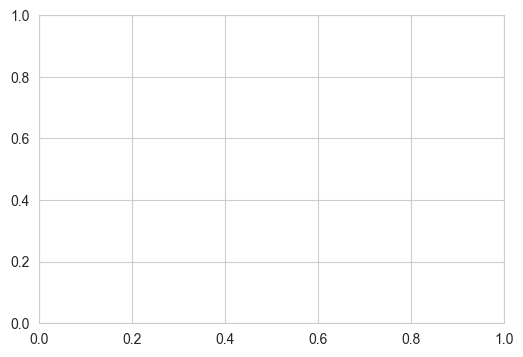

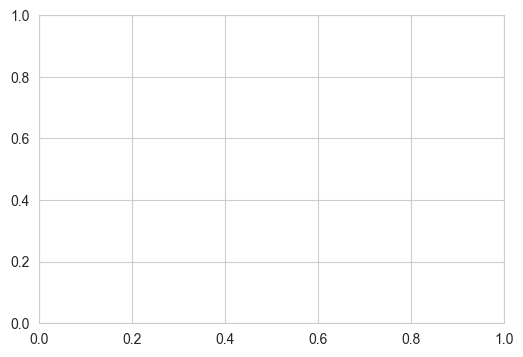

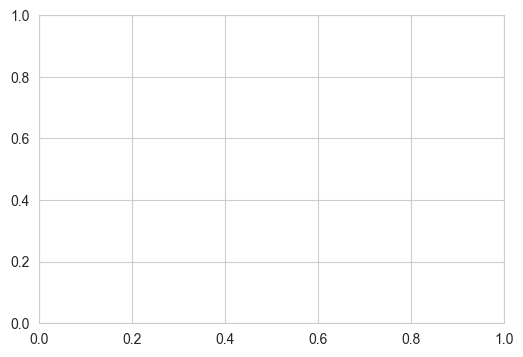

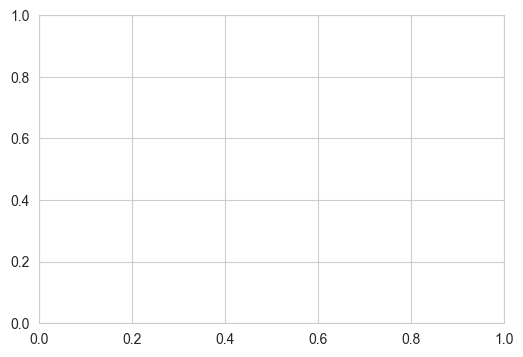

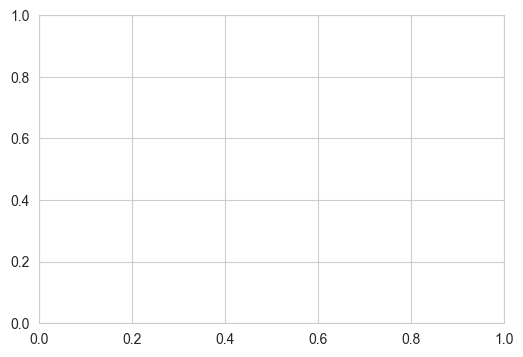

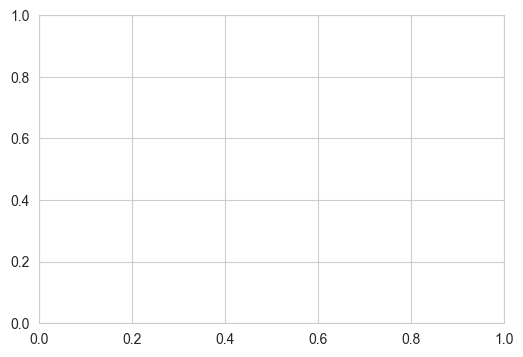

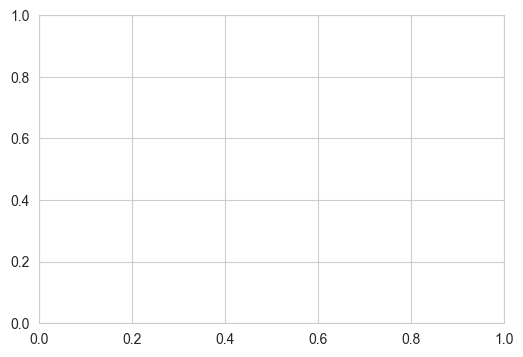

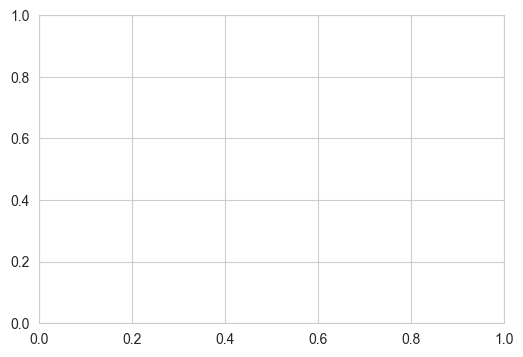

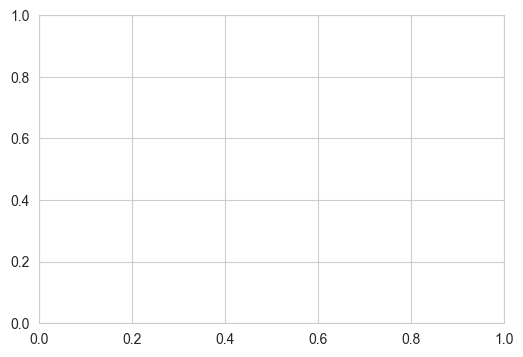

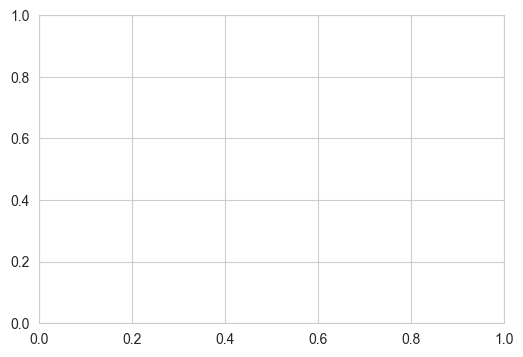

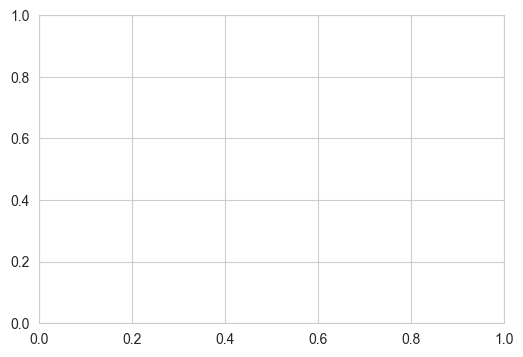

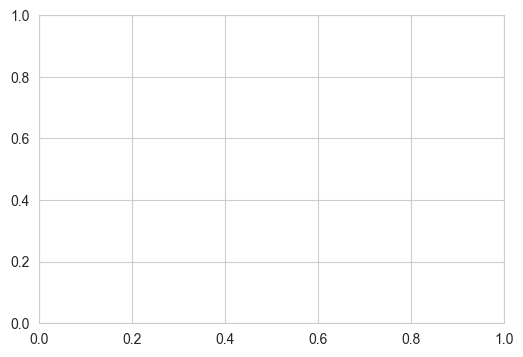

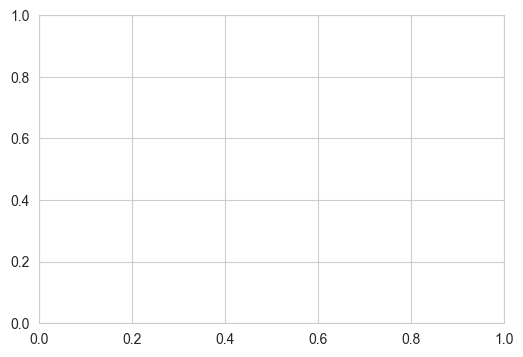

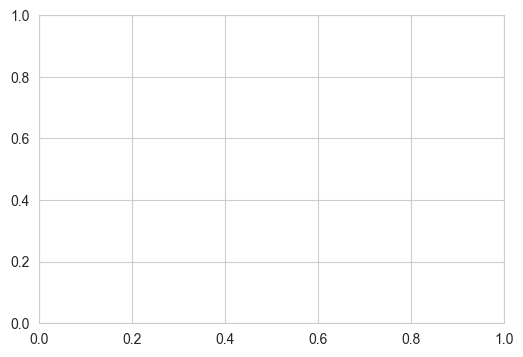

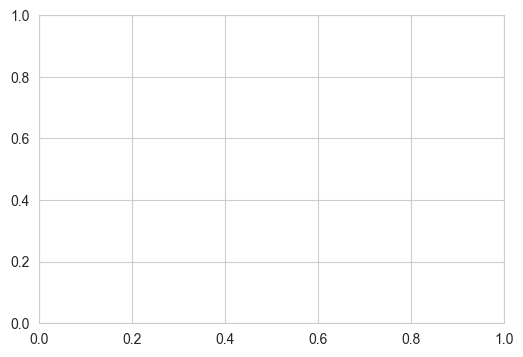

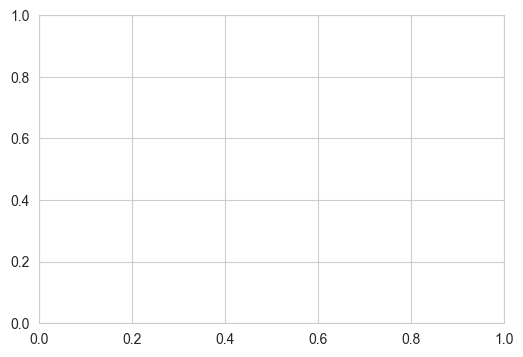

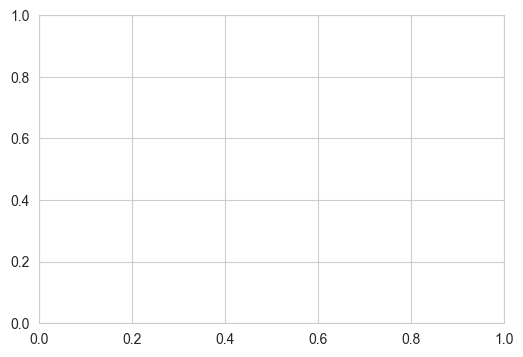

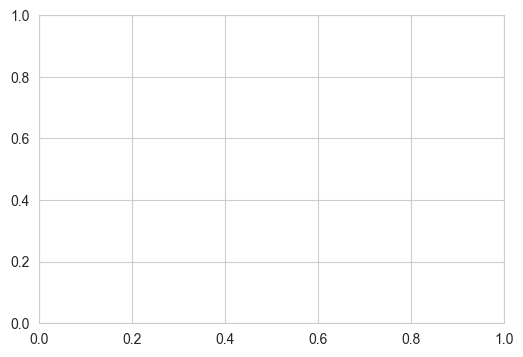

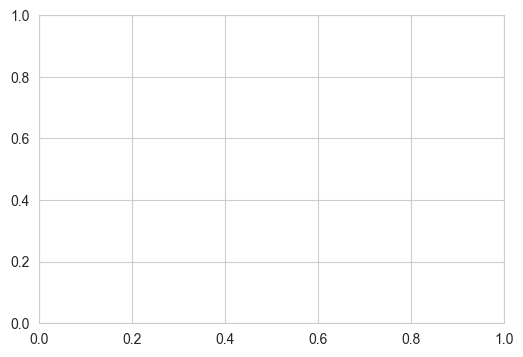

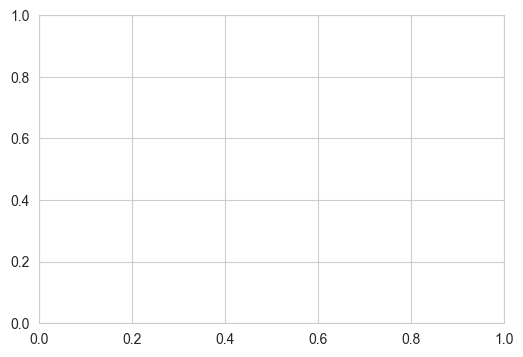

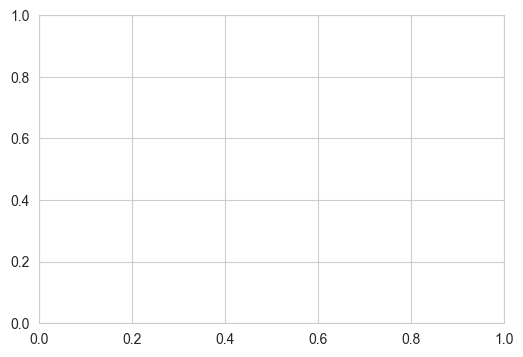

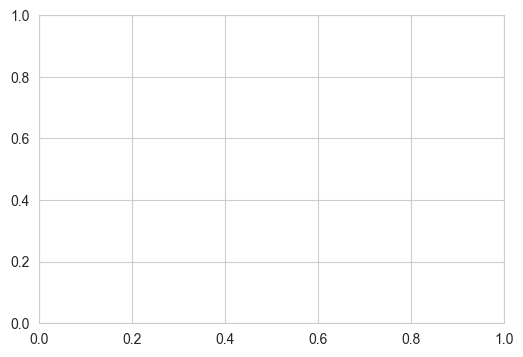

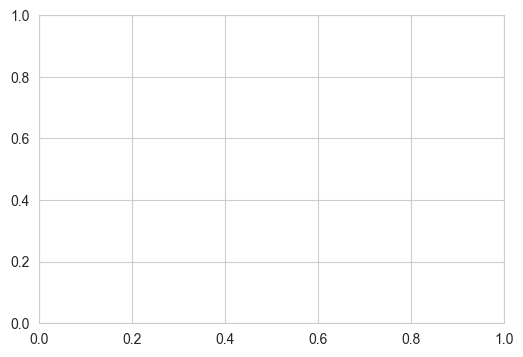

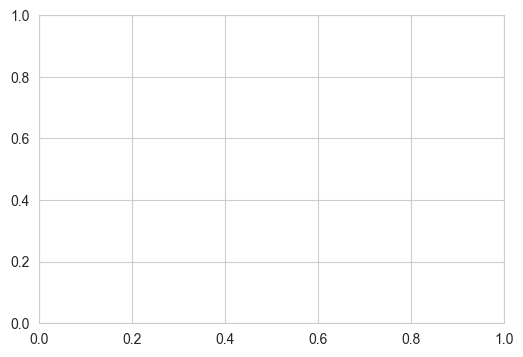

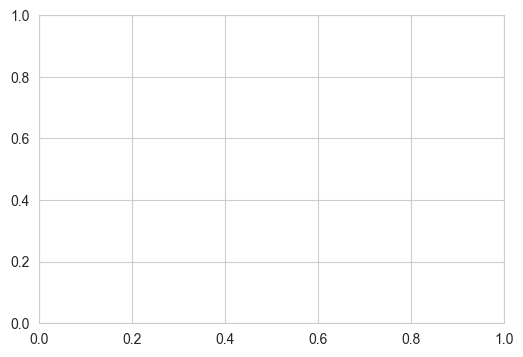

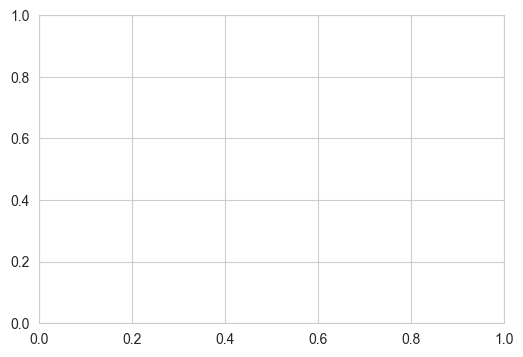

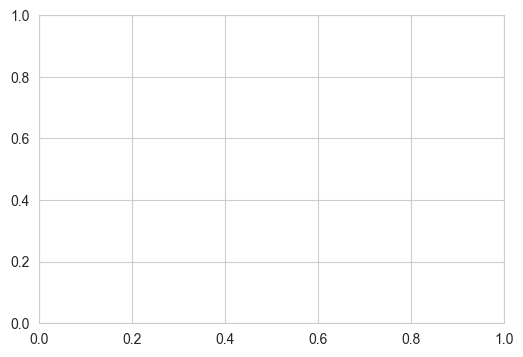

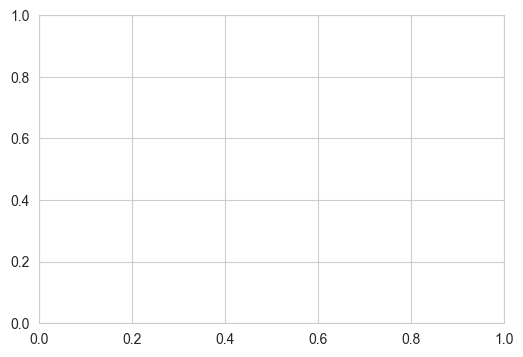

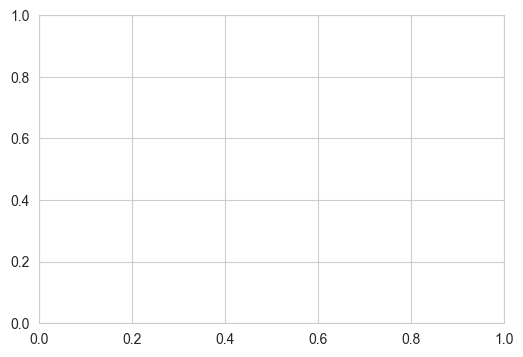

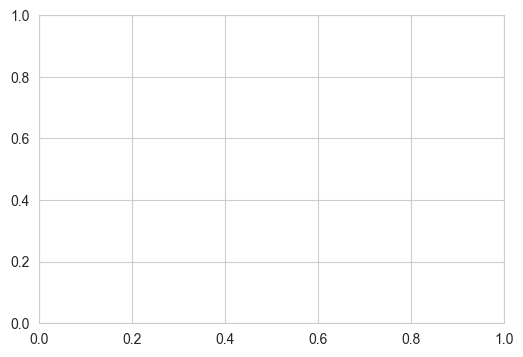

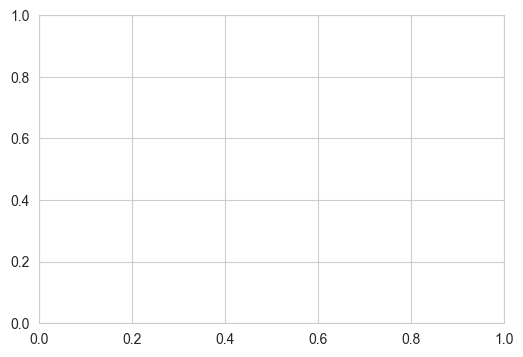

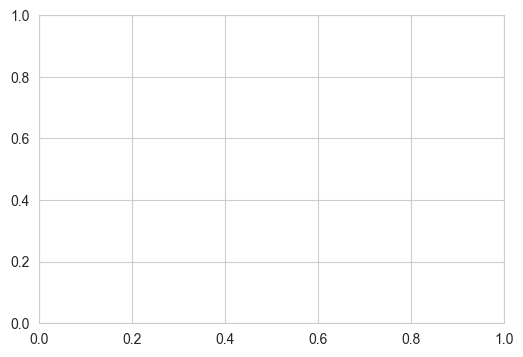

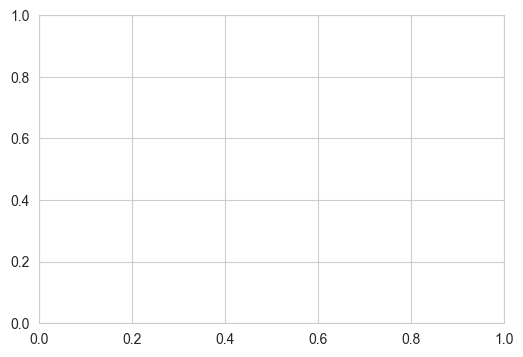

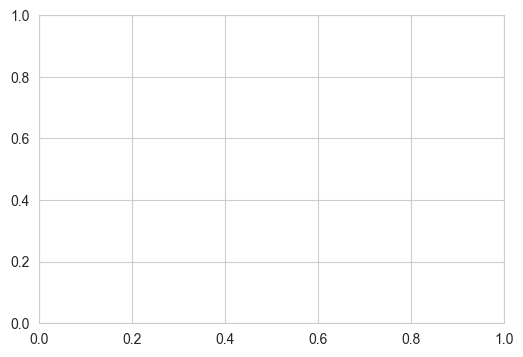

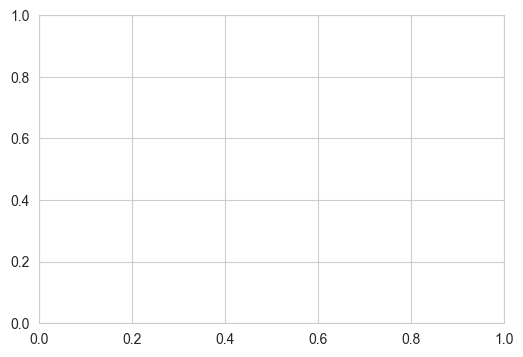

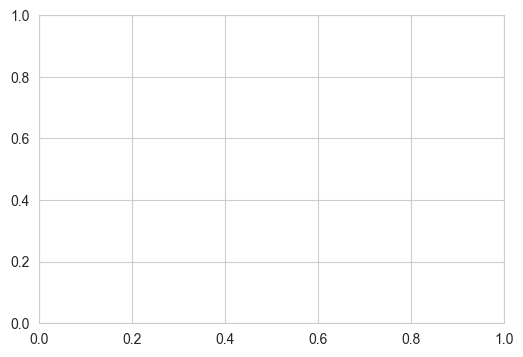

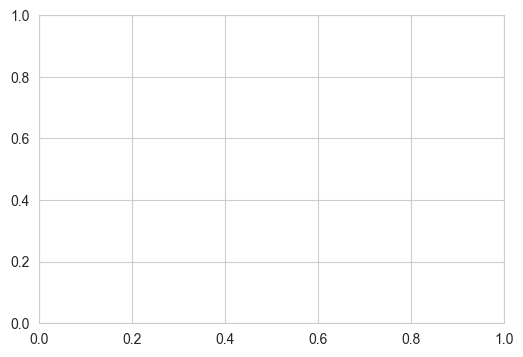

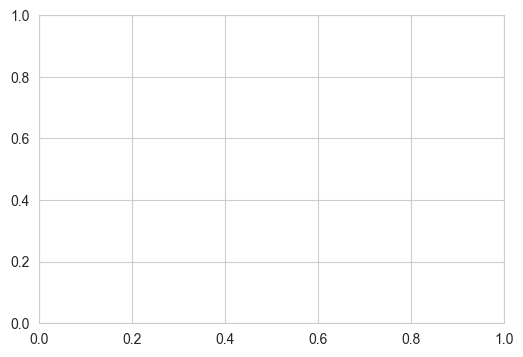

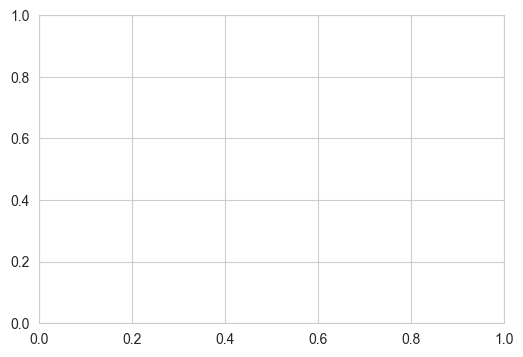

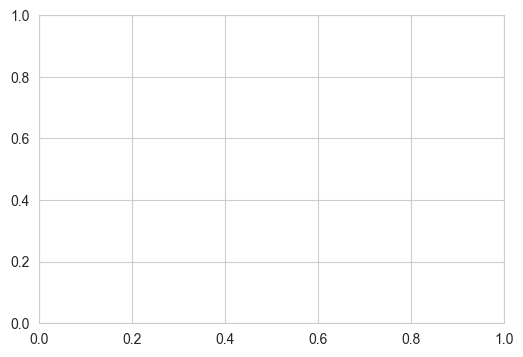

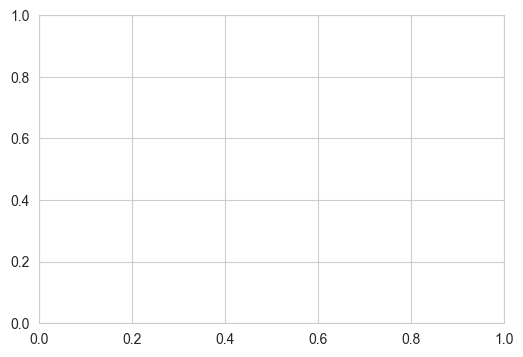

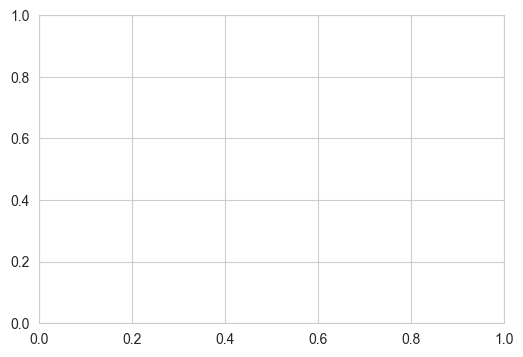

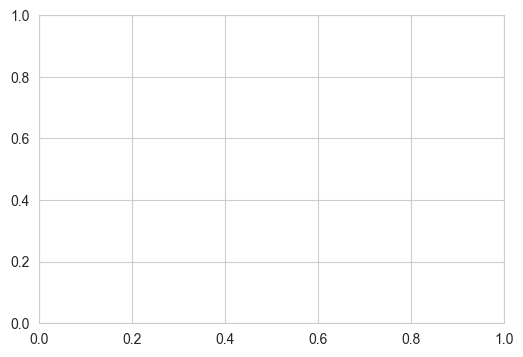

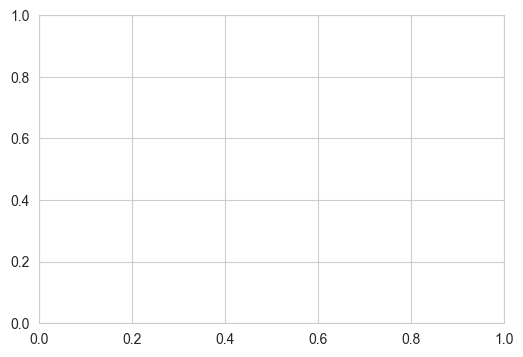

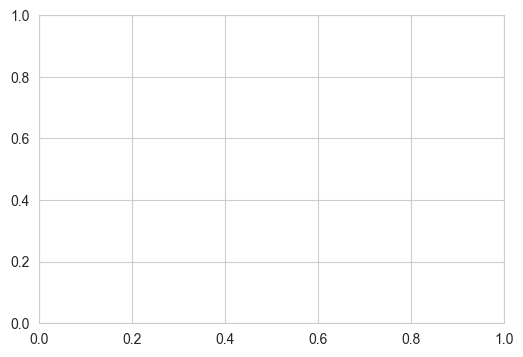

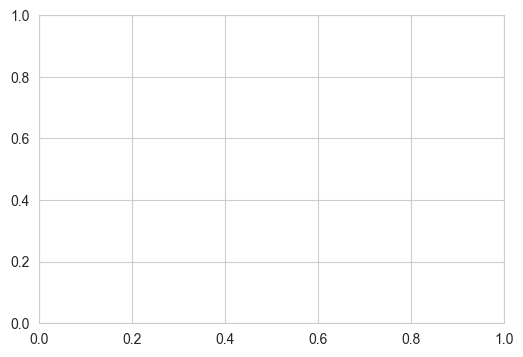

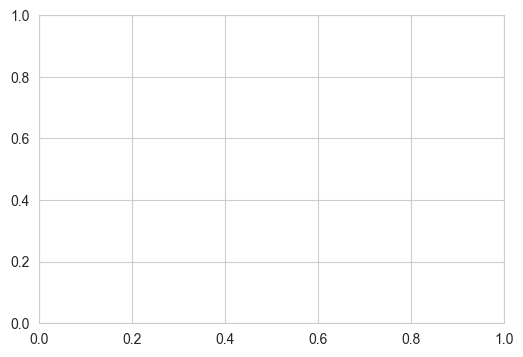

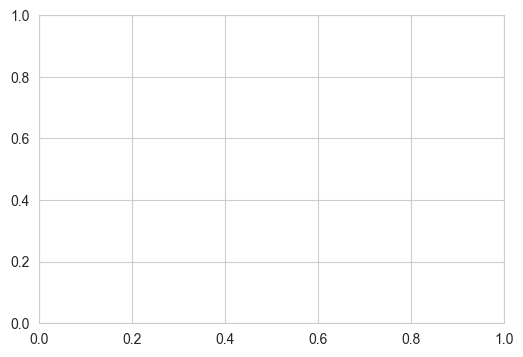

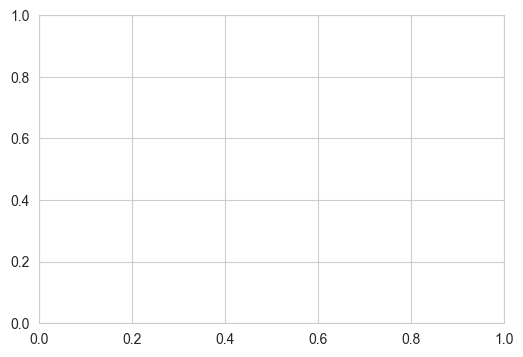

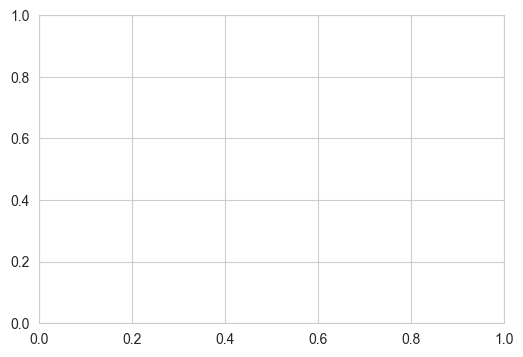

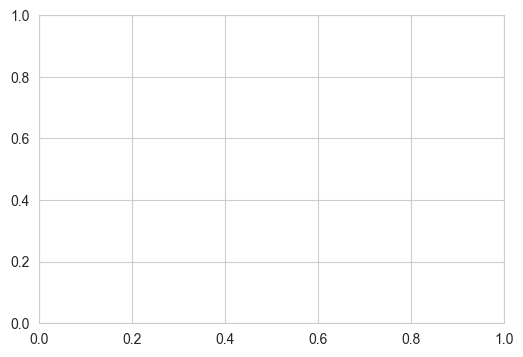

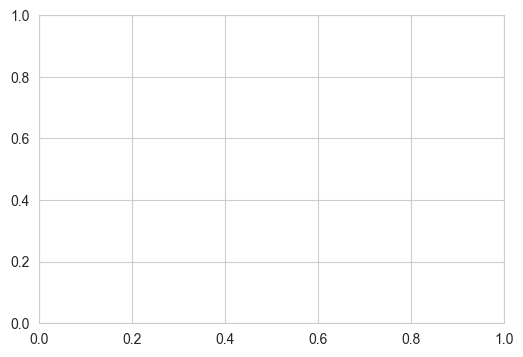

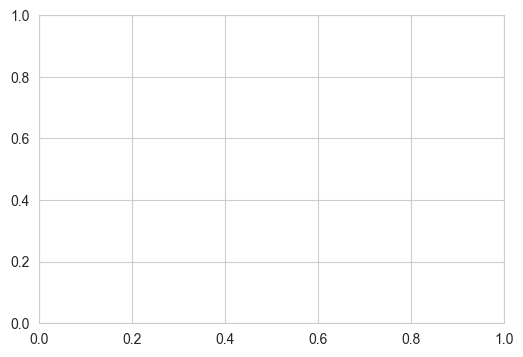

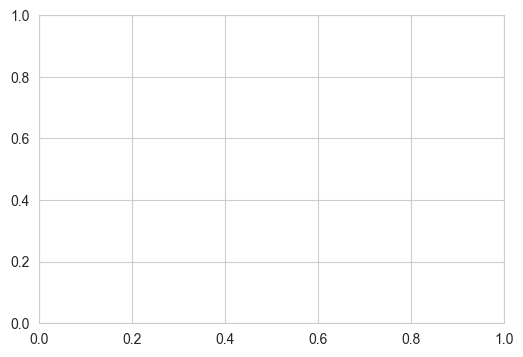

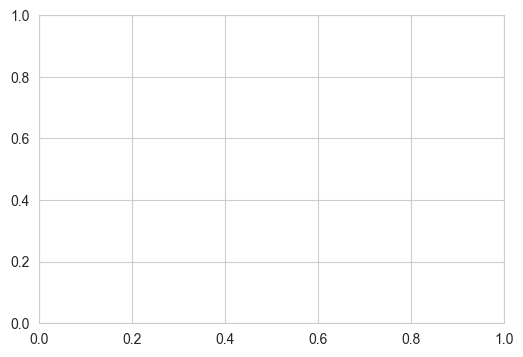

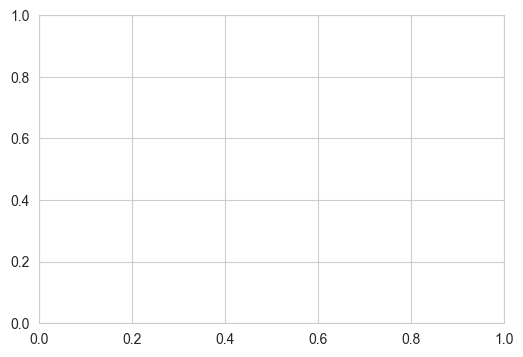

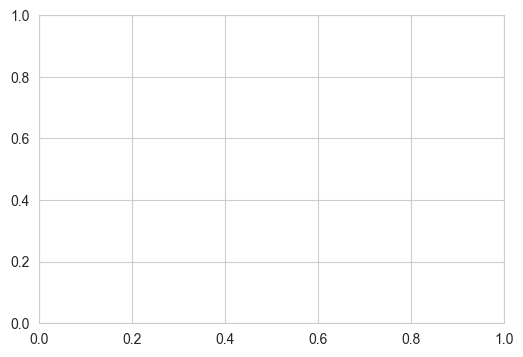

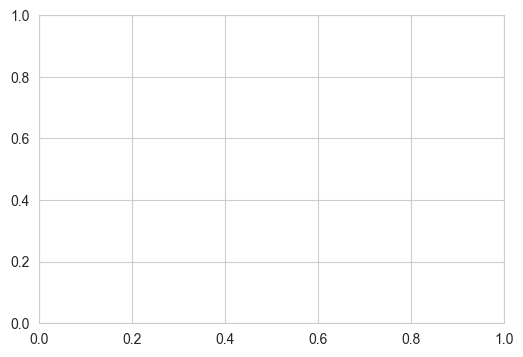

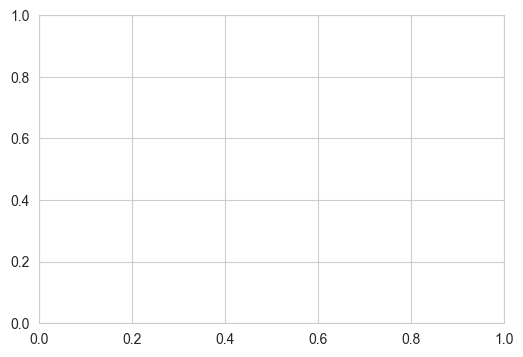

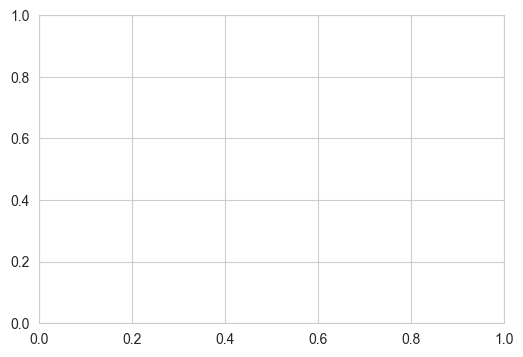

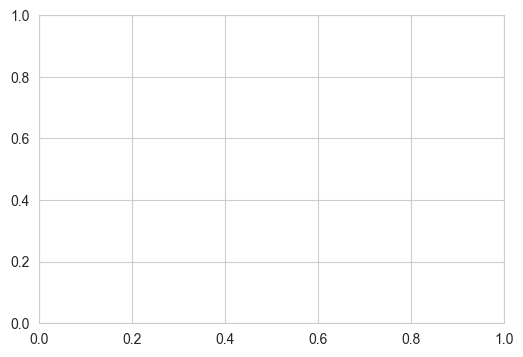

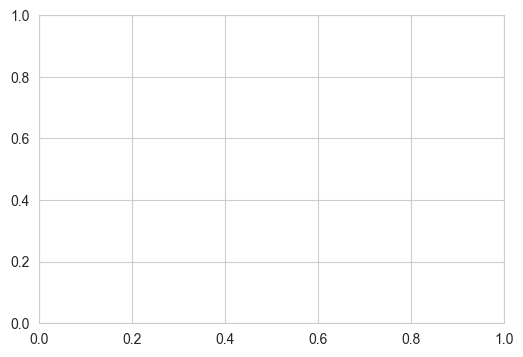

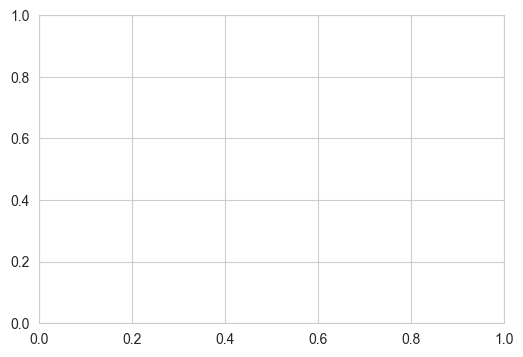

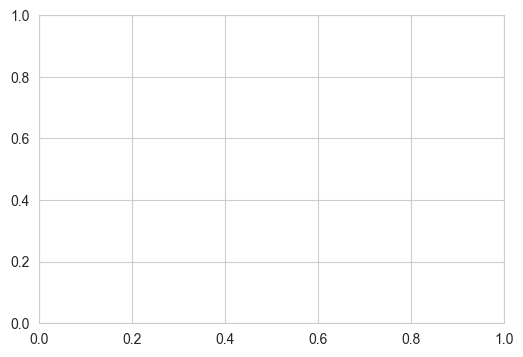

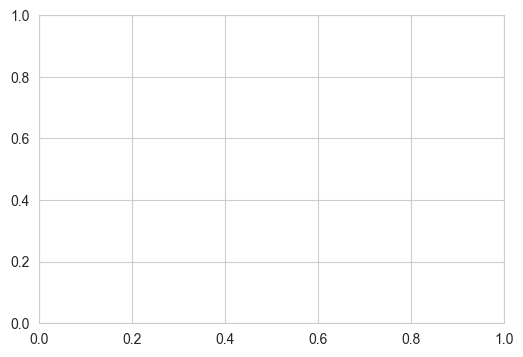

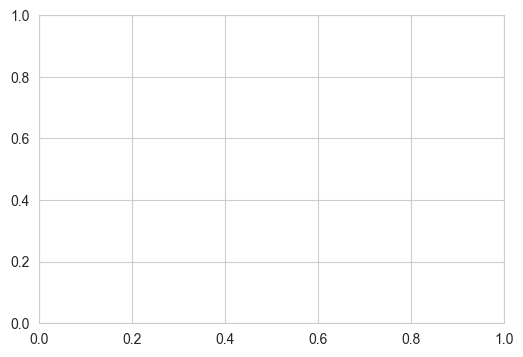

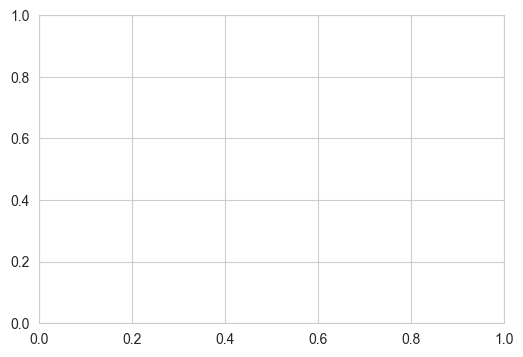

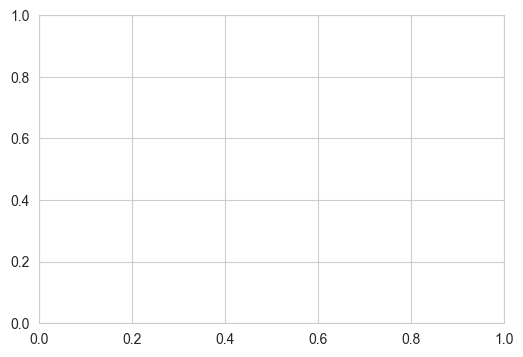

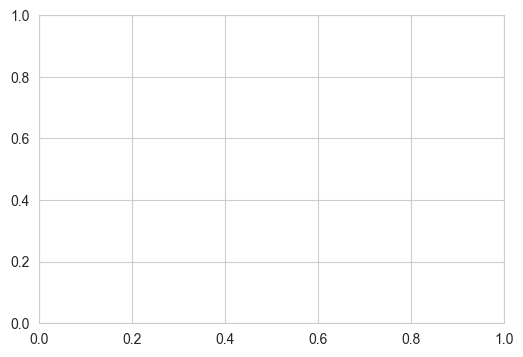

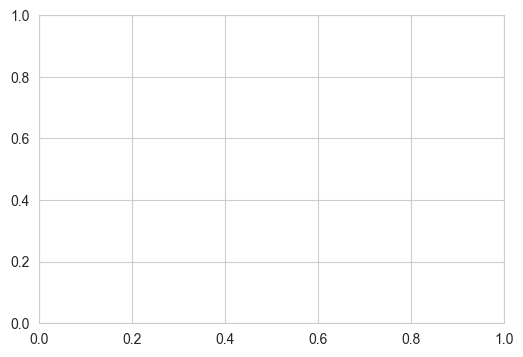

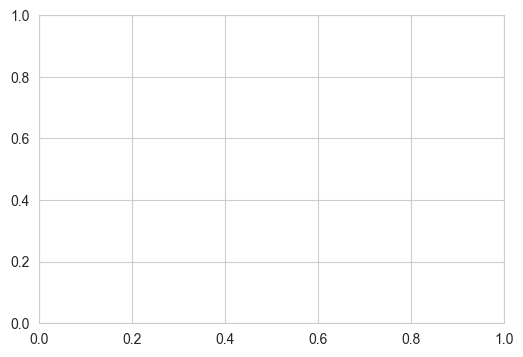

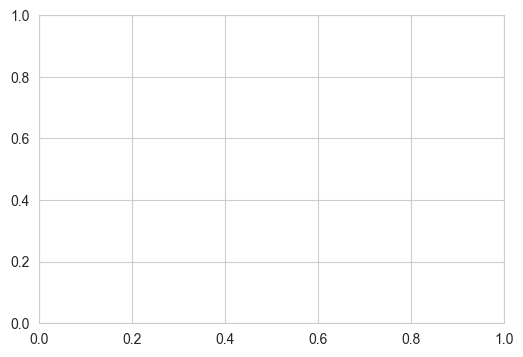

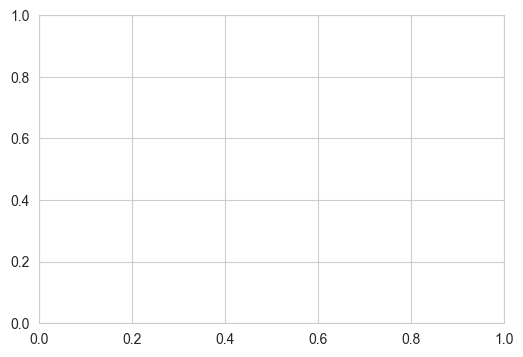

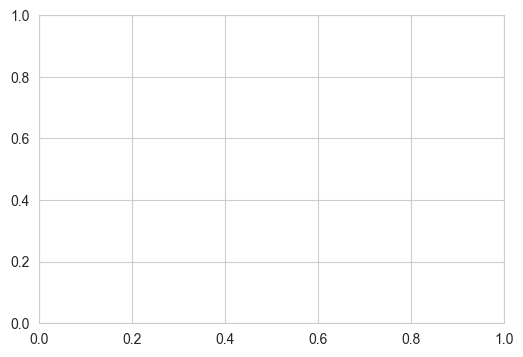

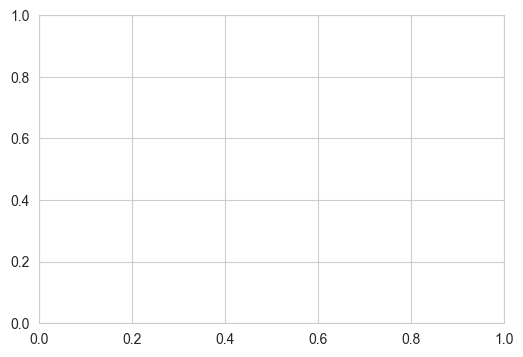

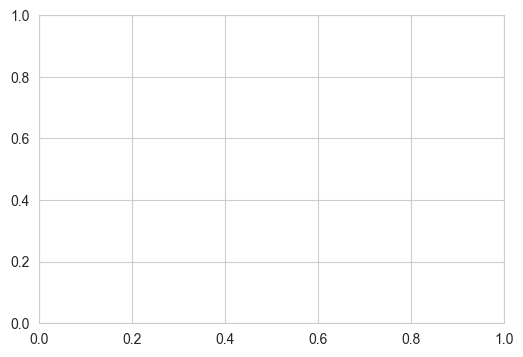

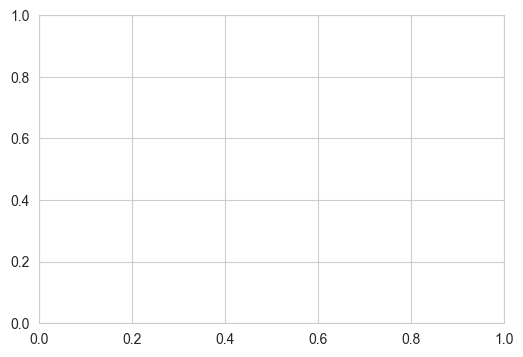

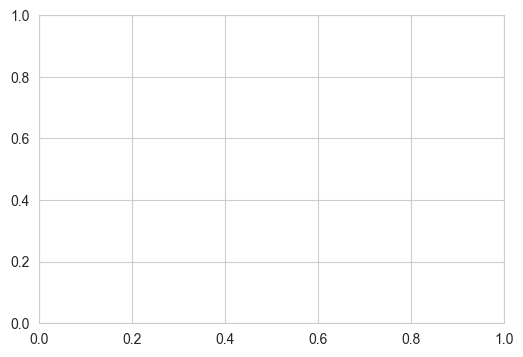

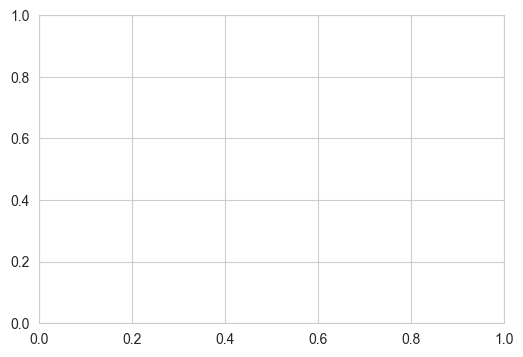

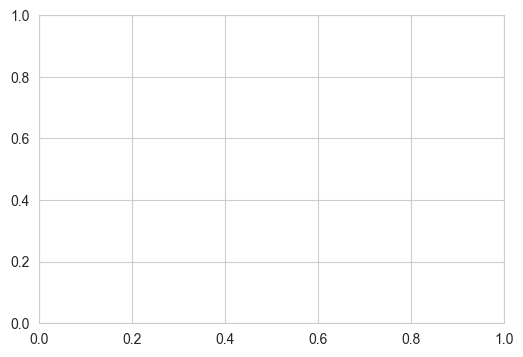

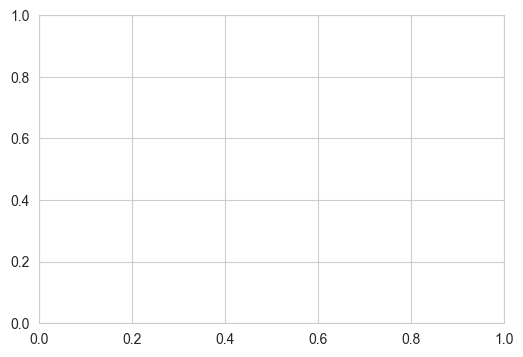

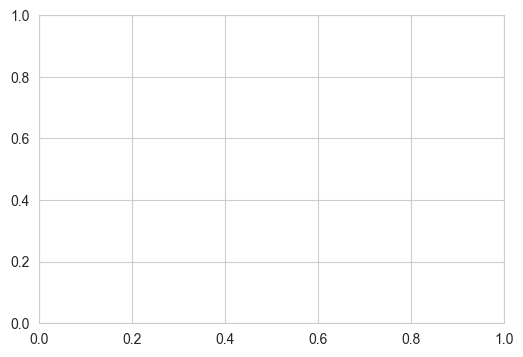

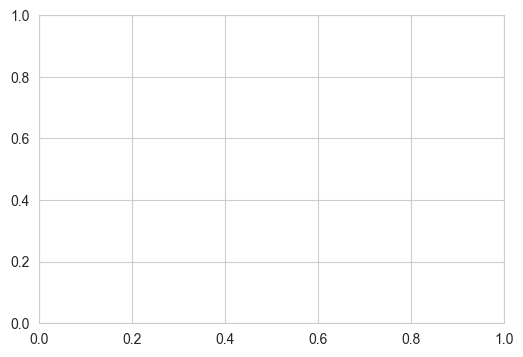

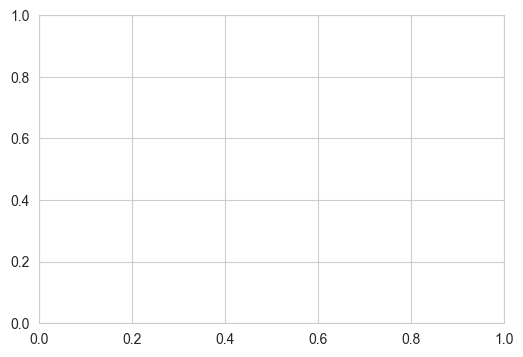

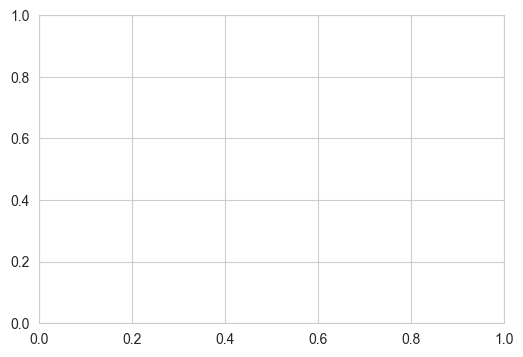

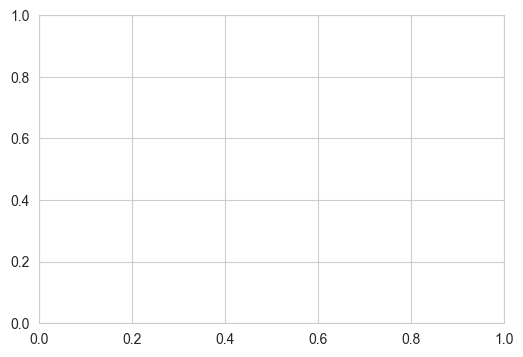

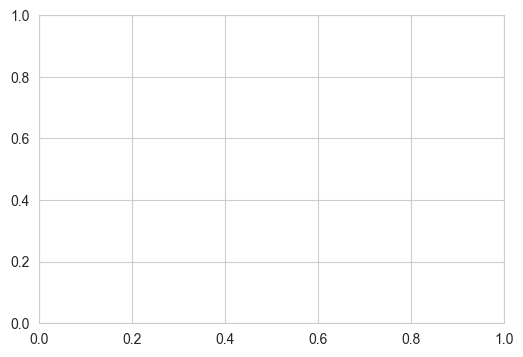

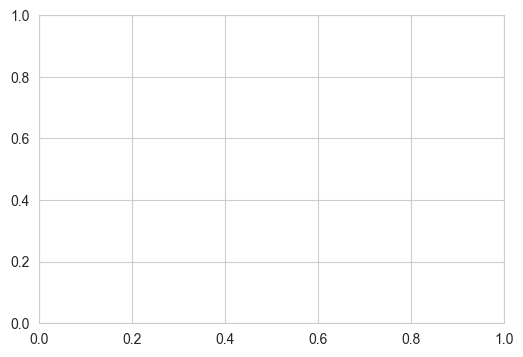

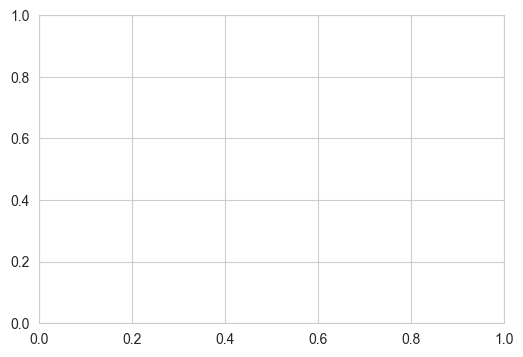

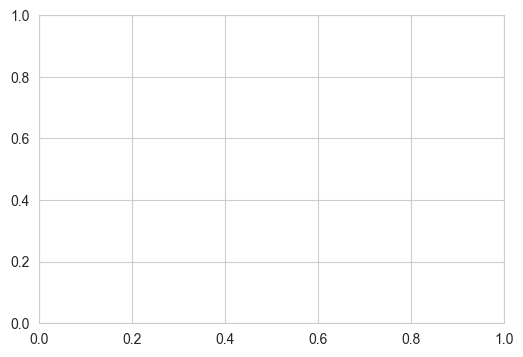

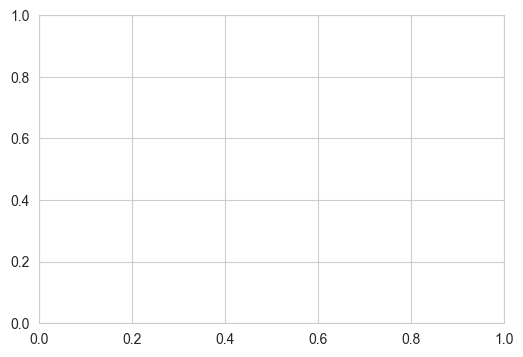

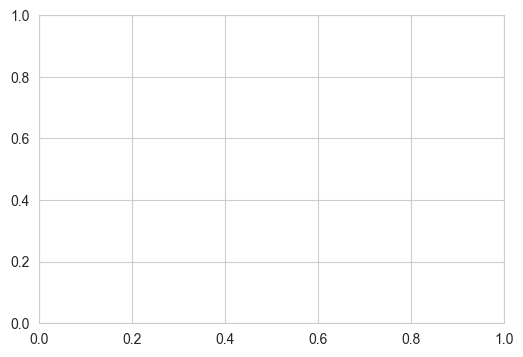

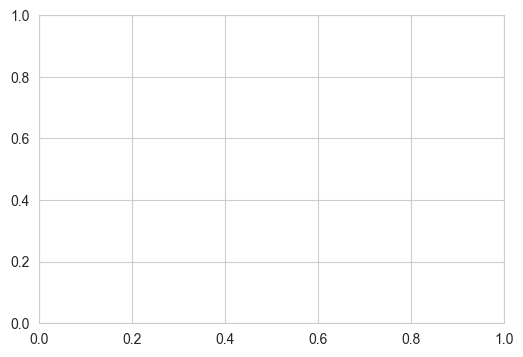

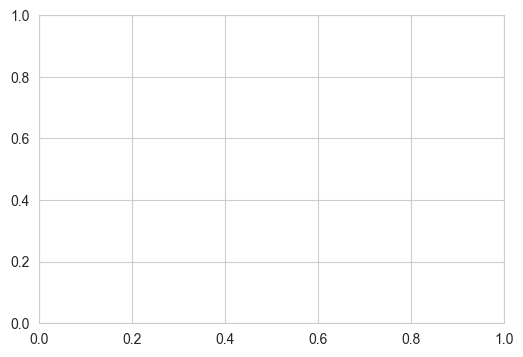

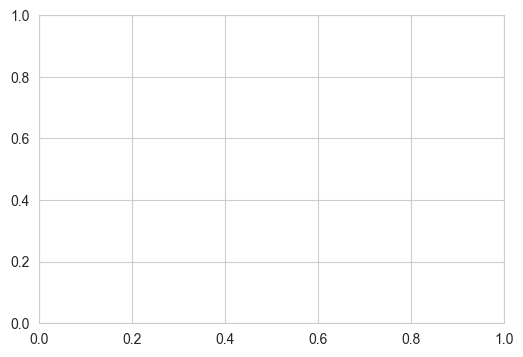

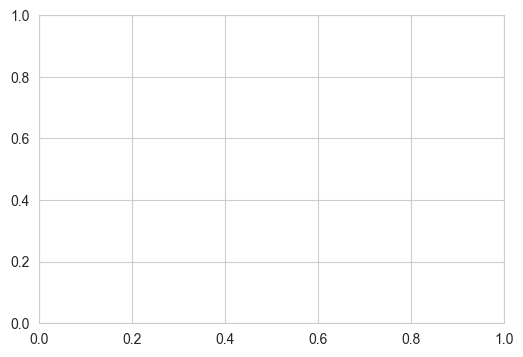

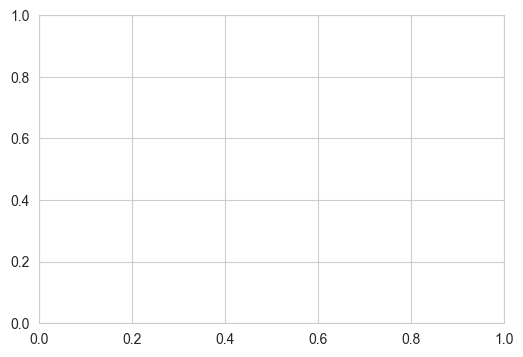

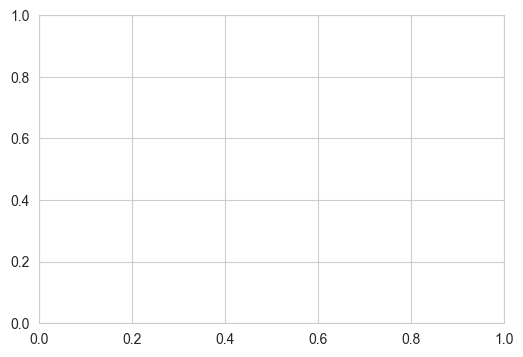

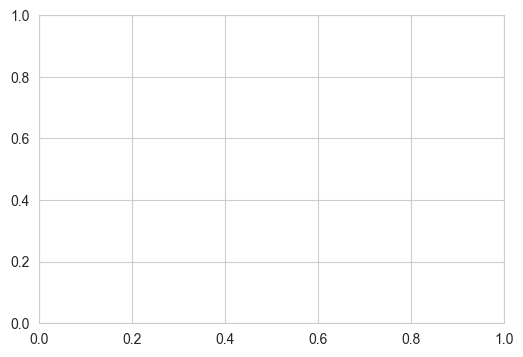

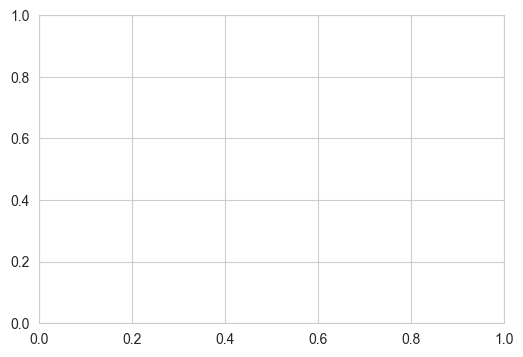

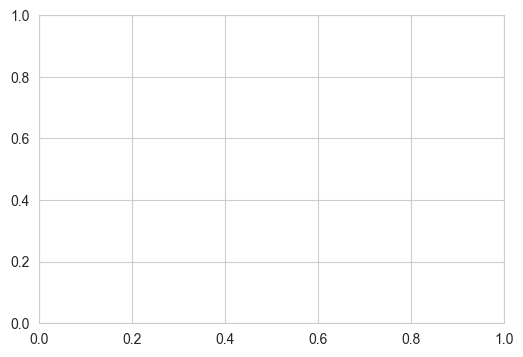

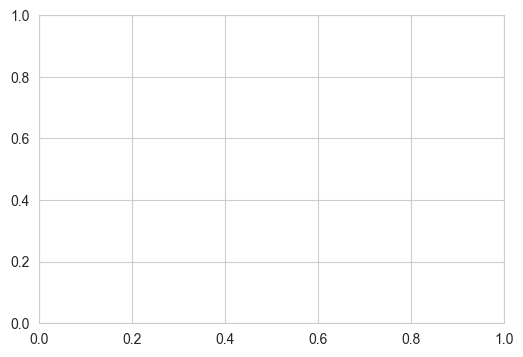

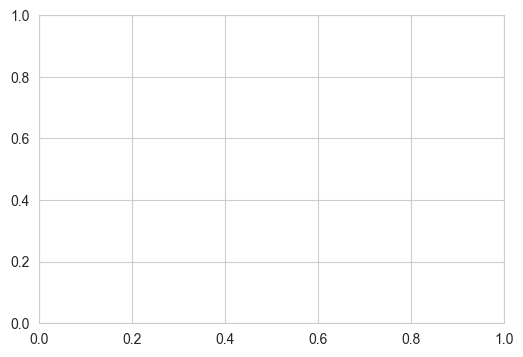

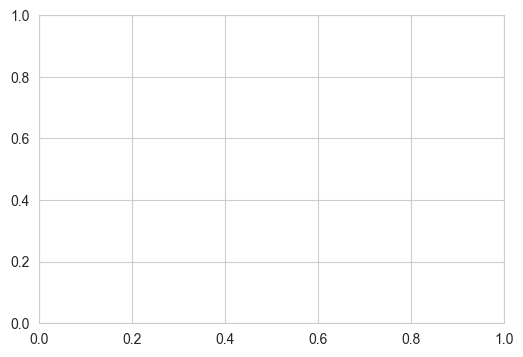

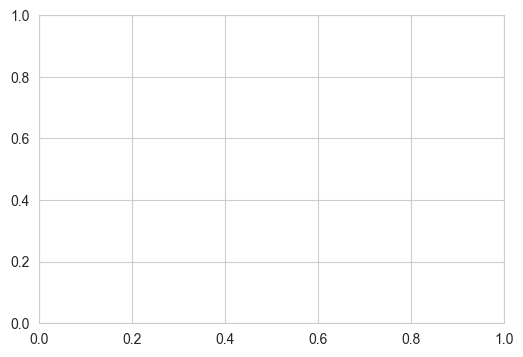

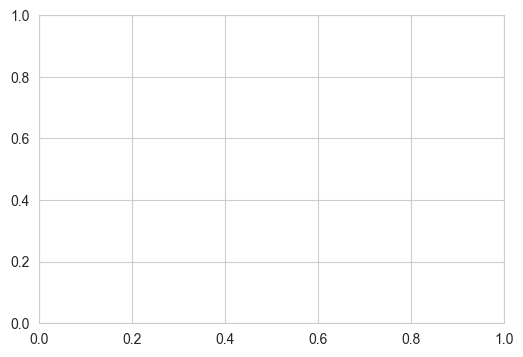

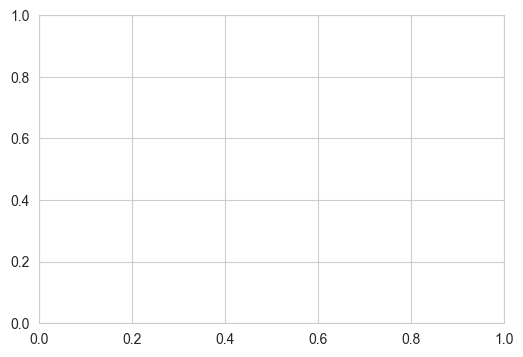

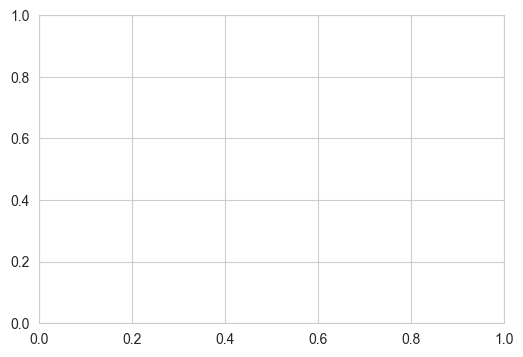

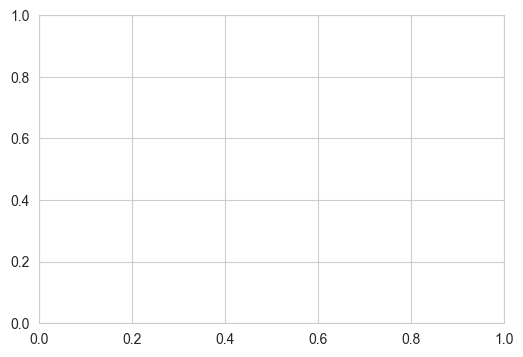

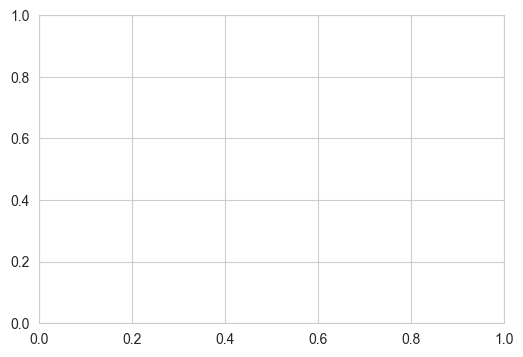

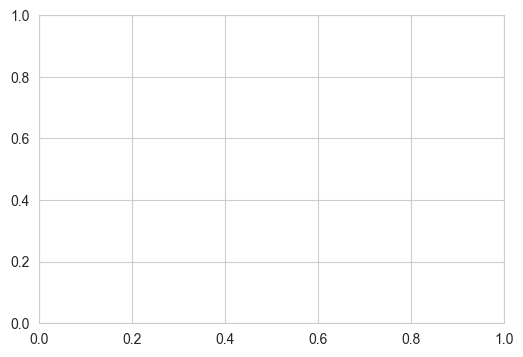

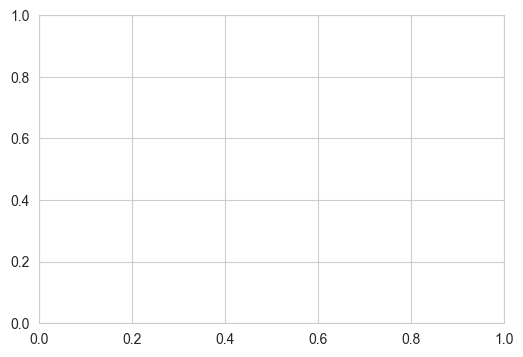

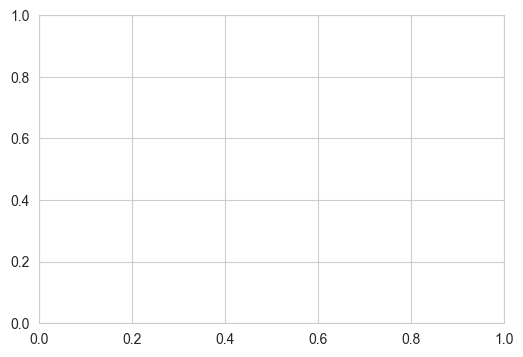

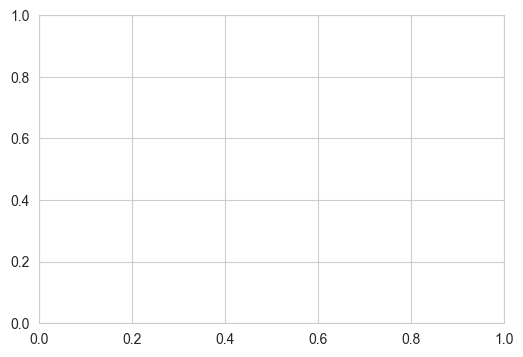

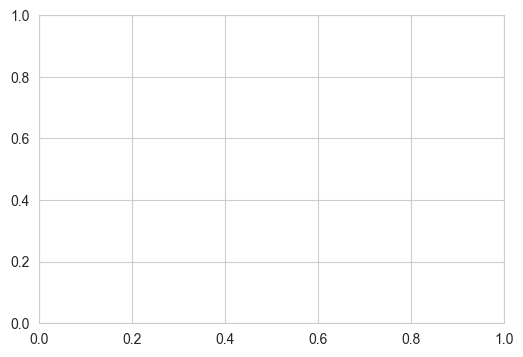

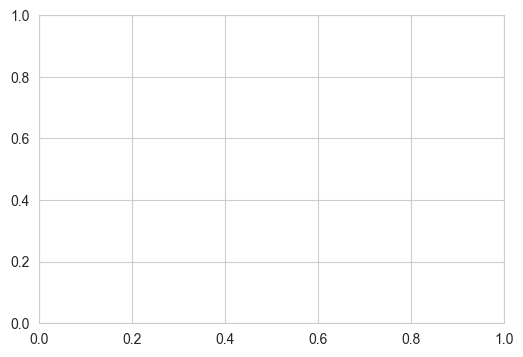

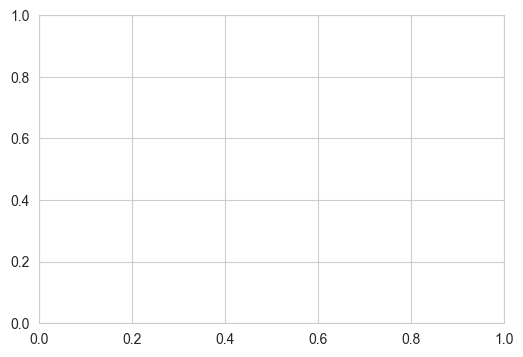

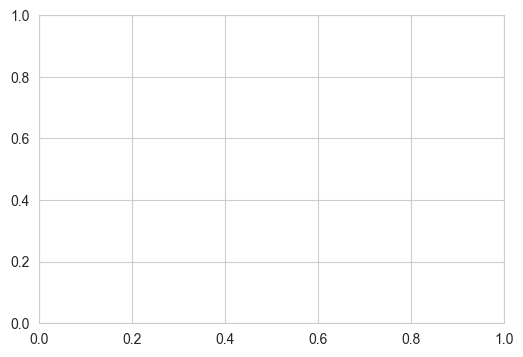

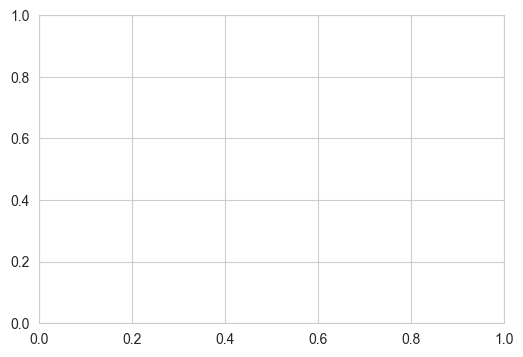

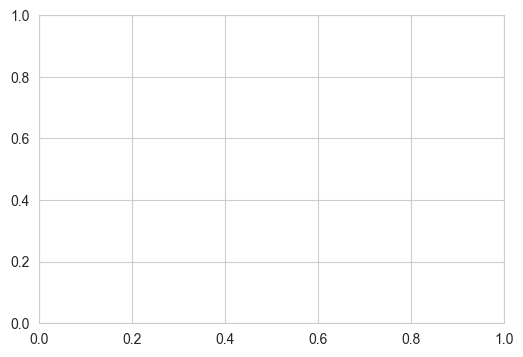

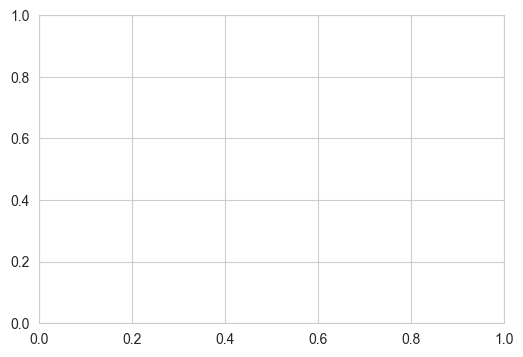

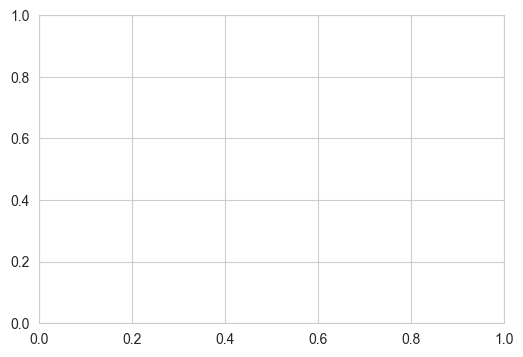

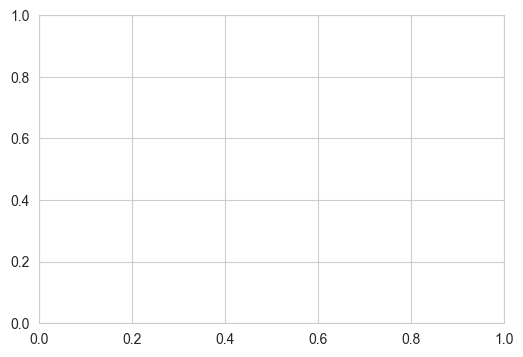

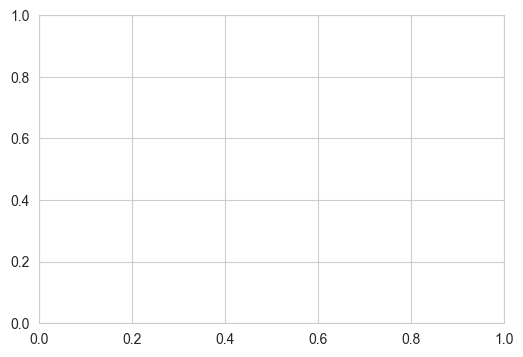

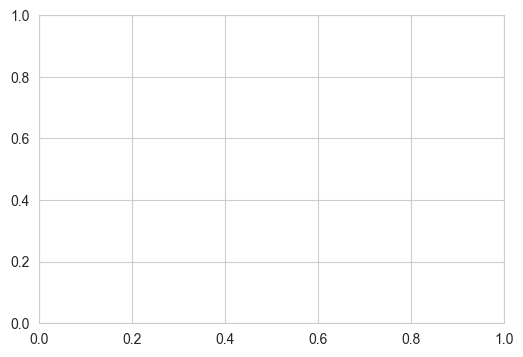

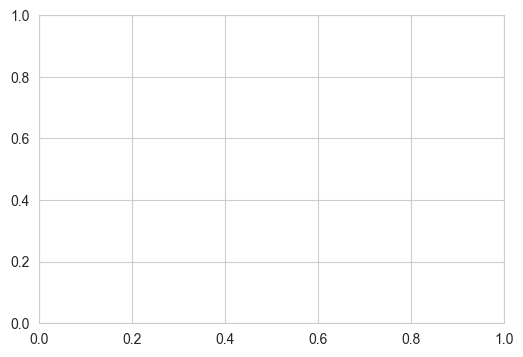

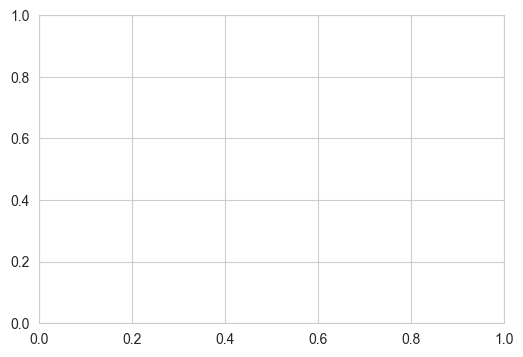

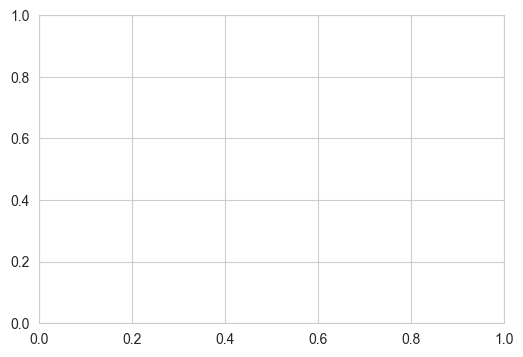

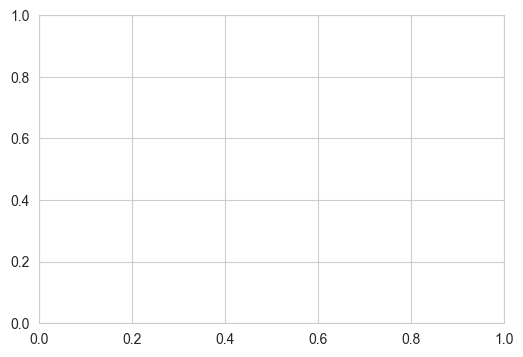

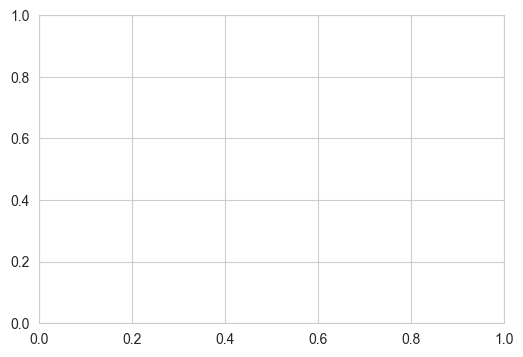

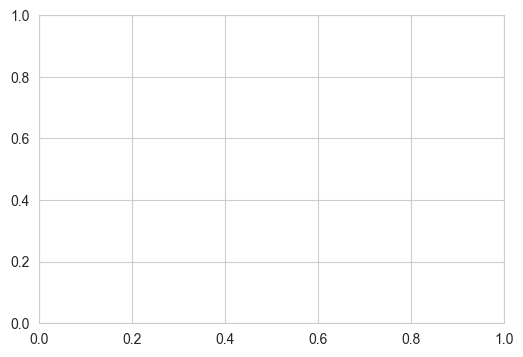

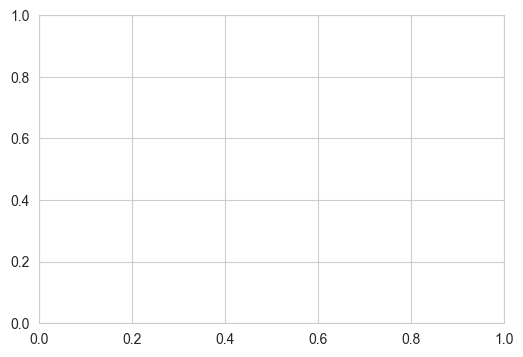

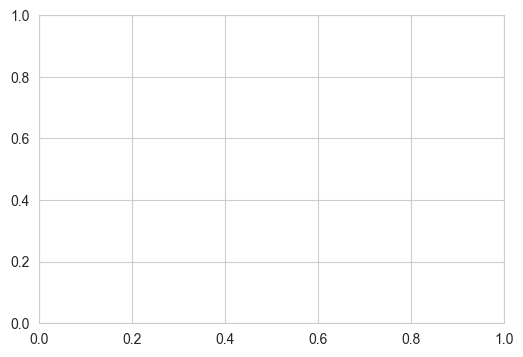

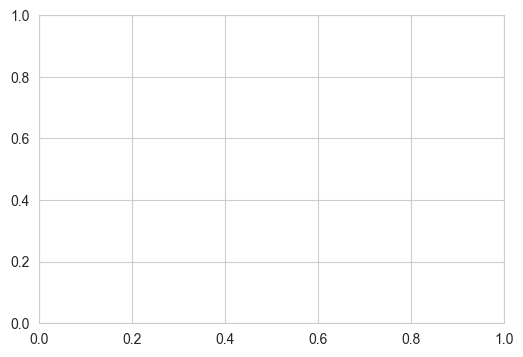

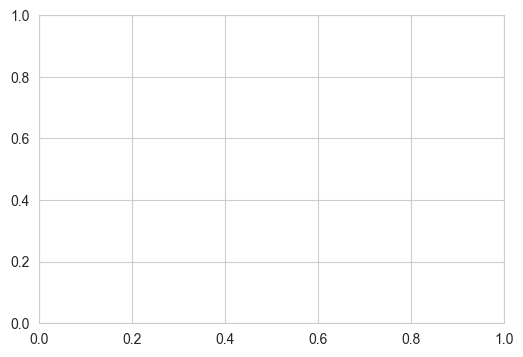

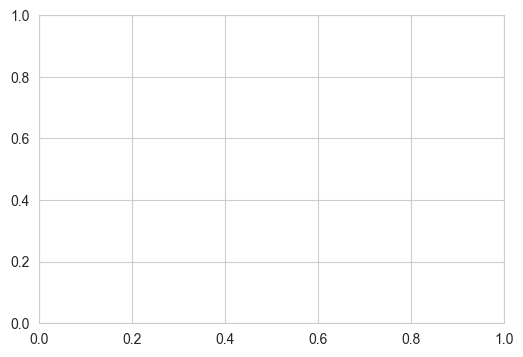

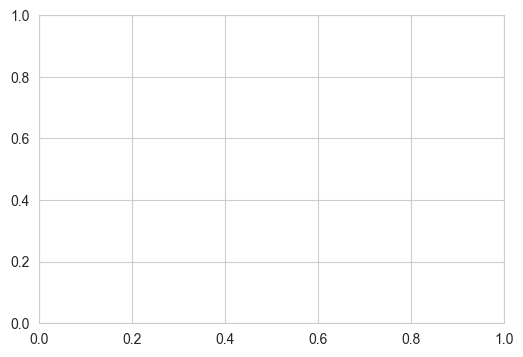

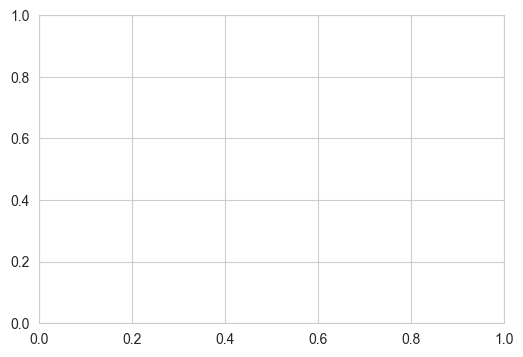

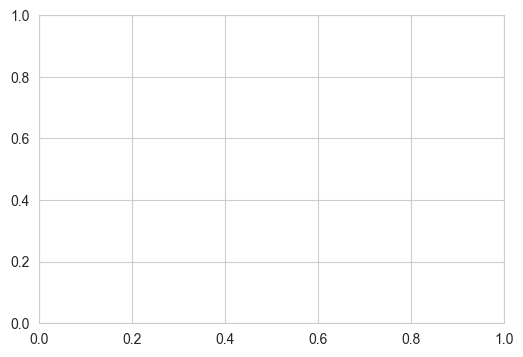

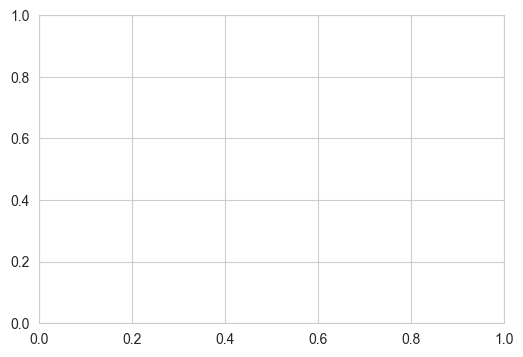

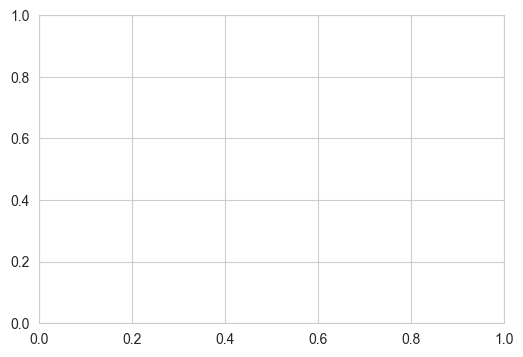

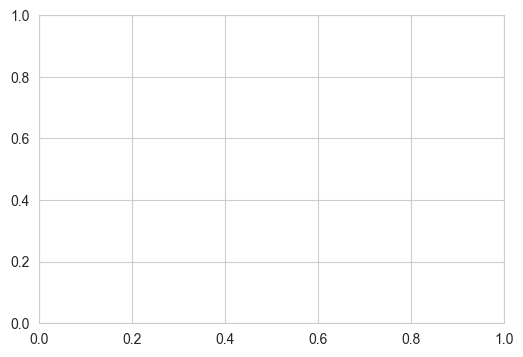

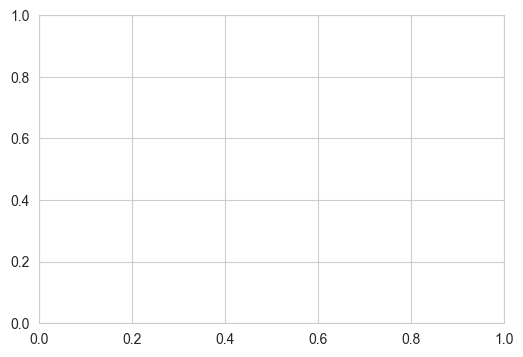

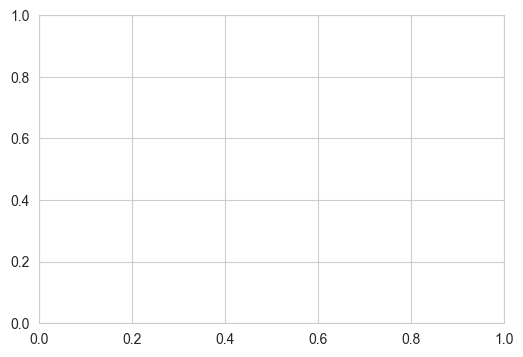

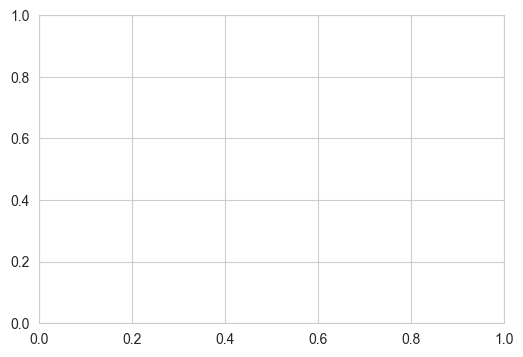

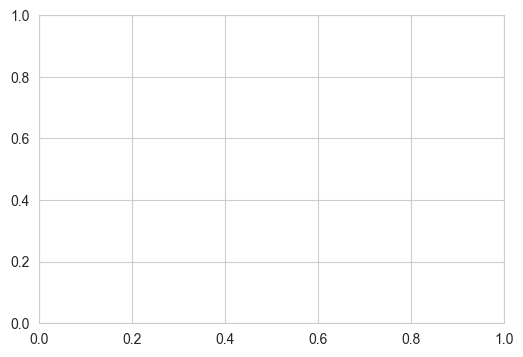

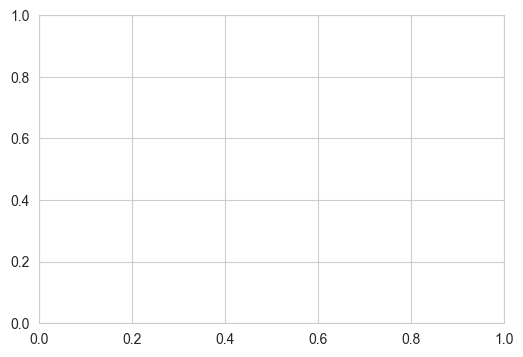

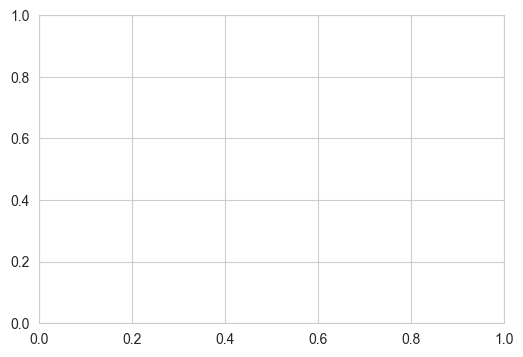

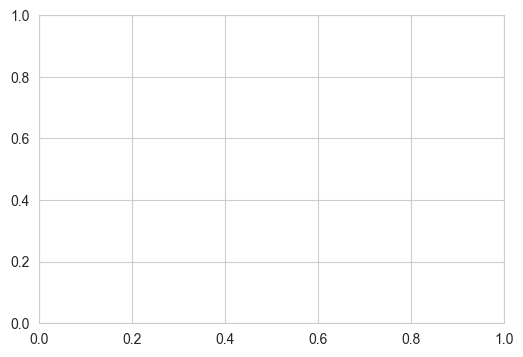

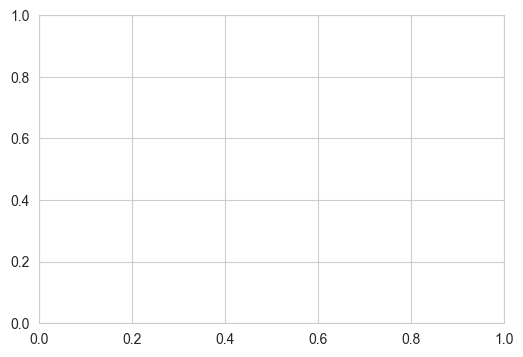

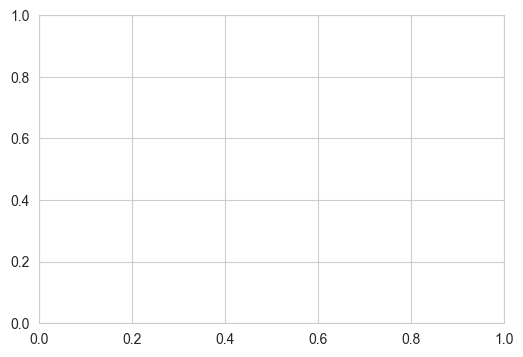

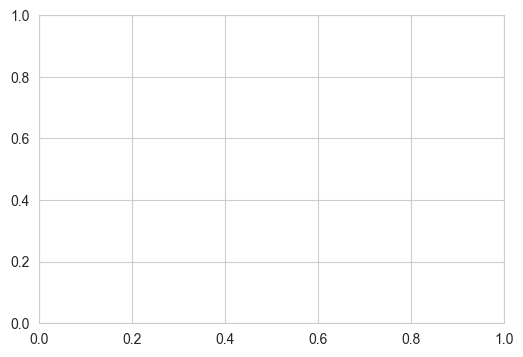

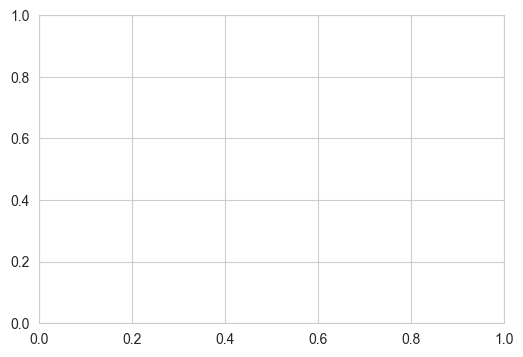

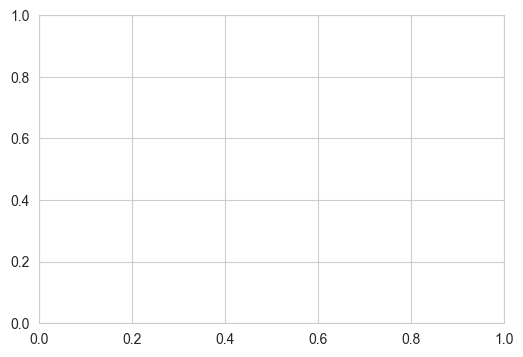

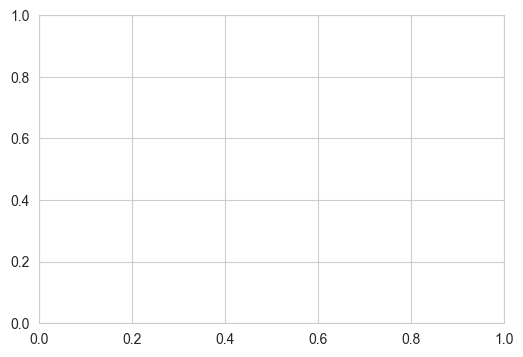

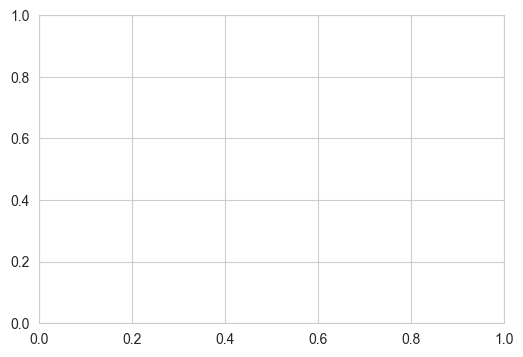

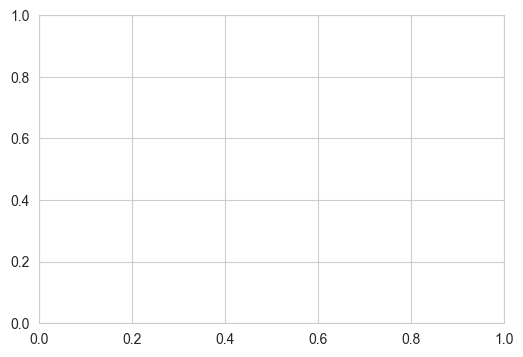

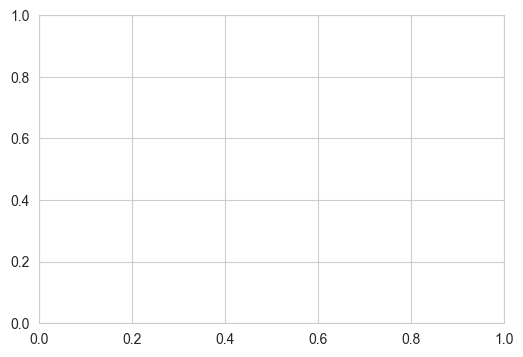

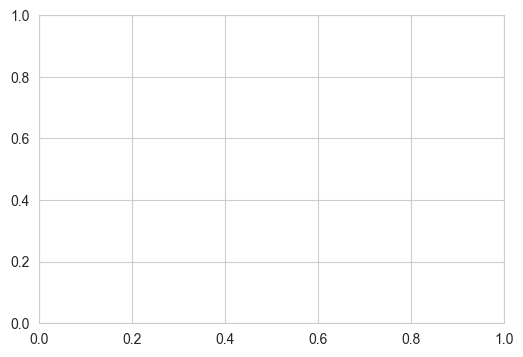

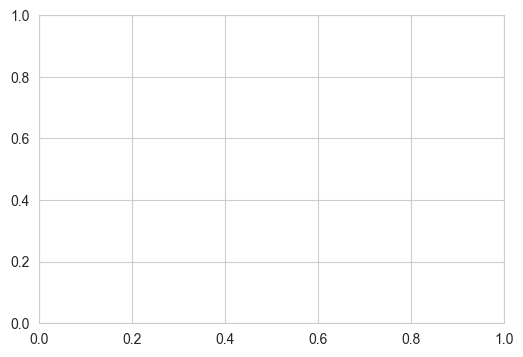

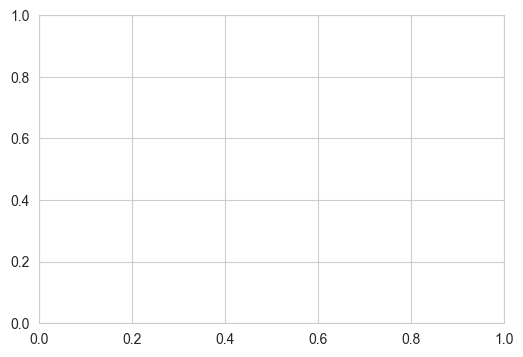

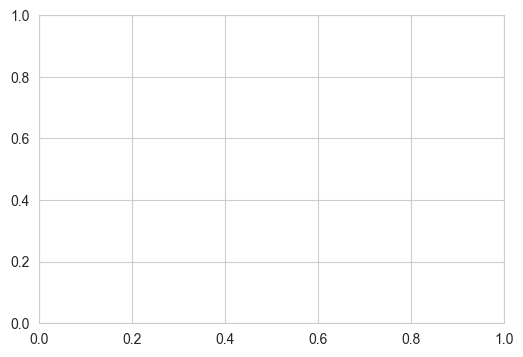

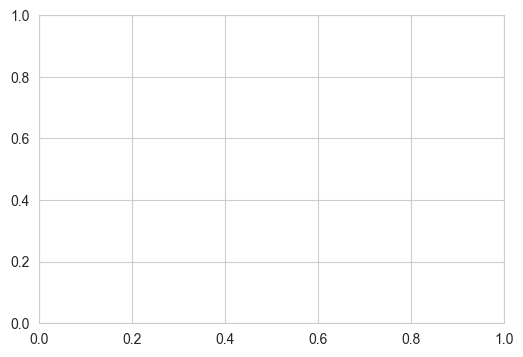

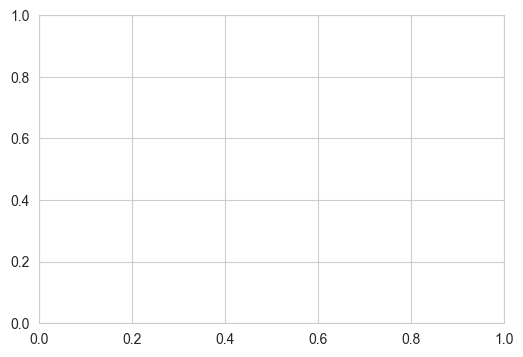

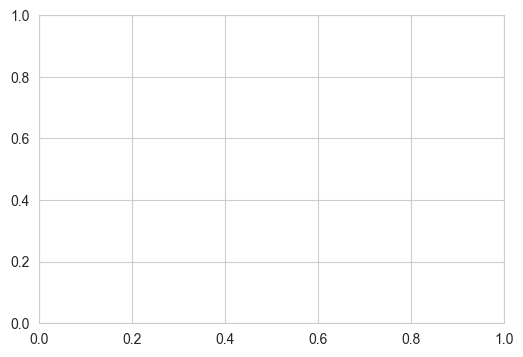

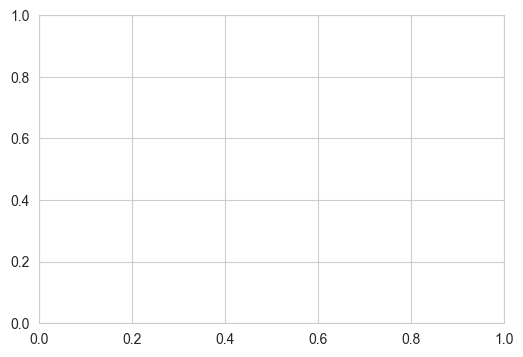

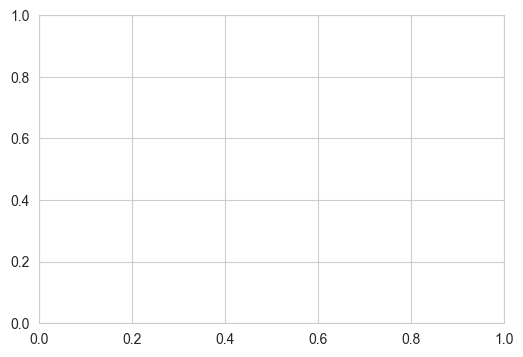

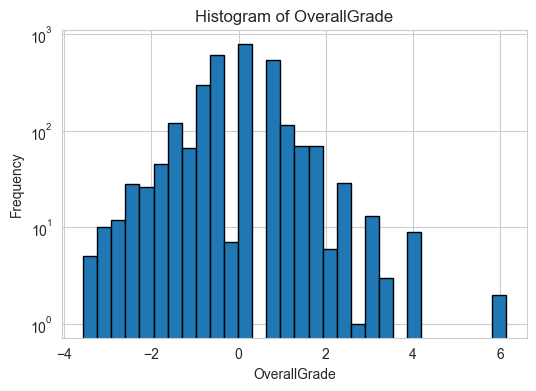

feature: GarageGrade


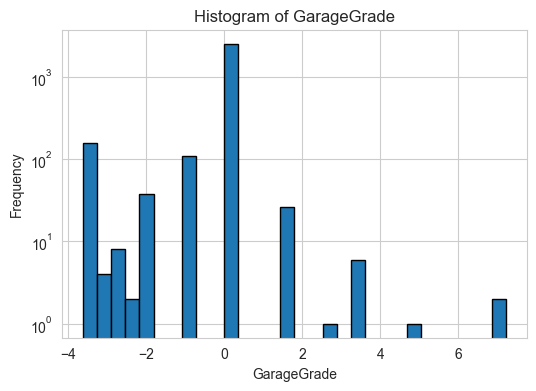

feature: ExterGrade


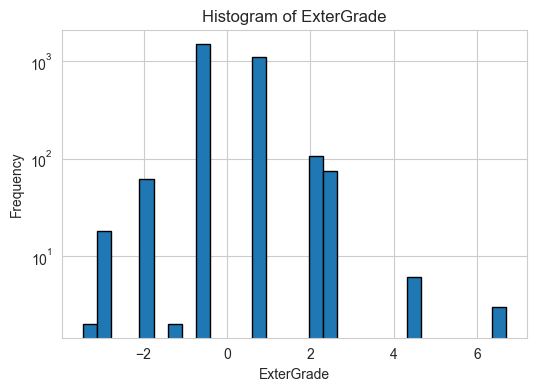

feature: KitchenScore


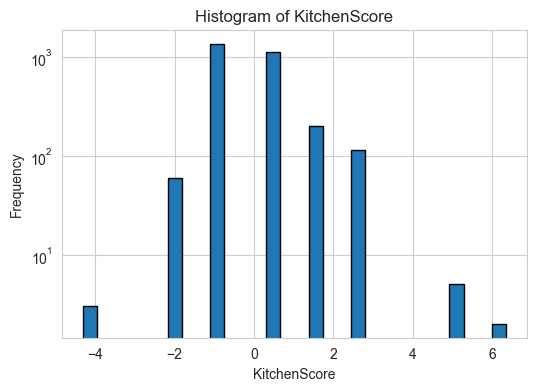

feature: FireplaceScore


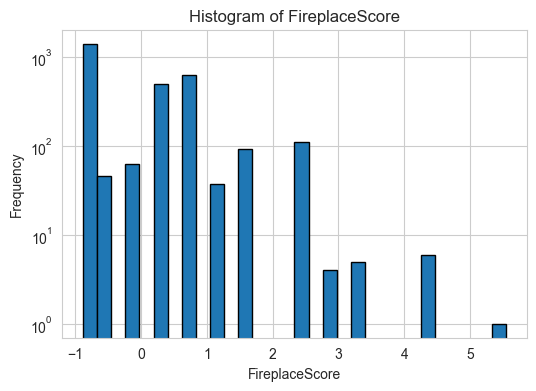

feature: GarageScore


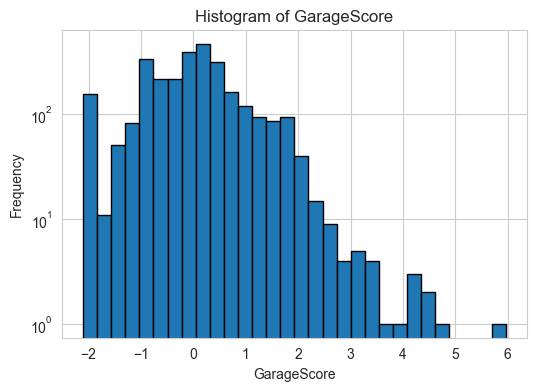

feature: PoolScore


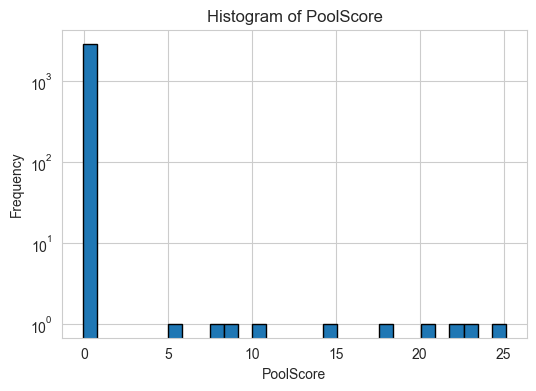

feature: TotalBath


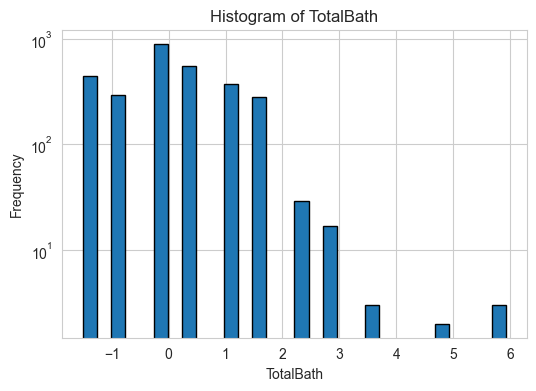

feature: AllSF


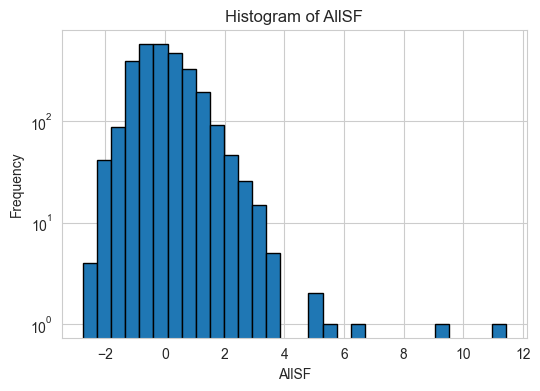

feature: AllFlrsSF


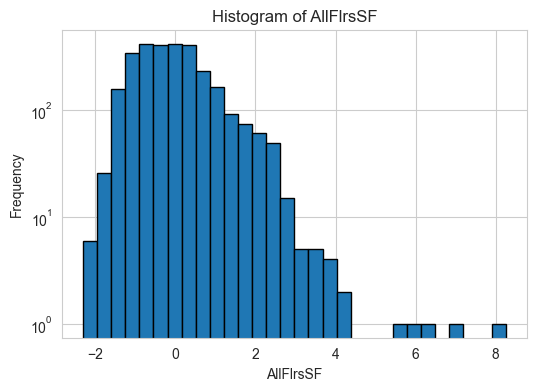

feature: AllPorchSF


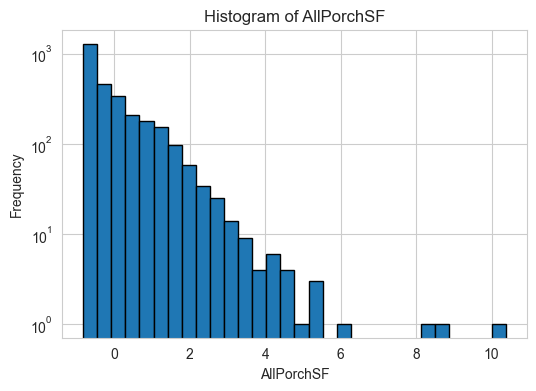

feature: BedCntSize_Local


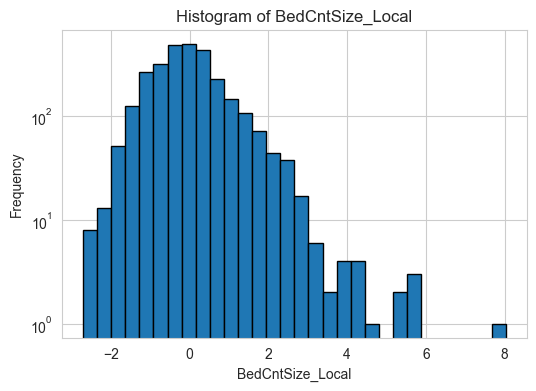

feature: BsmtLivableAdj


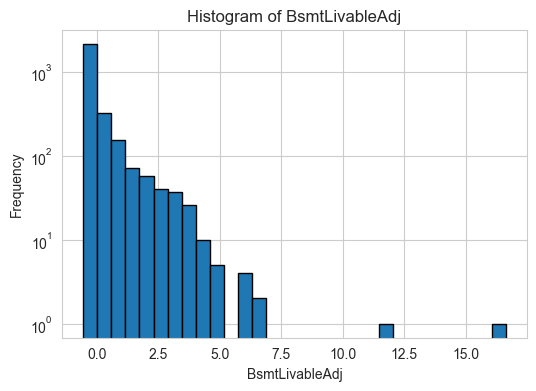

feature: ParkingUtilityAppeal


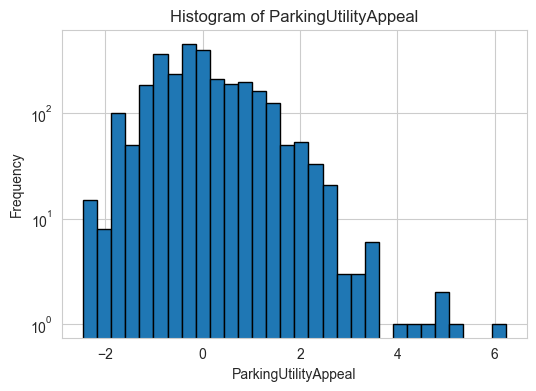

feature: FloorSurfaceQuality


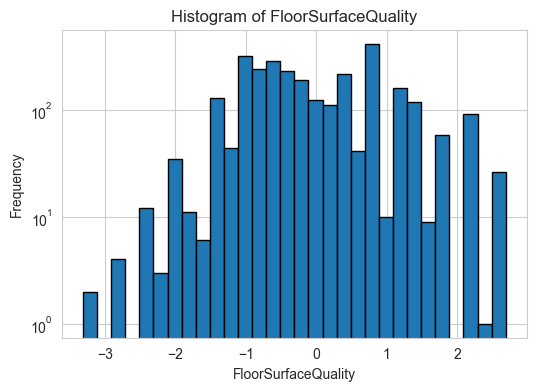

feature: RoofBuyerRisk


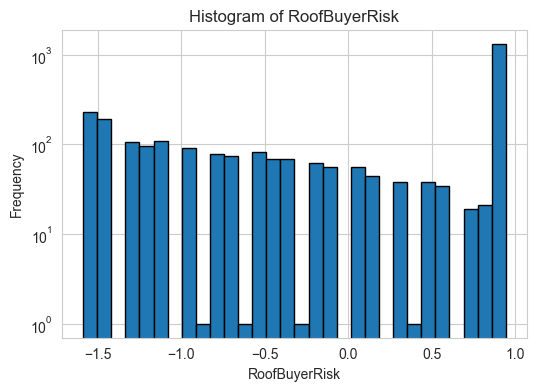

feature: HVAC_AgeEff


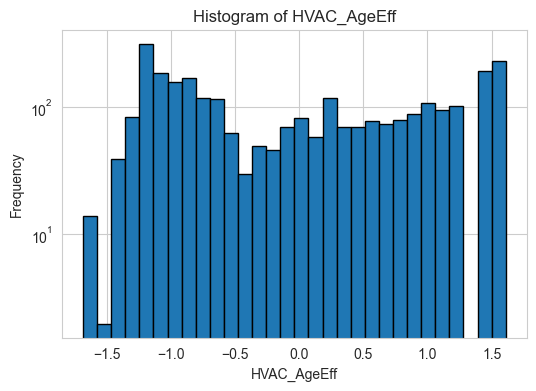

feature: EnvelopeEfficiency


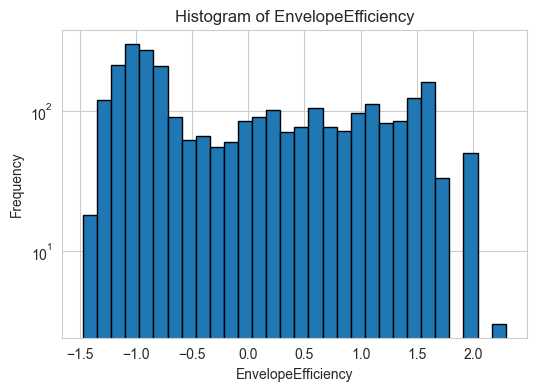

feature: EnergyCertProxy


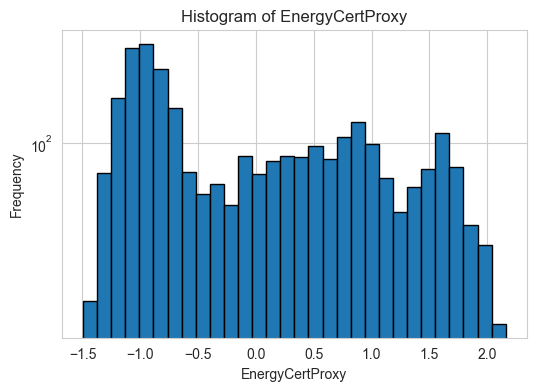

feature: OwnedVsLeasedSystems


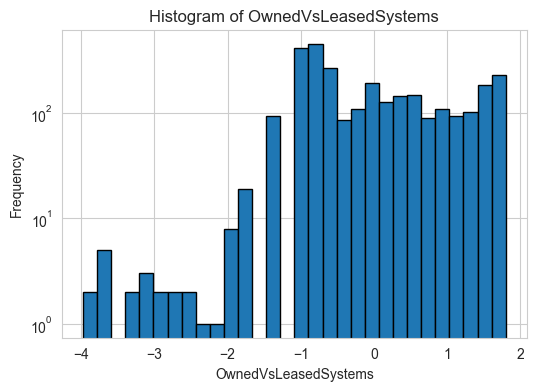

feature: SmartConvenienceEff


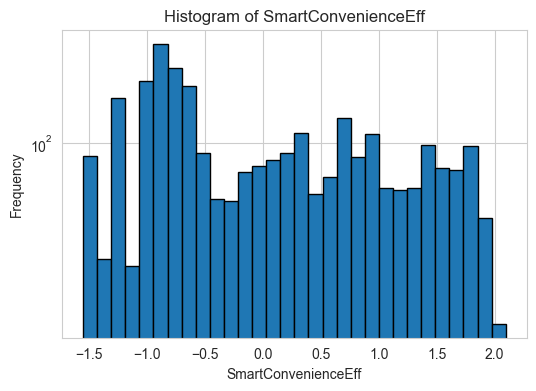

feature: StagingDeclutterScore


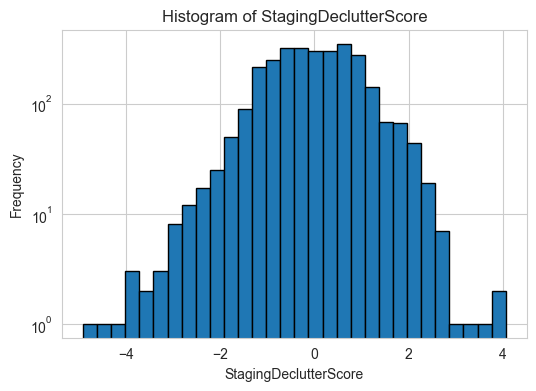

feature: OutdoorUsableAmenityScore


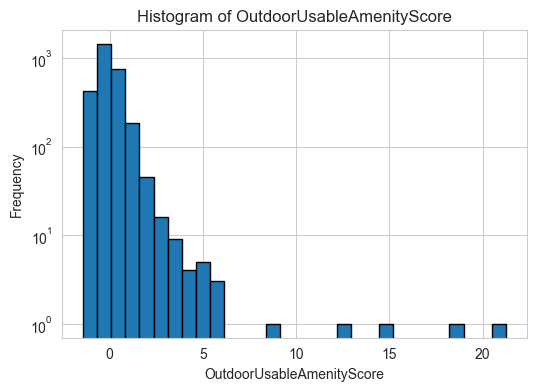

feature: InteriorDaylightScore


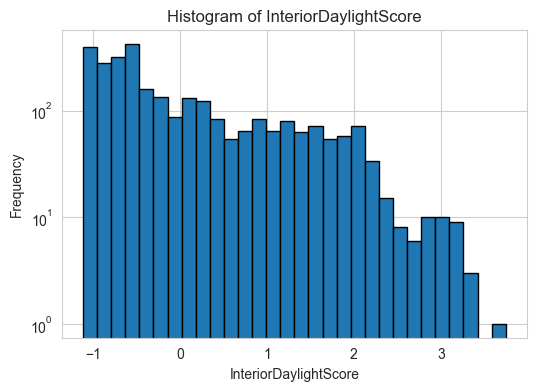

feature: MonthlyCostRestrictions


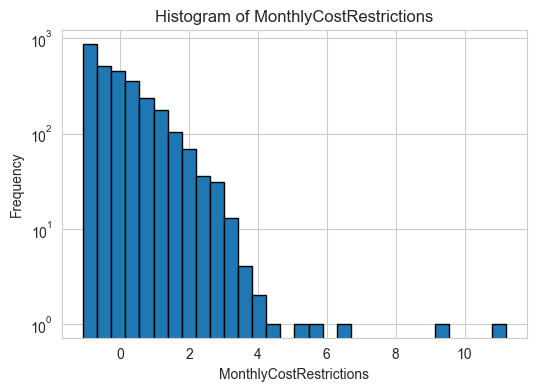

feature: HighRiskMarket


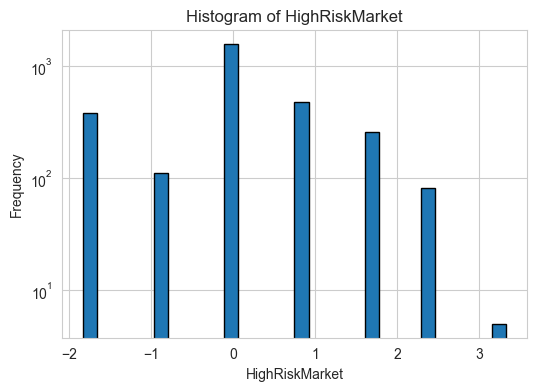

feature: FEMAZoneElevationClaims


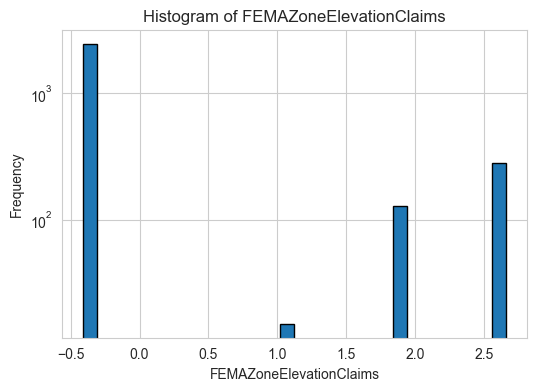

feature: TaxRate_Reassessment_Afford


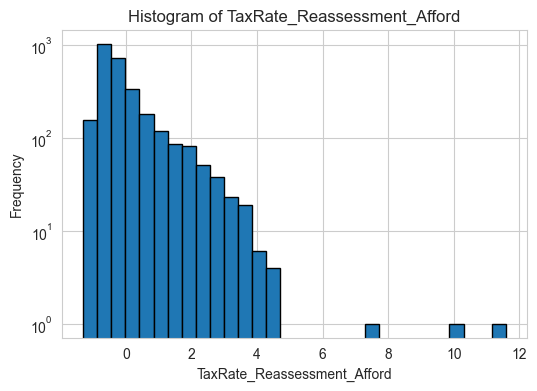

feature: OptionValue_ADU_Attic_Expand


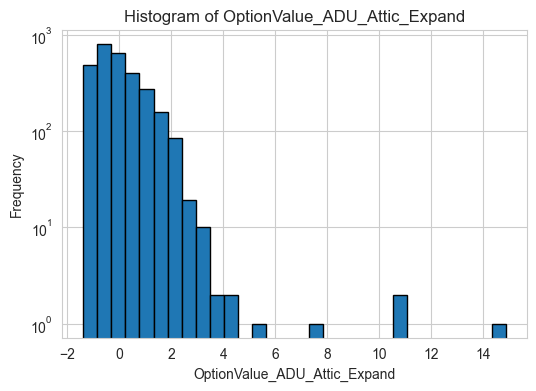

feature: RemoteWorkConnectivity


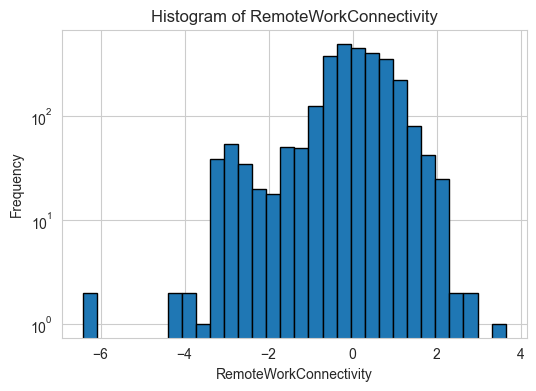

feature: PricingContext_Comps_DOM_Inventory


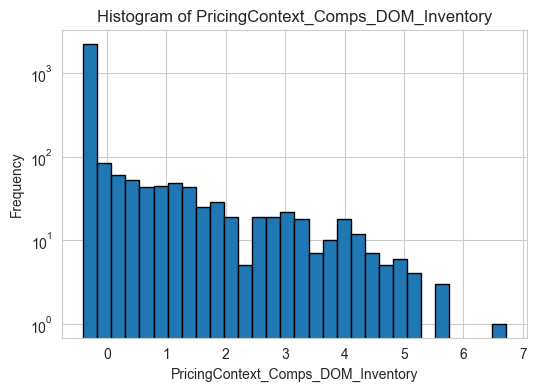

In [54]:
# Plot a histogram for every column in X in log-scale
for i, col in enumerate(combined_data.columns.tolist()):
    try:
        print(f"feature: {col}")
        plt.figure(figsize=(6, 4))
        plt.hist(np.array(combined_data)[:, i], bins=30, edgecolor='black')
        plt.yscale("log")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {col}')
        plt.show()
    except:
        pass


In [55]:
mask = (
    (combined_data['LotFrontage'] > 6) |
    (combined_data['LotArea'] > 10) |
    (combined_data['BsmtFinSF1'] > 5) |
    (combined_data['TotalBsmtSF'] > 6) |
    (combined_data['1stFlrSF'] > 6) |
    (combined_data['WoodDeckSF'] > 8) |
    (combined_data['EnclosedPorch'] > 10) |
    (combined_data['MiscVal'] > 15) |
    (combined_data['BsmtLivableAdj'] > 10)
)
combined_data = combined_data[~mask]
print(f"Number of dropped rows: {mask.sum()}")

Number of dropped rows: 11


### Find the important features

In [56]:
## normalize train_data["SalePrice"]
train_data["SalePrice"] = (train_data["SalePrice"] - train_data["SalePrice"].mean()) / train_data["SalePrice"].std()

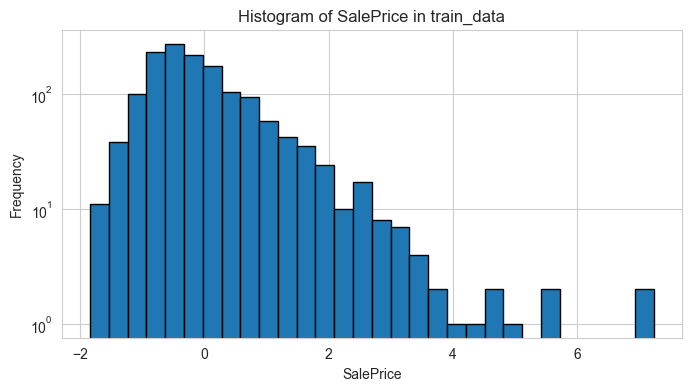

In [57]:
plt.figure(figsize=(8, 4))
plt.hist(train_data["SalePrice"], bins=30, edgecolor='black')
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Histogram of SalePrice in train_data")
plt.yscale("log")
plt.show()

In [58]:
## Add the SalePrice back to train part of combined_data 
kaggle_train_data = train_data[["Id", "SalePrice"]].merge(combined_data, on="Id")
kaggle_test_data = combined_data[~combined_data["Id"].isin(kaggle_train_data["Id"])]
kaggle_train_data.head()

,Id,SalePrice,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,...,StagingDeclutterScore,OutdoorUsableAmenityScore,InteriorDaylightScore,MonthlyCostRestrictions,HighRiskMarket,FEMAZoneElevationClaims,TaxRate_Reassessment_Afford,OptionValue_ADU_Attic_Expand,RemoteWorkConnectivity,PricingContext_Comps_DOM_Inventory
0,1,0.347154,-0.226137,-0.215590,0.699799,0.308887,0.216507,0.651757,-0.513604,1.053491,...,0.324258,-0.560970,1.499865,0.162287,-0.111447,-0.409662,0.343042,-1.089609,0.668165,-0.399706
1,2,0.007286,0.431309,-0.069662,0.699799,0.308887,0.216507,-0.059564,2.185151,0.160708,...,0.524158,0.179425,-0.472222,-0.124548,-0.111447,-0.409662,-0.448012,-0.486107,0.256487,-0.399706
2,3,0.535970,-0.094648,0.139712,-1.054250,0.308887,0.216507,0.651757,-0.513604,0.987359,...,0.585252,-0.278730,1.403587,0.382460,-0.111447,-0.409662,-0.145191,-0.559690,0.640569,-0.399706
3,4,-0.515105,-0.445286,-0.076007,-1.054250,0.308887,0.216507,0.651757,-0.513604,-1.856321,...,0.318987,-0.348779,0.592361,0.168931,0.747435,-0.409662,-0.211125,0.378583,-0.908577,-0.399706
4,5,0.869545,0.606628,0.521662,-1.054250,0.308887,0.216507,1.363079,-0.513604,0.954293,...,1.010427,-0.138351,2.353733,1.363325,-0.111447,-0.409662,0.369580,0.102335,0.294405,-0.399706


In [59]:
## keep id of test for submission
test_Id = kaggle_test_data['Id'].tolist()

## Id has no information. Drop the column
kaggle_train_data.drop('Id', axis=1, inplace=True)
kaggle_test_data.drop('Id', axis=1, inplace=True)

In [60]:
data_matrix = kaggle_train_data.to_numpy(dtype=float) 

Column with max value (25.130586380289326): PoolScore


(array([2.851e+03, 1.200e+01, 7.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.09002839,  1.36555029,  2.82112897,  4.27670766,  5.73228634,
         7.18786502,  8.64344371, 10.09902239, 11.55460108, 13.01017976,
        14.46575844]),
 <BarContainer object of 10 artists>)

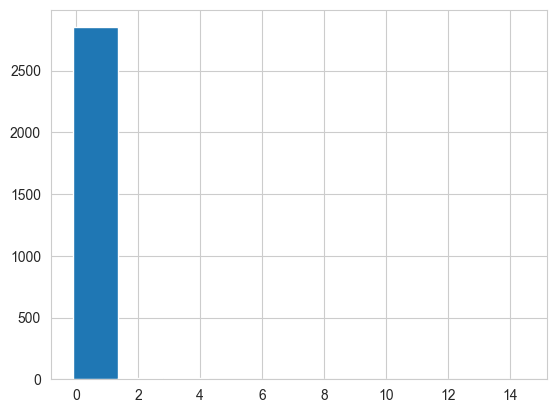

In [61]:
max_col = combined_data.columns[np.argmax(np.max(data_matrix, axis=0))]
print(f"Column with max value ({combined_data[max_col].max()}): {max_col}")
plt.hist(combined_data['MiscVal'])

In [62]:
sigma = np.cov(data_matrix.T)
precision = np.linalg.pinv(sigma)

In [63]:
print("Max absolute value in precision matrix:", abs(precision).max())
print("Max absolute value in covariance matrix (sigma):", abs(sigma).max())
print("Max absolute value in sigma * precision (should be close to 1 for identity):", abs(np.dot(sigma, precision)).max())

Max absolute value in precision matrix: 96908.78848908126
Max absolute value in covariance matrix (sigma): 1.3551628975457022
Max absolute value in sigma * precision (should be close to 1 for identity): 1.0000000000873115


In [64]:
# Find the index of "SalePrice" in kaggle_train_data columns
saleprice_idx = kaggle_train_data.columns.get_loc("SalePrice")

# Extract the corresponding row from the precision matrix
precision_row = precision[saleprice_idx, :]

In [65]:
## selection criterion for the features
precision_min = -1
precision_max = 1

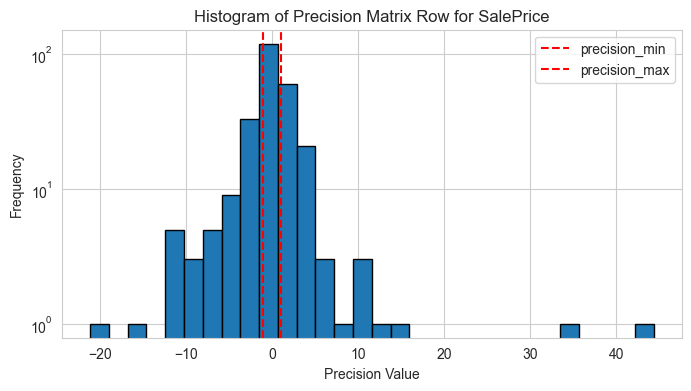

In [66]:
plt.figure(figsize=(8, 4))
plt.hist(precision_row, bins=30, edgecolor='black')
plt.axvline(precision_min, color='red', linestyle='--', label='precision_min')
plt.axvline(precision_max, color='red', linestyle='--', label='precision_max')
plt.yscale("log")
plt.xlabel('Precision Value')
plt.ylabel('Frequency')
plt.title('Histogram of Precision Matrix Row for SalePrice')
plt.legend()
plt.show()

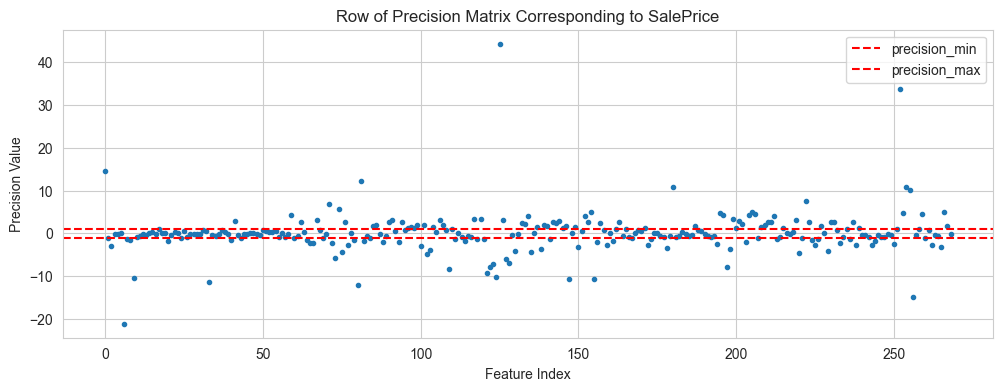

In [67]:
# Plot the row
plt.figure(figsize=(12, 4))
plt.scatter(np.arange(len(precision_row)),precision_row, marker='.')
plt.axhline(precision_min, color='red', linestyle='--', label='precision_min')
plt.axhline(precision_max, color='red', linestyle='--', label='precision_max')
plt.title('Row of Precision Matrix Corresponding to SalePrice')
plt.xlabel('Feature Index')
plt.ylabel('Precision Value')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
selected_features = [
    kaggle_train_data.columns[i]
    for i, val in enumerate(precision_row)
    if val > precision_max or val < precision_min
]
print(selected_features)

['SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'GarageArea', 'GarageCond', 'MSSubClass_SC190', 'MSSubClass_SC20', 'MSSubClass_SC40', 'MSSubClass_SC50', 'MSSubClass_SC60', 'MSSubClass_SC70', 'MSSubClass_SC75', 'MSSubClass_SC85', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborho

In [69]:
## overwrite selected_features?
if False:
    selected_features = kaggle_train_data.columns.tolist()

## drop SalePrice from selected_features
selected_features = [col for col in selected_features if col != 'SalePrice']

X_train_kaggle = np.array(kaggle_train_data[selected_features])
X_test_kaggle  = np.array(kaggle_test_data[selected_features])
y_train_kaggle = np.array(kaggle_train_data['SalePrice'])

In [70]:

print("X_train_kaggle shape:", X_train_kaggle.shape)
print("y_train_kaggle shape:", y_train_kaggle.shape)
print("X_test_kaggle shape:", X_test_kaggle.shape)

X_train_kaggle shape: (1445, 153)
y_train_kaggle shape: (1445,)
X_test_kaggle shape: (1434, 153)


In [71]:
print("Number of null values in y_train:", np.isnan(y_train_kaggle).sum())

Number of null values in y_train: 0


Explained variance ratio (first 10 components): [0.34646296 0.10128195 0.06996363 0.06214025 0.05802912 0.04748102
 0.04035161 0.03368557 0.03180176 0.0215058 ]
Total variance explained: 1.0


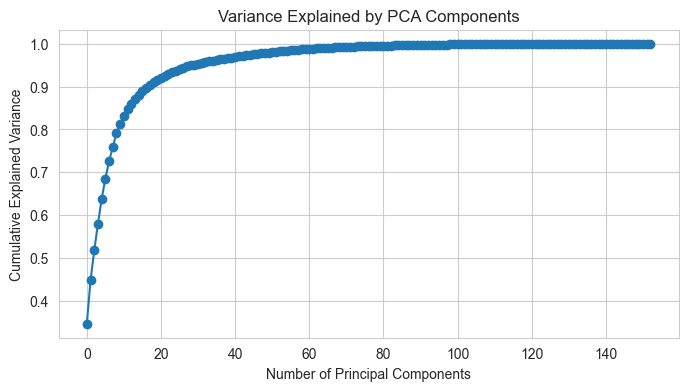

In [72]:
from sklearn.decomposition import PCA

# Fit PCA on y_train_kaggle and transform
pca = PCA()
pca.fit(X_train_kaggle)
print("Explained variance ratio (first 10 components):", pca.explained_variance_ratio_[:10])
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.show()

In [73]:
# Transform X_train_kaggle using PCA and keep only the first 10 components
# Find the minimum number of components needed to explain at least 95% of the variance
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.searchsorted(cum_var, 0.999999999) + 1

X_train_kaggle_pca = pca.transform(X_train_kaggle)[:, :n_components]
X_test_kaggle_pca  = pca.transform(X_test_kaggle)[:, :n_components]
print("Shape of X_train_kaggle_pca10:", X_train_kaggle_pca.shape)
print("Shape of X_test_kaggle_pca10:", X_test_kaggle_pca.shape)

Shape of X_train_kaggle_pca10: (1445, 145)
Shape of X_test_kaggle_pca10: (1434, 145)


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train_kaggle_pca, y_train_kaggle, test_size=0.2, random_state=42
)

Linear Regression Test RMSE: 0.29947728870550644


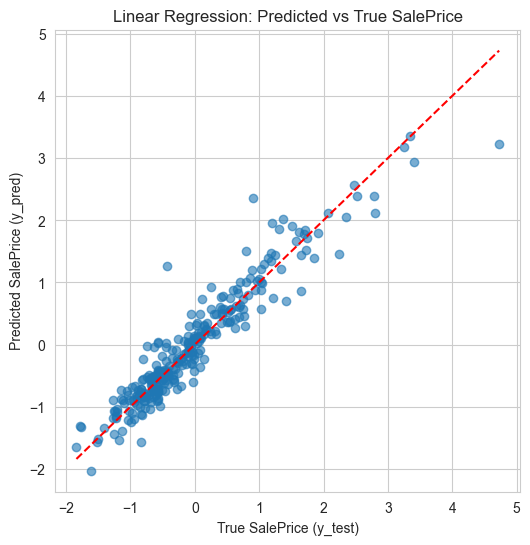

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on test set
y_pred_linreg = linreg.predict(X_test)

# Evaluate performance
rmse_linreg = mean_squared_error(y_test, y_pred_linreg, squared=False)
print("Linear Regression Test RMSE:", rmse_linreg)

# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_linreg, alpha=0.6)
plt.xlabel('True SalePrice (y_test)')
plt.ylabel('Predicted SalePrice (y_pred)')
plt.title('Linear Regression: Predicted vs True SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define parameter grid for ElasticNet
param_grid = {
    'alpha': np.arange(0.01, 2.0, 0.1)
}

# Initialize ElasticNet model
ridge = Ridge()

# Set up GridSearchCV
grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=3,
    n_jobs=-1
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best ElasticNet params:", grid_search.best_params_)
print("Test RMSE:", rmse)

Best ElasticNet params: {'alpha': 1.9100000000000001}
Test RMSE: 0.2962212994570757


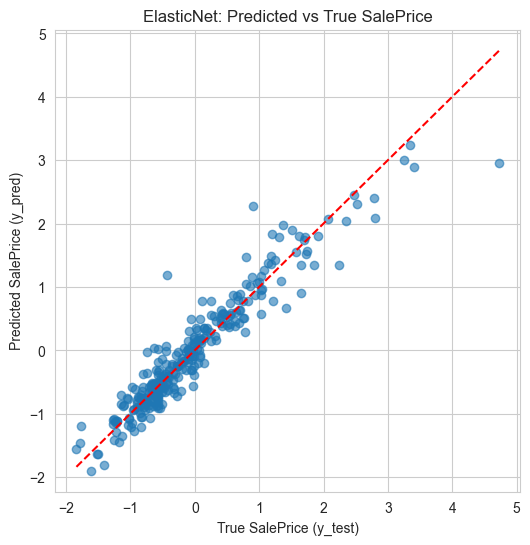

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('True SalePrice (y_test)')
plt.ylabel('Predicted SalePrice (y_pred)')
plt.title('ElasticNet: Predicted vs True SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [78]:
submission_pred = best_model.predict(X_test_kaggle_pca)

In [79]:
submission = pd.DataFrame({'Id': test_Id, 'SalePrice': submission_pred})
submission.to_csv(os.path.join('data', 'submission_Ardavan.csv'), index=False)

In [80]:
#!kaggle competitions submit -c house-prices-advanced-regression-techniques -f data/submission_Ardavan.csv -m "Elastic net + pca"